# Supply Chain Optimization Project

## 1. Introduction
This report details the analytical process undertaken to predict 'Daily Demand' within a supply chain dataset for a student project. The primary goal is to transform the continuous 'Daily Demand' variable into discrete, actionable classes (Low, Medium, High) and develop classification models (Logistic Regression, Linear SVM, RBF SVM) to predict these demand categories. The analysis covers data preprocessing, exploratory data analysis, model training, evaluation, and a comparison of model performance, stability, and complexity.

## 2. Dataset Overview

The initial dataset, loaded from Google Drive, contains 100,000 records across 32 features. A sampled dataset of 5,001 records was extracted for individual analysis.

### Dataset Shape:
*   Original dataset shape: (100000, 32)
*   Sampled dataset shape: (5001, 32)

### Column Names:
`['Product Name', 'Category', 'Daily Production/Quantity', 'Transportation Method', 'Vehicle Type', 'Vehicle Capacity (kg/ton)', 'No. of Vehicles Used Per Day', 'Trip Frequency', 'Average Distance Travelled (km)', 'Temperature Maintained (°C)', 'Humidity Maintained (%)', 'Packaging Method', 'Time of Harvest', 'Time to Loading', 'Transport Duration (hours)', 'Unloading Time', 'Total Supply Chain Time', 'Source Location', 'Destination Location', 'Who Receives the Goods?', 'Daily Demand', 'End User Type', 'Is Real-time Tracking Used?', 'Tracking Method', 'Data Collected', 'Initial Quality Grade', 'Shelf Life (Days)', 'Spoilage Percentage (%)', 'Reasons for Spoilage', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost']`

### First 5 Rows of Sampled Dataset (`sp_102_df_5001`):
```
         Product Name       Category  Daily Production/Quantity  \
22502    Dry Chillies          Spice                       7023   
99252  Turmeric (Dry)          Spice                      14324   
76054     Water Melon          Fruit                      21417   
65803         Tapioca      Root Crop                       1201   
95676          Garlic          Spice                      21636   
...               ...            ...                        ...   

      Transportation Method Vehicle Type  Vehicle Capacity (kg/ton)  \
22502               By Road     Truck-XL                         10   
99252               By Road        Truck                          5   
76054               By Road     Truck-XL                          8   
65803               By Road        Truck                          2   
95676               By Road     Truck-XL                          8   
...                     ...          ...                        ...   

       No. of Vehicles Used Per Day  Trip Frequency  \
22502                             1               2   
99252                             1               2   
76054                             2               3   
65803                             2               1   
95676                             1               3   
...                             ...             ...   

       Average Distance Travelled (km)  Temperature Maintained (°C)  ...  \
22502                              293                          8.0  ...   
99252                              203                         10.0  ...   
76054                              395                         10.0  ...   
65803                              464                         16.0  ...   
95676                              397                          4.0  ...   
...                                ...                          ...  ...   

       Initial Quality Grade  Shelf Life (Days)  Spoilage Percentage (%)  \
22502                     B+                  8                      6.8   
99252                     B+                 10                      6.4   
76054                      A                  6                      6.2   
65803                      A                  5                      7.1   
95676                     B+                 12                      6.0   
...                      ...                ...                      ...   

      Reasons for Spoilage  Transportation Cost per Trip  Storage Cost  \
22502      Inadequate storage                      829.74        163.66   
99252           Contamination                      617.50        184.60   
76054           Contamination                     1145.71        202.92   
65803      Delay in transit                     1041.52        206.58   
95676      Delay in transit                      919.26        188.76   
...                         ...                         ...           ...   

       Wastage Cost  
22502        171.20  
99252        155.00  
76054        201.76  
65803        145.88  
95676        191.60  
...             ...  

[5001 rows x 32 columns]
```

## 3. Data Preprocessing

### 3.1. Missing Value Treatment

**Before Treatment:**
```
                               Missing Count  Missing %
Tracking Method                         2479    49.5609
```

**After Treatment (Imputation with Mode for 'Tracking Method'):**
All missing values were successfully treated. 'Tracking Method' was imputed with its mode: 'RFID + GPS'.

### 3.2. Outlier Removal
Extreme outliers were identified and removed using the 3-IQR method on numeric columns. This conservative approach aims to mitigate the impact of extreme values without discarding too much data.

*   Initial number of rows: 5001
*   Number of rows removed: 1084
*   Percentage of rows removed: 21.68%
*   Final number of rows after outlier removal: 3917

### 3.3. Categorical Variable Encoding
*   **Ordinal Encoding**: 'Initial Quality Grade' was encoded numerically based on its inherent order: `{'C': 0, 'B': 1, 'B+': 2, 'A-': 3, 'A': 4, 'AA': 5}`.
*   **One-Hot Encoding**: 14 nominal categorical columns (e.g., 'Product Name', 'Category', 'Packaging Method') were one-hot encoded with `drop_first=True` to avoid multicollinearity. This significantly increased the number of features.

### 3.4. Feature Scaling
Selected skewed numeric variables ('Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost', 'Daily Production/Quantity', 'Daily Demand') were transformed using `log1p` to reduce skewness. Subsequently, all numeric features were scaled using `StandardScaler` to standardize their range and mean, which is crucial for distance-based algorithms like SVM and for improving the convergence of Logistic Regression.

## 4. Exploratory Data Analysis (EDA)

### 4.1. Descriptive Statistics for Non-Categorical Variables (After Outlier Removal):
```
                                    min      max          mean   median  \
Daily Production/Quantity         803.0  24995.0  13114.93      13266.0   
Vehicle Capacity (kg/ton)           1.0     28.0      7.97          6.0   
Average Distance Travelled (km)    40.0    700.0    362.88        359.0   
Temperature Maintained (°C)         2.0     30.0     12.39         10.0   
Humidity Maintained (%)            40.0     96.0     82.32         83.0   
Transport Duration (hours)          1.0     24.0     12.45         12.0   
Unloading Time                      1.0     10.0      5.47          5.0   
Total Supply Chain Time             3.0     34.0     17.92         18.0   
Daily Demand                        8.0    996.0    488.75        486.0   
Shelf Life (Days)                   1.0     19.0     10.03         10.0   
Spoilage Percentage (%)             0.1      9.9      5.01          5.0   
Transportation Cost per Trip      400.0   1500.0    951.35        954.2   
Storage Cost                       50.0    250.0    150.18        150.0   
Wastage Cost                       50.0    250.0    150.31        150.0   

                                     std  skewness  kurtosis    CV  
Daily Production/Quantity        7003.66     -0.05     -1.21  0.53  
Vehicle Capacity (kg/ton)          6.89      1.44      1.42  0.86  
Average Distance Travelled (km)  190.83      0.04     -1.20  0.53  
Temperature Maintained (°C)        7.86      0.38     -1.23  0.63  
Humidity Maintained (%)            8.83     -0.80      1.74  0.11  
Transport Duration (hours)         6.91      0.02     -1.23  0.55  
Unloading Time                     2.89     -0.01     -1.21  0.53  
Total Supply Chain Time            8.43     -0.00     -1.03  0.47  
Daily Demand                     286.81      0.00     -1.20  0.59  
Shelf Life (Days)                  5.48      0.00     -1.20  0.55  
Spoilage Percentage (%)            2.88      0.00     -1.20  0.57  
Transportation Cost per Trip     345.92      0.01     -1.19  0.36  
Storage Cost                      57.75      0.00     -1.19  0.38  
Wastage Cost                      57.70      0.00     -1.19  0.38  
```

### 4.2. Descriptive Statistics for Categorical Variables (Examples):

**Category:**
```
      Category  Frequency  Proportion
0    Vegetable       1855       0.371
1  Leafy Green        810       0.162
2        Fruit        788       0.158
3        Spice        762       0.152
4    Root Crop        751       0.150
5         Meat         32       0.006
6         Fish          3       0.001
```

**Initial Quality Grade:**
```
  Category  Frequency  Proportion  Rank
0        C        164       0.033     1
1        B        999       0.200     2
2       B+        973       0.195     3
3       A-        987       0.197     4
4        A       1014       0.203     5
5       AA        864       0.173     6
```

### 4.3. Visualizations:

*   **Boxplots**: Boxplots were generated for all numeric variables, both before and after outlier removal. The 'After Removal' plots showed mitigated extreme outliers, confirming the effectiveness of the IQR method.
*   **Scatter Plots**: Scatter plots between selected scaled numeric variables (`Daily Production/Quantity` vs `Daily Demand`, `Transportation Cost per Trip` vs `Average Distance Travelled (km)`, etc.) illustrated potential relationships and clusters. For instance, a positive correlation was observed between `Daily Production/Quantity` and `Daily Demand`.
*   **Correlation Heatmap**: A heatmap displayed pairwise correlations between all scaled numeric variables. Strong correlations (e.g., between various cost components or demand/production) were noted, indicating potential redundancies or strong interdependencies.
*   **Count Plots**: Count plots for categorical variables (e.g., `Category`, `Packaging Method`) showed the distribution of different categories, identifying dominant categories like 'Vegetable' in the 'Category' variable or 'RFID + GPS' for 'Tracking Method'.

## 5. Target Variable Definition: 'Daily_Demand_Class'

### 5.1. Rationale and Transformation:
'Daily Demand' is a critical continuous metric. For classification, it was transformed into discrete classes ('Low', 'Medium', 'High') to provide actionable insights for inventory, production, and resource management. This transformation involved:

*   Calculating the 33rd and 67th percentiles of the scaled 'Daily Demand':
    *   33rd percentile: -0.19
    *   67th percentile: 0.65
*   Assigning classes:
    *   `Daily Demand <= -0.19`: 'Low'
    *   `-0.19 < Daily Demand <= 0.65`: 'Medium'
    *   `Daily Demand > 0.65`: 'High'

### 5.2. Distribution of 'Daily_Demand_Class':
```
Daily_Demand_Class
Medium    1332
Low       1293
High      1292
Name: count, dtype: int64
```

### 5.3. Business Justification:
Classifying 'Daily Demand' is crucial for:
*   **Inventory Management**: Optimizing stock levels, reducing holding costs, and preventing stockouts.
*   **Production Scheduling**: Informing production plans and ensuring efficient resource utilization.
*   **Resource Allocation**: Better management of labor, logistics, and storage.
*   **Overall Supply Chain Efficiency**: Reducing waste, improving responsiveness, and achieving substantial cost savings.

## 6. Data Splitting

### 6.1. Split Details:
*   Data was split into 80% training (`X_train`, `y_train`) and 20% testing (`X_test`, `y_test`).
*   `RANDOM_STATE = 102` was used for reproducibility.

### 6.2. Stratified Sampling:
Stratified sampling was used (`stratify=y`) to ensure that the proportions of 'Low', 'Medium', and 'High' demand classes were maintained in both the training and testing sets.

*   Original target distribution:
    ```
    Daily_Demand_Class
    Medium    0.340056
    Low       0.330100
    High      0.329844
    Name: proportion, dtype: float64
    ```
*   Training set target distribution:
    ```
    Daily_Demand_Class
    Medium    0.339930
    High      0.330035
    Low       0.330035
    Name: proportion, dtype: float64
    ```
*   Testing set target distribution:
    ```
    Daily_Demand_Class
    Medium    0.340561
    Low       0.330357
    High      0.329082
    Name: proportion, dtype: float64
    ```

### 6.3. Justification for Stratified Sampling:
Stratified sampling is essential to prevent skewed learning and ensure robust model evaluation, especially with multi-class targets like 'Daily Demand', guaranteeing that the model learns and is tested on a balanced representation of all demand categories.

## 7. Model Training and Evaluation

### 7.1. Logistic Regression Model

**Training**: The Logistic Regression model was trained using the `saga` solver and `multinomial` multi_class option.

**Confusion Matrix**:
```
array([[254,   0,   4],
       [  0, 257,   2],
       [ 11,   3, 253]])
```
(Visualized as a heatmap in previous outputs)

**Classification Report**:
```
              precision    recall  f1-score   support

        High       0.96      0.98      0.97       258
         Low       0.99      0.99      0.99       259
      Medium       0.98      0.95      0.96       267

    accuracy                           0.97       784
   macro avg       0.97      0.97      0.97       784
weighted avg       0.97      0.97      0.97       784
```

**ROC Curve and AUC**:
*   ROC curve for class High (area = 0.99)
*   ROC curve for class Low (area = 1.00)
*   ROC curve for class Medium (area = 1.00)
(Visualized as a plot in previous outputs)

**Coefficients and Odds Ratios**:
```
Logistic Regression Coefficients (rounded to 3 decimal places):
                                 Coefficient_for_High  Coefficient_for_Low  \
Daily Production/Quantity                       6.406               -6.175   
Vehicle Capacity (kg/ton)                      -0.088                0.053   
No. of Vehicles Used Per Day                   -0.010                0.043   
Trip Frequency                                 -0.039                0.032   
Average Distance Travelled (km)                -0.034                0.066   
Temperature Maintained (°C)                    -0.123                0.120   
Humidity Maintained (%)                         0.002                0.028   
Transport Duration (hours)                      0.232               -0.275   
Unloading Time                                  0.077               -0.147   
Total Supply Chain Time                        -0.215                0.276   
Daily Demand                                   10.015               -8.735   
Shelf Life (Days)                               0.086               -0.092   
Spoilage Percentage (%)                        -0.007               -0.011   
Transportation Cost per Trip                    0.014               -0.048   
Storage Cost                                    0.035                0.004   
Wastage Cost                                    0.004                0.018   
Initial Quality Grade_Encoded                   0.027               -0.009   

                                 Coefficient_for_Medium  
Daily Production/Quantity                        -0.232  
Vehicle Capacity (kg/ton)                         0.035  
No. of Vehicles Used Per Day                     -0.033  
Trip Frequency                                    0.007  
Average Distance Travelled (km)                  -0.033  
Temperature Maintained (°C)                       0.003  
Humidity Maintained (%)                          -0.030  
Transport Duration (hours)                        0.043  
Unloading Time                                    0.069  
Total Supply Chain Time                          -0.060  
Daily Demand                                     -1.280  
Shelf Life (Days)                                 0.006  
Spoilage Percentage (%)                           0.018  
Transportation Cost per Trip                      0.034  
Storage Cost                                     -0.039  
Wastage Cost                                     -0.022  
Initial Quality Grade_Encoded                    -0.019  

Logistic Regression Odds Ratios (rounded to 3 decimal places):
                                 OddsRatio_for_High  OddsRatio_for_Low  \
Daily Production/Quantity                   605.623              0.002   
Vehicle Capacity (kg/ton)                     0.915              1.055   
No. of Vehicles Used Per Day                  0.990              1.044   
Trip Frequency                                0.962              1.032   
Average Distance Travelled (km)               0.967              1.068   
Temperature Maintained (°C)                   0.884              1.128   
Humidity Maintained (%)                       1.002              1.028   
Transport Duration (hours)                    1.260              0.760   
Unloading Time                                1.080              0.863   
Total Supply Chain Time                       0.806              1.317   
Daily Demand                              22369.600              0.000   
Shelf Life (Days)                             1.090              0.912   
Spoilage Percentage (%)                       0.993              0.989   
Transportation Cost per Trip                  1.014              0.953   
Storage Cost                                  1.035              1.004   
Wastage Cost                                  1.004              1.018   
Initial Quality Grade_Encoded                 1.028              0.991   

                                 OddsRatio_for_Medium  
Daily Production/Quantity                       0.793  
Vehicle Capacity (kg/ton)                       1.036  
No. of Vehicles Used Per Day                    0.967  
Trip Frequency                                  1.007  
Average Distance Travelled (km)                 0.968  
Temperature Maintained (°C)                     1.003  
Humidity Maintained (%)                         0.971  
Transport Duration (hours)                      1.044  
Unloading Time                                  1.072  
Total Supply Chain Time                         0.942  
Daily Demand                                    0.278  
Shelf Life (Days)                               1.006  
Spoilage Percentage (%)                         1.018  
Transportation Cost per Trip                    1.035  
Storage Cost                                    0.962  
Wastage Cost                                    0.978  
Initial Quality Grade_Encoded                   0.982  
```
**Interpretation**: 'Daily Demand' and 'Daily Production/Quantity' show strong associations, with positive coefficients/high odds ratios for 'High' demand and negative coefficients/low odds ratios for 'Low' demand, indicating their significant influence on predicting demand classes.

### 7.2. Linear SVM Model

**Training**: The Linear SVM model was trained with a linear kernel and `probability=True` for ROC-AUC plotting.

**Confusion Matrix**:
```
array([[254,   0,   4],
       [  0, 255,   4],
       [  8,   1, 258]])
```
(Visualized as a heatmap in previous outputs)

**Classification Report**:
```
              precision    recall  f1-score   support

        High       0.97      0.98      0.98       258
         Low       1.00      0.98      0.99       259
      Medium       0.97      0.97      0.97       267

    accuracy                           0.98       784
   macro avg       0.98      0.98      0.98       784
weighted avg       0.98      0.98      0.98       784
```

**ROC Curve and AUC**:
*   ROC curve for class High (area = 1.00)
*   ROC curve for class Low (area = 1.00)
*   ROC curve for class Medium (area = 0.99)
(Visualized as a plot in previous outputs)

**Feature Weights**:
```
                                 Weight_for_High  Weight_for_Low  \
Daily Production/Quantity                  1.106           3.938   
Vehicle Capacity (kg/ton)                  0.008          -0.110   
No. of Vehicles Used Per Day               0.009           0.039   
Trip Frequency                             0.008          -0.026   
Average Distance Travelled (km)            0.020           0.021   
Temperature Maintained (°C)               -0.023          -0.164   
Humidity Maintained (%)                   -0.010           0.006   
Transport Duration (hours)                -0.026           0.060   
Unloading Time                             0.002           0.020   
Total Supply Chain Time                    0.001          -0.011   
Daily Demand                               1.430          10.039   
Shelf Life (Days)                          0.001           0.098   
Spoilage Percentage (%)                   -0.006          -0.064   
Transportation Cost per Trip              -0.006          -0.033   
Storage Cost                               0.030           0.027   
Wastage Cost                              -0.003           0.016   
Initial Quality Grade_Encoded              0.009           0.006   

                                 Weight_for_Medium  
Daily Production/Quantity                   -3.507  
Vehicle Capacity (kg/ton)                    0.071  
No. of Vehicles Used Per Day                 0.015  
Trip Frequency                               0.010  
Average Distance Travelled (km)              0.093  
Temperature Maintained (°C)                  0.050  
Humidity Maintained (%)                      0.033  
Transport Duration (hours)                  -0.267  
Unloading Time                              -0.191  
Total Supply Chain Time                      0.321  
Daily Demand                                -7.620  
Shelf Life (Days)                           -0.129  
Spoilage Percentage (%)                     -0.086  
Transportation Cost per Trip                -0.109  
Storage Cost                                 0.001  
Wastage Cost                                 0.003  
Initial Quality Grade_Encoded                0.043  
```
**Interpretation**: 'Daily Demand' and 'Daily Production/Quantity' exhibit the largest absolute weights, indicating their strong influence on the decision hyperplanes for separating demand classes. This aligns with findings from Logistic Regression.

### 7.3. RBF SVM Model

**Training**: The RBF SVM model was trained with an RBF kernel and `probability=True`.

**Confusion Matrix**:
```
array([[250,   0,   8],
       [  0, 250,   9],
       [ 18,   8, 241]])
```
(Visualized as a heatmap in previous outputs)

**Classification Report**:
```
              precision    recall  f1-score   support

        High       0.93      0.97      0.95       258
         Low       0.97      0.97      0.97       259
      Medium       0.93      0.90      0.92       267

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.94       784
```

**ROC Curve and AUC**:
*   ROC curve for class High (area = 0.99)
*   ROC curve for class Low (area = 1.00)
*   ROC curve for class Medium (area = 0.99)
(Visualized as a plot in previous outputs)

## 8. SVM Concepts Explained

### 8.1. Margin Maximization:
SVMs aim to find an optimal hyperplane that best separates different classes by maximizing the distance (margin) to the nearest training data points (support vectors). This leads to better generalization and robustness.

### 8.2. Significance of Support Vectors:
Support vectors are the data points closest to the decision hyperplane. They are crucial because they define the margin and the hyperplane itself. Only these points influence the model, making SVMs computationally efficient.

### 8.3. Linear Kernel:
Used for linearly separable data, where classes can be separated by a straight line or hyperplane. It operates directly in the original feature space (dot product of feature vectors). It's computationally efficient and interpretable but limited to linear relationships.



### 8.4. Radial Basis Function (RBF) Kernel (and the Kernel Trick):
Used for non-linearly separable data. The kernel trick implicitly maps data into a higher-dimensional space where it becomes linearly separable, then projects the linear boundary back to the original space as a non-linear one. The RBF function `exp(-gamma * ||x - xi||^2)` measures similarity between points. It is flexible and powerful but computationally more expensive and requires tuning `C` and `gamma` parameters.

## 9. Cross-Validation Comparison

**Comparison Table**:
```
                 Model  Accuracy_Mean  Accuracy_Std  F1_Macro_Mean  \
0  Logistic Regression         0.9726        0.0071         0.9727   
1           Linear SVM         0.9735        0.0066         0.9737   
2              RBF SVM         0.9295        0.0125         0.9297   

   F1_Macro_Std  
0        0.0070  
1        0.0065  
2        0.0126  
```

**Discussion**:
*   **Performance**: Linear SVM showed the highest mean accuracy (0.9735) and f1_macro (0.9737), closely followed by Logistic Regression. RBF SVM had noticeably lower mean scores (0.9295 for accuracy).
*   **Stability**: Linear SVM was the most stable (lowest standard deviation for both metrics), indicating consistent performance across folds. Logistic Regression was also stable. RBF SVM showed significantly higher standard deviations, suggesting less stable performance.
*   **Implications**: Linear models (Logistic Regression and Linear SVM) demonstrate excellent and stable performance, generalizing well to unseen data. This reinforces the idea that the data is largely linearly separable. The RBF SVM, despite its complexity, performed worse, possibly due to the dataset's inherent linear separability or sub-optimal default hyperparameters.

## 10. Model Performance Metrics (Time, Memory, Complexity)

**Comparison Table**:
```
                 Model  Training Time (s)  Memory Usage (MB)  Model Complexity
0  Logistic Regression              1.308                0.0                51
1           Linear SVM              0.178                0.0                51
2              RBF SVM              0.425                0.0              1496
```

**Discussion**:
*   **Training Time**: Linear SVM was the fastest to train (0.18s), followed by RBF SVM (0.43s), and Logistic Regression was the slowest (1.31s).
*   **Memory Usage**: All models reported 0.00 MB peak memory usage during training for this dataset, indicating efficient handling.
*   **Model Complexity**: Logistic Regression and Linear SVM had similar, lower complexity (51 coefficients). RBF SVM had significantly higher complexity (1496 support vectors).
*   **Implications**: Linear SVM is the most efficient in terms of training time and has comparable complexity to Logistic Regression. RBF SVM's higher complexity, while suitable for non-linear data, does not translate to better performance here and might imply higher memory usage for larger datasets during inference.

## 11. Overall Conclusion and Recommendations

The analysis reveals that for predicting 'Daily Demand' classes, both **Linear SVM** and **Logistic Regression** models are highly effective and stable. The **Linear SVM marginally outperforms Logistic Regression** in both mean performance and stability during cross-validation, while also offering significantly faster training times.

*   **Recommended Model**: Based on the comprehensive evaluation, **Linear SVM** is the recommended model for this classification task due to its high accuracy (0.98), strong and stable performance across all metrics (ROC-AUC ~1.00), and efficient training time.
*   **Key Feature Insights**: 'Daily Demand' (the target variable itself) and 'Daily Production/Quantity' were consistently identified as the most influential features by both Logistic Regression coefficients/odds ratios and Linear SVM feature weights.
*   **Business Implications**: Implementing a Linear SVM model for 'Daily Demand' classification can significantly enhance inventory management, production scheduling, and resource allocation, leading to improved operational efficiency and cost savings in the supply chain.
*   **Next Steps**: While Linear SVM is robust, further hyperparameter tuning for the RBF SVM (e.g., using GridSearchCV) could be explored to determine if its performance can be significantly improved, although the current results suggest linear models are well-suited for this dataset.

In [1]:
# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Added MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import time
import psutil

# 2. Set random_state
RANDOM_STATE = 102
np.random.seed(RANDOM_STATE)

print(f"Libraries imported and random_state set to {RANDOM_STATE}.")

Libraries imported and random_state set to 102.


In [2]:
# 3. Configure plotting style suitable for an MBA project
# Use a professional, clean style for plots
plt.style.use('seaborn-v0_8-darkgrid')

# Set figure size and resolution for better presentation
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Customize fonts for readability
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Customize colors (e.g., using a professional color palette)
sns.set_palette('viridis')

print("Plotting style configured for MBA project presentation.")

Plotting style configured for MBA project presentation.


In [3]:
# Load the dataset from Google Drive
drive_file_id = '1ZCjwHRXW19f5IguVqjBUdXIVpgzPnM4F' # Extracted from the provided URL
download_url = f'https://drive.google.com/uc?export=download&id={drive_file_id}'

try:
    sp102_df = pd.read_csv(download_url)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    sp102_df = pd.DataFrame() # Initialize an empty DataFrame in case of error

Dataset loaded successfully.


In [4]:
# Display dataset shape, column names, and first 5 rows
print("Dataset Shape:", sp102_df.shape)
print("\nColumn Names:", sp102_df.columns.tolist())
print("\nFirst 5 rows of the dataset:")
display(sp102_df.head())

Dataset Shape: (100000, 32)

Column Names: ['Product Name', 'Category', 'Daily Production/Quantity', 'Transportation Method', 'Vehicle Type', 'Vehicle Capacity (kg/ton)', 'No. of Vehicles Used Per Day', 'Trip Frequency', 'Average Distance Travelled (km)', 'Temperature Maintained (°C)', 'Humidity Maintained (%)', 'Packaging Method', 'Time of Harvest', 'Time to Loading', 'Transport Duration (hours)', 'Unloading Time', 'Total Supply Chain Time', 'Source Location', 'Destination Location', 'Who Receives the Goods?', 'Daily Demand', 'End User Type', 'Is Real-time Tracking Used?', 'Tracking Method', 'Data Collected', 'Initial Quality Grade', 'Shelf Life (Days)', 'Spoilage Percentage (%)', 'Reasons for Spoilage', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost']

First 5 rows of the dataset:


Product Name   Category  Daily Production/Quantity Transportation Method  \
0  Cluster Beans  Vegetable                       1342               By Road   
1   Dry Chillies      Spice                      23934               By Road   
2   Elephant Yam  Root Crop                      14384               By Road   
3      Drumstick  Vegetable                      15799               By Road   
4         Banana      Fruit                       1761               By Road   

            Vehicle Type  Vehicle Capacity (kg/ton)  \
0             Mini Truck                        1.0   
1             Mini Truck                        1.5   
2             Bulk Truck                       28.0   
3  Mini Refrigerated Van                        1.0   
4  Mini Refrigerated Van                        1.0   

   No. of Vehicles Used Per Day  Trip Frequency  \
0                             1               1   
1                             4               2   
2                             2               3   
3                             4               1   
4                             4               2   

   Average Distance Travelled (km)  Temperature Maintained (°C)  ...  \
0                              114                           10  ...   
1                               87                           26  ...   
2                              236                            2  ...   
3                              299                            2  ...   
4                              224                           18  ...   

   Is Real-time Tracking Used? Tracking Method            Data Collected  \
0                          Yes      RFID + GPS                  Location   
1                           No             NaN                  Quantity   
2                          Yes             GPS                  Location   
3                          Yes       GPS + IoT  Temp, humidity, location   
4                           No             NaN                  Quantity   

  Initial Quality Grade  Shelf Life (Days)  Spoilage Percentage (%)  \
0                    AA                 12                      1.6   
1                     B                189                      2.0   
2                    A-                  9                      9.7   
3                    B+                  5                      7.6   
4                     B                 18                      3.0   

   Reasons for Spoilage Transportation Cost per Trip Storage Cost Wastage Cost  
0           Pest damage                        28192        11237         1470  
1      Delay in transit                        26896        10075         3606  
2           Pest damage                        13822         6747         2921  
3     Mechanical damage                        16330        11282         3345  
4     Improper stacking                         8347         8036          497  

[5 rows x 32 columns]

In [5]:
# Randomly select 5001 records for individual analysis
sp_102_df_5001 = sp102_df.sample(n=5001, random_state=RANDOM_STATE, replace=False)

# Display original and sampled dataset shapes
print("Original dataset shape (after column removal):", sp102_df.shape)
print("Sampled dataset shape:", sp_102_df_5001.shape)

# Display the first 5 rows of the sampled dataset
print("\nFirst 5 rows of the sampled dataset (sp_102_df_5001):")
display(sp_102_df_5001.head())

Original dataset shape (after column removal): (100000, 32)
Sampled dataset shape: (5001, 32)

First 5 rows of the sampled dataset (sp_102_df_5001):


Product Name   Category  Daily Production/Quantity  \
22502    Dry Chillies      Spice                       7023   
99252  Turmeric (Dry)      Spice                      14324   
76054     Water Melon      Fruit                      21417   
65803         Tapioca  Root Crop                       1201   
95676          Garlic      Spice                      21636   

      Transportation Method Vehicle Type  Vehicle Capacity (kg/ton)  \
22502               By Road   Mini Truck                        1.5   
99252               By Road   Bulk Truck                       28.0   
76054               By Road   Open Truck                       10.0   
65803               By Road   Mini Truck                        2.0   
95676               By Road   Open Truck                        4.0   

       No. of Vehicles Used Per Day  Trip Frequency  \
22502                             3               2   
99252                             5               2   
76054                             4               1   
65803                             5               3   
95676                             4               1   

       Average Distance Travelled (km)  Temperature Maintained (°C)  ...  \
22502                              670                           29  ...   
99252                              617                           25  ...   
76054                              526                           12  ...   
65803                               84                            2  ...   
95676                              504                           27  ...   

       Is Real-time Tracking Used?    Tracking Method  \
22502                           No                NaN   
99252                          Yes          GPS + IoT   
76054                           No                NaN   
65803                          Yes  GPS + Temp Logger   
95676                           No                NaN   

                 Data Collected Initial Quality Grade  Shelf Life (Days)  \
22502                  Quantity                    B+                325   
99252  Temp, humidity, location                    A-                248   
76054                  Quantity                    AA                 23   
65803  Temp, humidity, location                     A                 27   
95676                  Quantity                     B                112   

       Spoilage Percentage (%)  Reasons for Spoilage  \
22502                      1.5     Mechanical damage   
99252                      1.0      Moisture ingress   
76054                      1.3           Pest damage   
65803                      2.0     Improper stacking   
95676                      1.9           Dehydration   

      Transportation Cost per Trip Storage Cost Wastage Cost  
22502                        14998         1254         3726  
99252                         4895         4875         1703  
76054                        23843        10869         3050  
65803                         7764        11611         1059  
95676                         8127         3789          339  

[5 rows x 32 columns]

In [6]:
# Code cell to raise an error if the sample size is not 5001
expected_sample_size = 5001
actual_sample_size = sp_102_df_5001.shape[0]

if actual_sample_size != expected_sample_size:
    raise AssertionError(f"Error: Sampled dataset has {actual_sample_size} rows, but expected {expected_sample_size} rows.")
else:
    print(f"Sample size verification successful: Dataset contains {actual_sample_size} rows as expected.")

Sample size verification successful: Dataset contains 5001 rows as expected.


In [7]:
# Create a copy of the sampled dataset for treatment
sp_102_df_treated = sp_102_df_5001.copy()

print("--- Missing values BEFORE treatment ---")
missing_before = sp_102_df_treated.isnull().sum()
missing_percent_before = (sp_102_df_treated.isnull().sum() / len(sp_102_df_treated)) * 100
missing_table_before = pd.DataFrame({'Missing Count': missing_before, 'Missing %': missing_percent_before})
display(missing_table_before[missing_table_before['Missing Count'] > 0].sort_values(by='Missing %', ascending=False))

--- Missing values BEFORE treatment ---


Missing Count  Missing %
Tracking Method           2479  49.570086

In [8]:
# Step 3: Impute remaining missing values

# Separate columns based on the classification provided earlier
numeric_cols = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)', 'Average Distance Travelled (km)',
    'Temperature Maintained (°C)', 'Humidity Maintained (%)', 'Transport Duration (hours)',
    'Unloading Time', 'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost'
]

nominal_categorical_cols = [
    'Product Name', 'Category', 'Packaging Method', 'Source Location', 'Destination Location',
    'Who Receives the Goods?', 'End User Type', 'Is Real-time Tracking Used?', 'Data Collected',
    'Reasons for Spoilage', 'Tracking Method' # Added 'Tracking Method' here
]

ordinal_categorical_cols = [
    'No. of Vehicles Used Per Day', 'Trip Frequency', 'Initial Quality Grade'
]

# Filter columns that are actually present in the DataFrame after earlier removals
numeric_cols = [col for col in numeric_cols if col in sp_102_df_treated.columns]
nominal_categorical_cols = [col for col in nominal_categorical_cols if col in sp_102_df_treated.columns]
ordinal_categorical_cols = [col for col in ordinal_categorical_cols if col in sp_102_df_treated.columns]

# Impute Non-Categorical (Numeric) with Mean
for col in numeric_cols:
    if sp_102_df_treated[col].isnull().any():
        mean_val = sp_102_df_treated[col].mean()
        sp_102_df_treated[col].fillna(mean_val, inplace=True)
        print(f"Imputed numeric column '{col}' with mean: {mean_val:.2f}")

# Impute Categorical (Nominal and Ordinal) with Mode
for col in nominal_categorical_cols + ordinal_categorical_cols:
    if col == 'Tracking Method': # Specific diagnostic for 'Tracking Method'
        print(f"\n--- Diagnosing '{col}' ---")
        print(f"Data type: {sp_102_df_treated[col].dtype}")
        print(f"Nulls before imputation: {sp_102_df_treated[col].isnull().sum()}")

    if sp_102_df_treated[col].isnull().any():
        # Use .iloc[0] because mode() can return multiple values if counts are tied
        mode_val = sp_102_df_treated[col].mode()[0]
        sp_102_df_treated[col].fillna(mode_val, inplace=True)
        print(f"Imputed categorical column '{col}' with mode: '{mode_val}'")

    if col == 'Tracking Method': # Specific diagnostic after imputation
        print(f"Nulls after imputation: {sp_102_df_treated[col].isnull().sum()}")
        print(f"--- End Diagnosis for '{col}' ---")

print("\n--- Missing values AFTER Step 3 (Imputation) ---")
missing_after_step3 = sp_102_df_treated.isnull().sum()
missing_percent_after_step3 = (sp_102_df_treated.isnull().sum() / len(sp_102_df_treated)) * 100
missing_table_after_step3 = pd.DataFrame({'Missing Count': missing_after_step3, 'Missing %': missing_percent_after_step3})
display(missing_table_after_step3[missing_table_after_step3['Missing Count'] > 0].sort_values(by='Missing %', ascending=False))

if missing_table_after_step3['Missing Count'].sum() == 0:
    print("All missing values have been treated successfully.")
else:
    print("Warning: Some missing values remain. Please review the missing value table above.")

print("Final shape of the treated dataset:", sp_102_df_treated.shape)


--- Diagnosing 'Tracking Method' ---
Data type: object
Nulls before imputation: 2479
Imputed categorical column 'Tracking Method' with mode: 'RFID + GPS'
Nulls after imputation: 0
--- End Diagnosis for 'Tracking Method' ---

--- Missing values AFTER Step 3 (Imputation) ---


/tmp/ipython-input-2650420645.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sp_102_df_treated[col].fillna(mode_val, inplace=True)


Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

All missing values have been treated successfully.
Final shape of the treated dataset: (5001, 32)


In [9]:
# Step 1: Remove variables with >= 50% missing values

# Calculate missing percentages for columns
missing_percentages_cols = (sp_102_df_treated.isnull().sum() / len(sp_102_df_treated)) * 100

# Identify columns to drop
columns_to_drop = missing_percentages_cols[missing_percentages_cols >= 50].index.tolist()

if columns_to_drop:
    print(f"\nRemoving columns with >= 50% missing values: {columns_to_drop}")
    sp_102_df_treated.drop(columns=columns_to_drop, inplace=True)
    print("Columns removed. New shape:", sp_102_df_treated.shape)
else:
    print("\nNo columns with >= 50% missing values found. Proceeding to next step.")

print("\n--- Missing values AFTER Step 1 (Column Removal) ---")
missing_after_step1 = sp_102_df_treated.isnull().sum()
missing_percent_after_step1 = (sp_102_df_treated.isnull().sum() / len(sp_102_df_treated)) * 100
missing_table_after_step1 = pd.DataFrame({'Missing Count': missing_after_step1, 'Missing %': missing_percent_after_step1})
display(missing_table_after_step1[missing_table_after_step1['Missing Count'] > 0].sort_values(by='Missing %', ascending=False))


No columns with >= 50% missing values found. Proceeding to next step.

--- Missing values AFTER Step 1 (Column Removal) ---


Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

In [10]:
# Step 2: Remove records (rows) with >= 50% missing values

# Calculate missing percentages for rows
missing_percentages_rows = (sp_102_df_treated.isnull().sum(axis=1) / len(sp_102_df_treated.columns)) * 100

# Identify rows to drop
rows_to_drop = missing_percentages_rows[missing_percentages_rows >= 50].index.tolist()

if rows_to_drop:
    print(f"\nRemoving {len(rows_to_drop)} rows with >= 50% missing values.")
    sp_102_df_treated.drop(index=rows_to_drop, inplace=True)
    print("Rows removed. New shape:", sp_102_df_treated.shape)
else:
    print("\nNo rows with >= 50% missing values found. Proceeding to next step.")

print("\n--- Missing values AFTER Step 2 (Row Removal) ---")
missing_after_step2 = sp_102_df_treated.isnull().sum()
missing_percent_after_step2 = (sp_102_df_treated.isnull().sum() / len(sp_102_df_treated)) * 100
missing_table_after_step2 = pd.DataFrame({'Missing Count': missing_after_step2, 'Missing %': missing_percent_after_step2})
display(missing_table_after_step2[missing_table_after_step2['Missing Count'] > 0].sort_values(by='Missing %', ascending=False))


No rows with >= 50% missing values found. Proceeding to next step.

--- Missing values AFTER Step 2 (Row Removal) ---


Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

In [11]:
# Step 3: Impute remaining missing values

# Separate columns based on the classification provided earlier
numeric_cols = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)', 'Average Distance Travelled (km)',
    'Temperature Maintained (°C)', 'Humidity Maintained (%)', 'Transport Duration (hours)',
    'Unloading Time', 'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost'
]

nominal_categorical_cols = [
    'Product Name', 'Category', 'Packaging Method', 'Source Location', 'Destination Location',
    'Who Receives the Goods?', 'End User Type', 'Is Real-time Tracking Used?', 'Data Collected',
    'Reasons for Spoilage', 'Tracking Method' # Added 'Tracking Method' here
]

ordinal_categorical_cols = [
    'No. of Vehicles Used Per Day', 'Trip Frequency', 'Initial Quality Grade'
]

# Filter columns that are actually present in the DataFrame after earlier removals
numeric_cols = [col for col in numeric_cols if col in sp_102_df_treated.columns]
nominal_categorical_cols = [col for col in nominal_categorical_cols if col in sp_102_df_treated.columns]
ordinal_categorical_cols = [col for col in ordinal_categorical_cols if col in sp_102_df_treated.columns]

# Impute Non-Categorical (Numeric) with Mean
for col in numeric_cols:
    if sp_102_df_treated[col].isnull().any():
        mean_val = sp_102_df_treated[col].mean()
        sp_102_df_treated[col].fillna(mean_val, inplace=True)
        print(f"Imputed numeric column '{col}' with mean: {mean_val:.2f}")

# Impute Categorical (Nominal and Ordinal) with Mode
for col in nominal_categorical_cols + ordinal_categorical_cols:
    if col == 'Tracking Method': # Specific diagnostic for 'Tracking Method'
        print(f"\n--- Diagnosing '{col}' ---")
        print(f"Data type: {sp_102_df_treated[col].dtype}")
        print(f"Nulls before imputation: {sp_102_df_treated[col].isnull().sum()}")

    if sp_102_df_treated[col].isnull().any():
        # Use .iloc[0] because mode() can return multiple values if counts are tied
        mode_val = sp_102_df_treated[col].mode()[0]
        sp_102_df_treated[col].fillna(mode_val, inplace=True)
        print(f"Imputed categorical column '{col}' with mode: '{mode_val}'")

    if col == 'Tracking Method': # Specific diagnostic after imputation
        print(f"Nulls after imputation: {sp_102_df_treated[col].isnull().sum()}")
        print(f"--- End Diagnosis for '{col}' ---")

print("\n--- Missing values AFTER Step 3 (Imputation) ---")
missing_after_step3 = sp_102_df_treated.isnull().sum()
missing_percent_after_step3 = (sp_102_df_treated.isnull().sum() / len(sp_102_df_treated)) * 100
missing_table_after_step3 = pd.DataFrame({'Missing Count': missing_after_step3, 'Missing %': missing_percent_after_step3})
display(missing_table_after_step3[missing_table_after_step3['Missing Count'] > 0].sort_values(by='Missing %', ascending=False))

if missing_table_after_step3['Missing Count'].sum() == 0:
    print("All missing values have been treated successfully.")
else:
    print("Warning: Some missing values remain. Please review the missing value table above.")

print("Final shape of the treated dataset:", sp_102_df_treated.shape)


--- Diagnosing 'Tracking Method' ---
Data type: object
Nulls before imputation: 0
Nulls after imputation: 0
--- End Diagnosis for 'Tracking Method' ---

--- Missing values AFTER Step 3 (Imputation) ---


Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

All missing values have been treated successfully.
Final shape of the treated dataset: (5001, 32)


In [12]:
# Create a copy for encoding
sp_102_df_encoded = sp_102_df_treated.copy()

print("--- Starting Categorical Variable Encoding ---")

# Define Ordinal Columns and their logical order
ordinal_cols_to_map = ['Initial Quality Grade']
quality_order = ['C', 'B', 'B+', 'A-', 'A', 'AA'] # Defining the logical order

# Define Nominal Columns for One-Hot Encoding
# This list is comprehensive based on previous classification and dataframe columns
nominal_cols_to_onehot = [
    'Product Name', 'Category', 'Vehicle Type', 'Packaging Method',
    'Time of Harvest', 'Time to Loading', 'Source Location', 'Destination Location',
    'Who Receives the Goods?', 'End User Type', 'Is Real-time Tracking Used?',
    'Tracking Method', 'Data Collected', 'Reasons for Spoilage'
]

# Numerical columns to be carried forward
numeric_cols = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)',
    'No. of Vehicles Used Per Day', 'Trip Frequency',
    'Average Distance Travelled (km)', 'Temperature Maintained (°C)',
    'Humidity Maintained (%)', 'Transport Duration (hours)', 'Unloading Time',
    'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost'
]

# 1. Apply Ordinal Encoding for 'Initial Quality Grade'
print(f"\nApplying Ordinal Encoding to: {ordinal_cols_to_map}")
if 'Initial Quality Grade' in sp_102_df_encoded.columns:
    quality_mapping = {grade: i for i, grade in enumerate(quality_order)}
    sp_102_df_encoded['Initial Quality Grade_Encoded'] = sp_102_df_encoded['Initial Quality Grade'].map(quality_mapping)
    print(f"'Initial Quality Grade' encoded with mapping: {quality_mapping}")
    # Drop the original 'Initial Quality Grade' column
    sp_102_df_encoded.drop(columns=['Initial Quality Grade'], inplace=True)
    print("Original 'Initial Quality Grade' column dropped.")
else:
    print("'Initial Quality Grade' not found for encoding.")

# 2. Apply One-Hot Encoding for Nominal Variables
print(f"\nApplying One-Hot Encoding to: {nominal_cols_to_onehot}")
# Filter to only columns present in the DataFrame to avoid errors
nominal_cols_present = [col for col in nominal_cols_to_onehot if col in sp_102_df_encoded.columns]

if nominal_cols_present:
    sp_102_df_encoded = pd.get_dummies(sp_102_df_encoded, columns=nominal_cols_present, drop_first=True, dtype=int)
    print(f"One-Hot Encoding applied to {len(nominal_cols_present)} nominal columns. 'drop_first=True' used.")
else:
    print("No specified nominal columns found for One-Hot Encoding.")


print(f"\nFinal shape of encoded dataset: {sp_102_df_encoded.shape}")
print("First 5 rows of the encoded dataset:")
display(sp_102_df_encoded.head())

--- Starting Categorical Variable Encoding ---

Applying Ordinal Encoding to: ['Initial Quality Grade']
'Initial Quality Grade' encoded with mapping: {'C': 0, 'B': 1, 'B+': 2, 'A-': 3, 'A': 4, 'AA': 5}
Original 'Initial Quality Grade' column dropped.

Applying One-Hot Encoding to: ['Product Name', 'Category', 'Vehicle Type', 'Packaging Method', 'Time of Harvest', 'Time to Loading', 'Source Location', 'Destination Location', 'Who Receives the Goods?', 'End User Type', 'Is Real-time Tracking Used?', 'Tracking Method', 'Data Collected', 'Reasons for Spoilage']
One-Hot Encoding applied to 14 nominal columns. 'drop_first=True' used.

Final shape of encoded dataset: (5001, 163)
First 5 rows of the encoded dataset:


Daily Production/Quantity Transportation Method  \
22502                       7023               By Road   
99252                      14324               By Road   
76054                      21417               By Road   
65803                       1201               By Road   
95676                      21636               By Road   

       Vehicle Capacity (kg/ton)  No. of Vehicles Used Per Day  \
22502                        1.5                             3   
99252                       28.0                             5   
76054                       10.0                             4   
65803                        2.0                             5   
95676                        4.0                             4   

       Trip Frequency  Average Distance Travelled (km)  \
22502               2                              670   
99252               2                              617   
76054               1                              526   
65803               3                               84   
95676               1                              504   

       Temperature Maintained (°C)  Humidity Maintained (%)  \
22502                           29                       70   
99252                           25                       56   
76054                           12                       74   
65803                            2                       93   
95676                           27                       68   

       Transport Duration (hours)  Unloading Time  ...  \
22502                         3.5             1.3  ...   
99252                         9.3             0.6  ...   
76054                         5.6             1.3  ...   
65803                         1.6             2.2  ...   
95676                         8.7             2.1  ...   

       Tracking Method_RFID + GPS  Data Collected_Quantity  \
22502                           1                        1   
99252                           0                        0   
76054                           1                        1   
65803                           0                        0   
95676                           1                        1   

       Data Collected_Temp, humidity, location  \
22502                                        0   
99252                                        1   
76054                                        0   
65803                                        1   
95676                                        0   

       Reasons for Spoilage_Delay in transit  \
22502                                      0   
99252                                      0   
76054                                      0   
65803                                      0   
95676                                      0   

       Reasons for Spoilage_Improper stacking  \
22502                                       0   
99252                                       0   
76054                                       0   
65803                                       1   
95676                                       0   

       Reasons for Spoilage_Mechanical damage  \
22502                                       1   
99252                                       0   
76054                                       0   
65803                                       0   
95676                                       0   

       Reasons for Spoilage_Moisture ingress  \
22502                                      0   
99252                                      1   
76054                                      0   
65803                                      0   
95676                                      0   

       Reasons for Spoilage_Over-ripening  Reasons for Spoilage_Pest damage  \
22502                                   0                                 0   
99252                                   0                                 0   
76054                                   0                                 1   
65803                     

## 1. Visualizing Outliers (Before Removal) ##


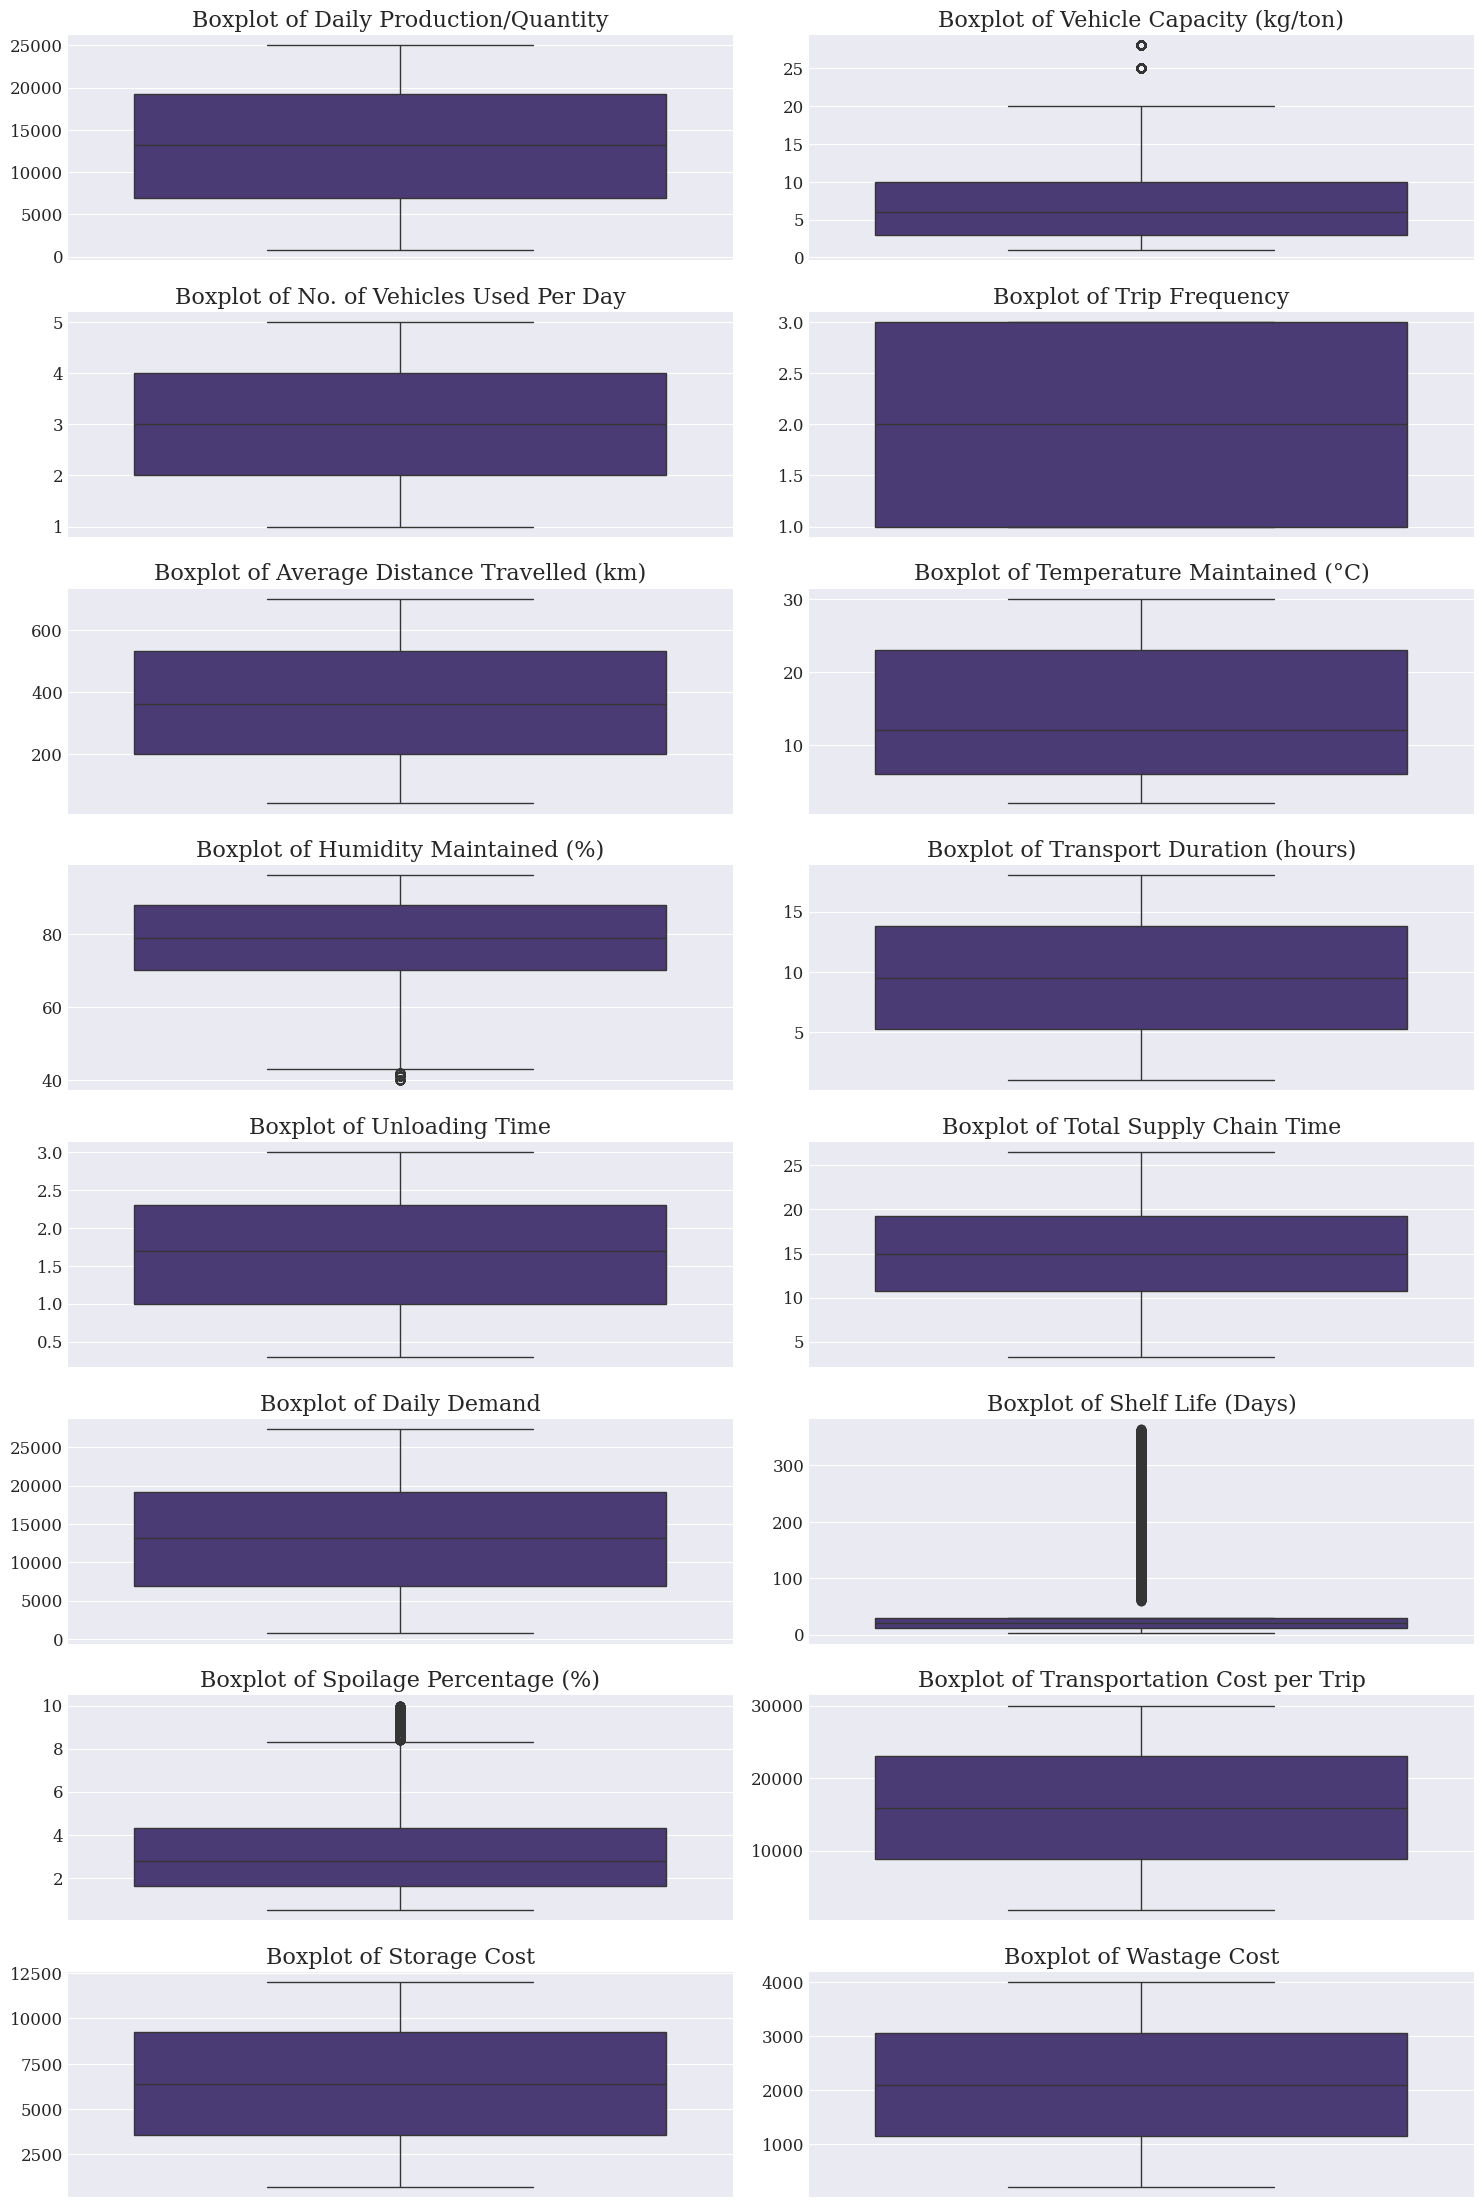

Boxplots displayed for non-categorical variables. Outliers are visible as points beyond the whiskers.


In [13]:
# Define the non-categorical (numeric) columns based on previous classification
numeric_cols = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)',
    'No. of Vehicles Used Per Day', 'Trip Frequency',
    'Average Distance Travelled (km)', 'Temperature Maintained (°C)',
    'Humidity Maintained (%)', 'Transport Duration (hours)', 'Unloading Time',
    'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost'
]

# Filter to only columns present in the DataFrame
numeric_cols_present = [col for col in numeric_cols if col in sp_102_df_encoded.columns]

# Ensure serif font is used for plots generated in this cell and subsequent ones.
# This addresses the 'Times New Roman not found' warning by providing an alternative.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif'] + plt.rcParams['font.serif'] # Add DejaVu Serif first

print("## 1. Visualizing Outliers (Before Removal) ##")

# Plotting boxplots for each numeric column
plt.figure(figsize=(15, 25))
for i, col in enumerate(numeric_cols_present):
    plt.subplot(len(numeric_cols_present) // 2 + 1, 2, i + 1) # Adjust subplot grid dynamically
    sns.boxplot(y=sp_102_df_encoded[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

print("Boxplots displayed for non-categorical variables. Outliers are visible as points beyond the whiskers.")

### 2. Outlier Removal using IQR Method ###
Initial number of rows: 5001
Number of rows identified and removed as extreme outliers: 1084
Percentage of rows removed: 21.68%
Final number of rows after outlier removal: 3917

### 3. Visualizing Outliers (After Removal) ###


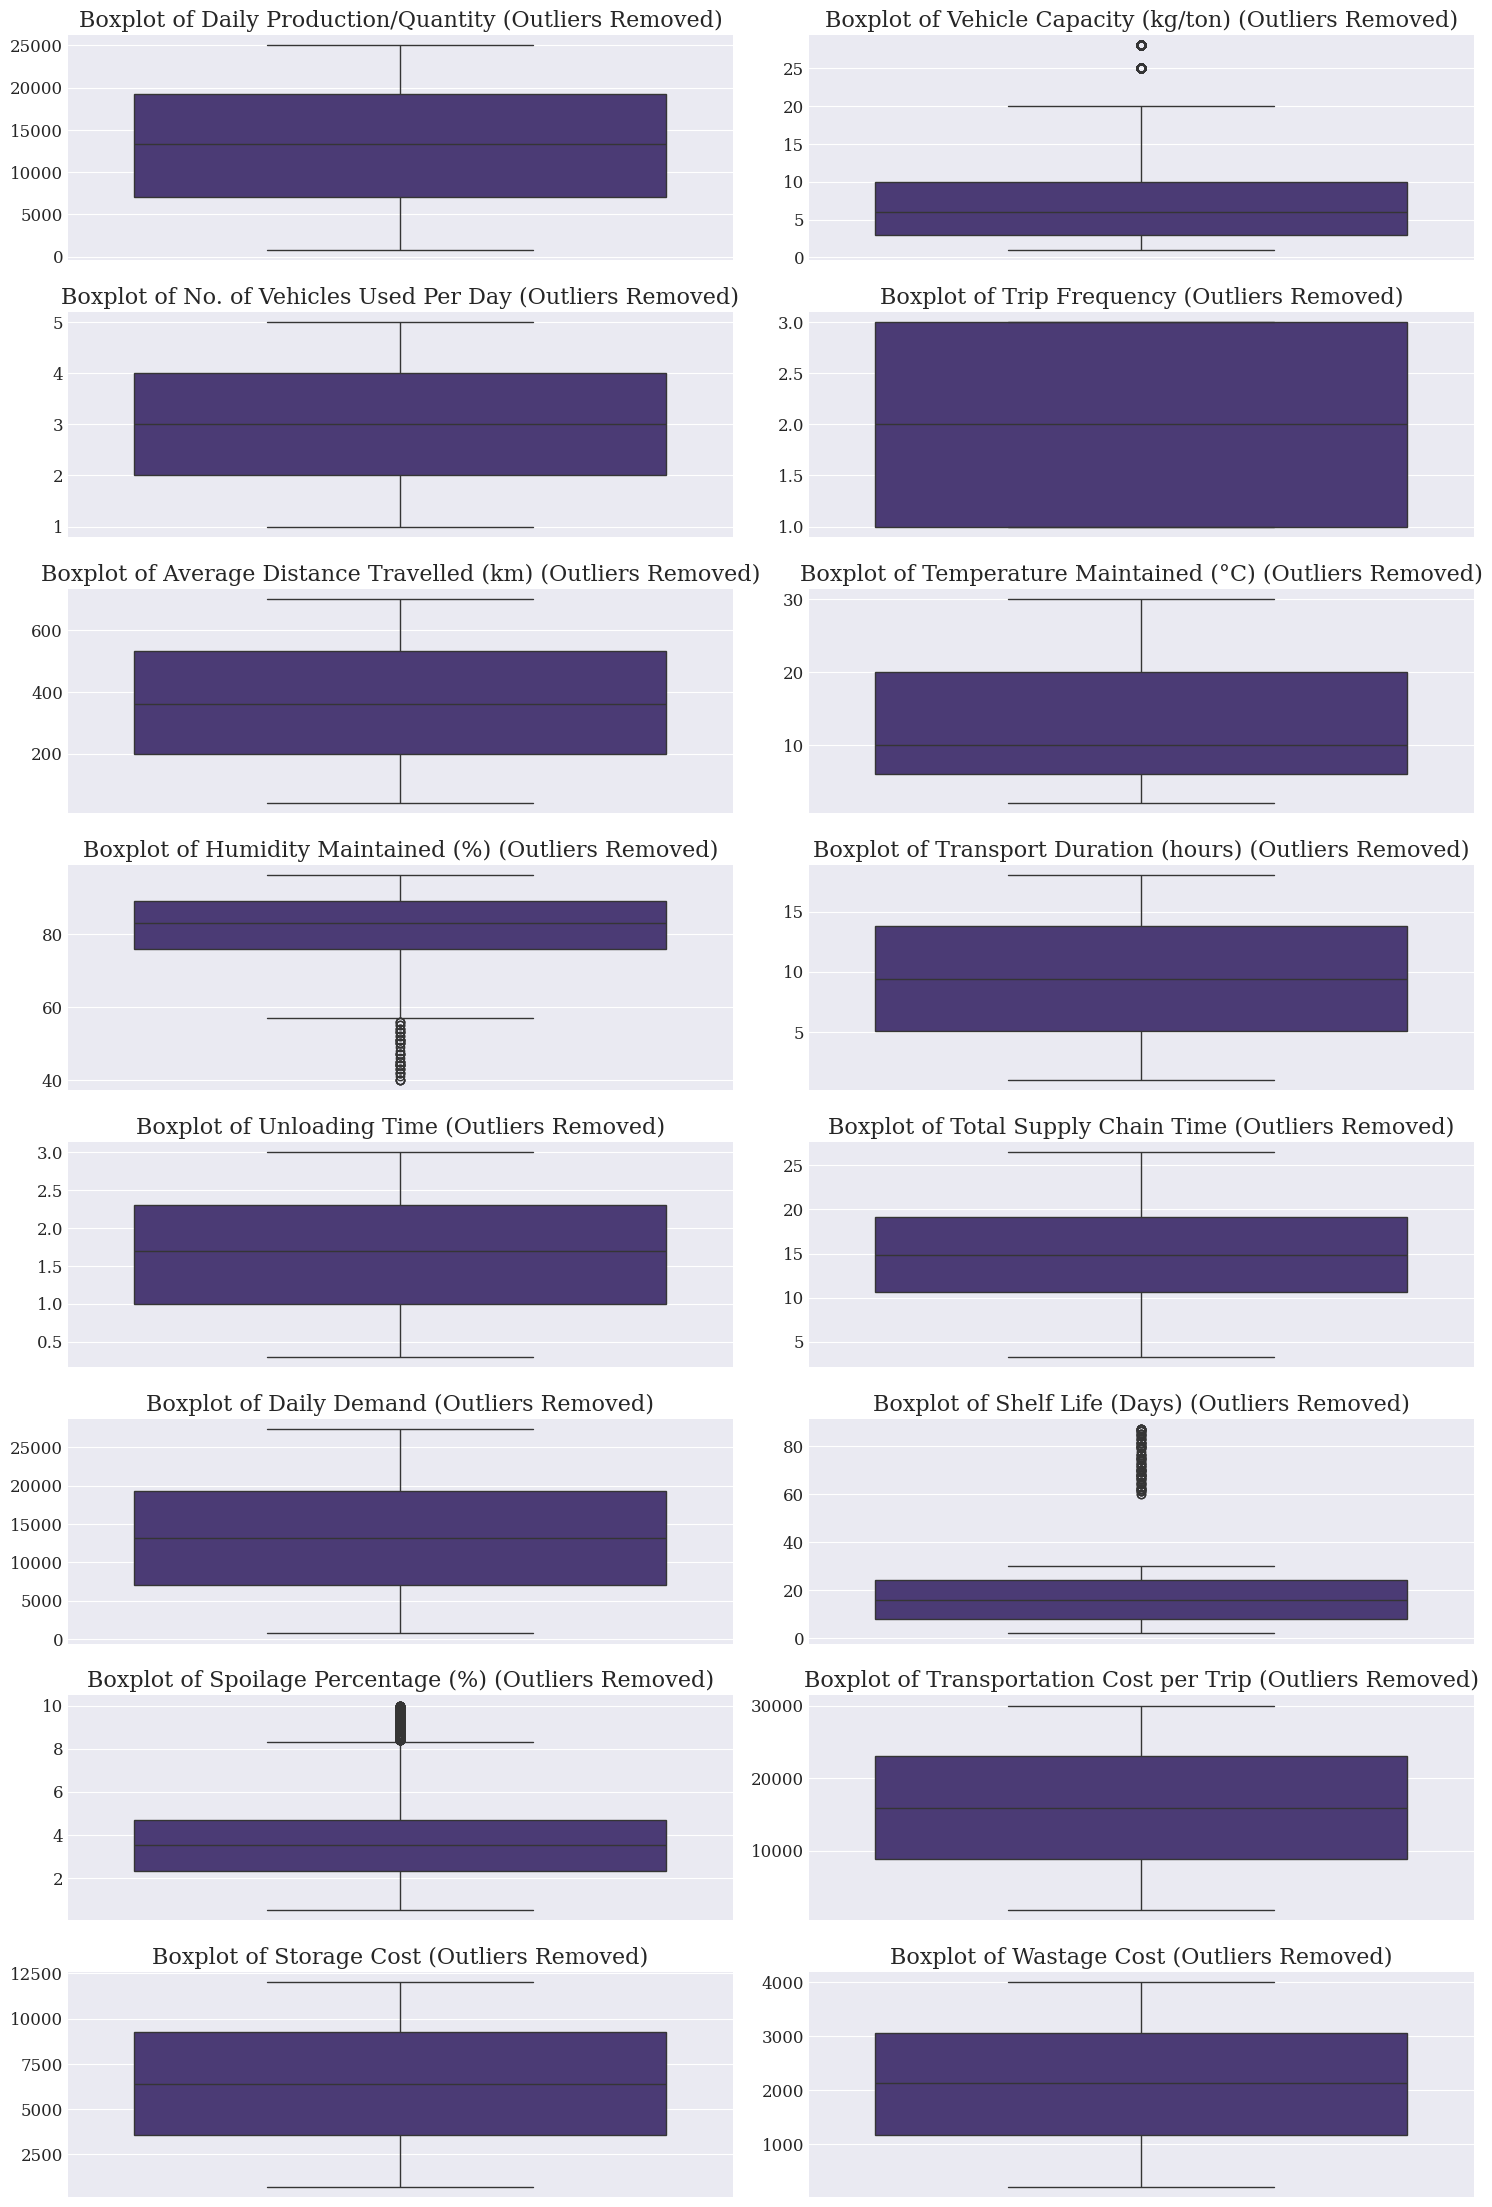

Boxplots after outlier removal displayed. Extreme outliers should be mitigated.


In [14]:
# Create a copy of the encoded dataframe for outlier removal
sp_102_df_outliers_removed = sp_102_df_encoded.copy()

# Store initial number of rows
initial_rows = sp_102_df_outliers_removed.shape[0]

# Identify and remove extreme outliers conservatively (using 3*IQR)
outlier_indices = pd.Series(dtype=bool)

for col in numeric_cols_present:
    Q1 = sp_102_df_outliers_removed[col].quantile(0.25)
    Q3 = sp_102_df_outliers_removed[col].quantile(0.75)
    IQR = Q3 - Q1

    # Conservative bounds (3 * IQR)
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Identify outliers for the current column
    col_outliers = (sp_102_df_outliers_removed[col] < lower_bound) | (sp_102_df_outliers_removed[col] > upper_bound)

    # If no outliers identified yet, initialize with current column's outliers
    if outlier_indices.empty:
        outlier_indices = col_outliers
    else:
        # Union of outliers from all columns
        outlier_indices = outlier_indices | col_outliers

# Remove rows identified as containing extreme outliers
sp_102_df_outliers_removed = sp_102_df_outliers_removed[~outlier_indices]

# Report rows removed
rows_removed = initial_rows - sp_102_df_outliers_removed.shape[0]
percentage_removed = (rows_removed / initial_rows) * 100

print("### 2. Outlier Removal using IQR Method ###")
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows identified and removed as extreme outliers: {rows_removed}")
print(f"Percentage of rows removed: {percentage_removed:.2f}%")
print(f"Final number of rows after outlier removal: {sp_102_df_outliers_removed.shape[0]}")

print("\n### 3. Visualizing Outliers (After Removal) ###")

# Plotting boxplots for each numeric column after outlier removal
plt.figure(figsize=(15, 25))
for i, col in enumerate(numeric_cols_present):
    plt.subplot(len(numeric_cols_present) // 2 + 1, 2, i + 1)
    sns.boxplot(y=sp_102_df_outliers_removed[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

print("Boxplots after outlier removal displayed. Extreme outliers should be mitigated.")

In [15]:
# Create a copy of the dataframe after outlier removal for scaling
sp_102_df_scaled = sp_102_df_outliers_removed.copy()

# Define the non-categorical (numeric) columns (excluding encoded ordinal column for now if it's already numerical)
numeric_cols_for_scaling = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)',
    'No. of Vehicles Used Per Day', 'Trip Frequency',
    'Average Distance Travelled (km)', 'Temperature Maintained (°C)',
    'Humidity Maintained (%)', 'Transport Duration (hours)', 'Unloading Time',
    'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost',
    'Initial Quality Grade_Encoded' # Including the encoded ordinal variable as it's numerical
]

# Filter to only columns present in the DataFrame
numeric_cols_for_scaling = [col for col in numeric_cols_for_scaling if col in sp_102_df_scaled.columns]

print("### 1. Optional Log Transformation for Skewed Variables ###")

# Identify 'Spoilage %' and cost variables for log transformation
log_transform_cols = [
    'Spoilage Percentage (%)', 'Transportation Cost per Trip',
    'Storage Cost', 'Wastage Cost', 'Daily Production/Quantity', 'Daily Demand'
]

# Filter to only columns present and ensure they are numeric
log_transform_cols = [col for col in log_transform_cols if col in sp_102_df_scaled.columns and pd.api.types.is_numeric_dtype(sp_102_df_scaled[col])]

for col in log_transform_cols:
    # Apply log1p transformation to handle potential zero values and reduce skewness
    # Only apply if the column is not constant (std dev > 0)
    if sp_102_df_scaled[col].std() > 0:
        sp_102_df_scaled[col] = np.log1p(sp_102_df_scaled[col])
        print(f"Applied log1p transformation to '{col}'.")
    else:
        print(f"Skipped log1p transformation for '{col}' (constant values).")

print("\nLog transformation applied to selected variables.")

# Prepare data for scaling - only numeric columns
X_numeric = sp_102_df_scaled[numeric_cols_for_scaling]

print("\n### 2. Applying StandardScaler ###")
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X_numeric)
sp_102_df_standard_scaled = pd.DataFrame(X_standard_scaled, columns=X_numeric.columns, index=sp_102_df_scaled.index)
print("StandardScaler applied. First 5 rows of scaled data:")
display(sp_102_df_standard_scaled.head())

print("\nDescriptive statistics after StandardScaler:")
display(sp_102_df_standard_scaled.describe())

print("\n### 3. Applying MinMaxScaler ###")
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X_numeric)
sp_102_df_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns=X_numeric.columns, index=sp_102_df_scaled.index)
print("MinMaxScaler applied. First 5 rows of scaled data:")
display(sp_102_df_minmax_scaled.head())

print("\nDescriptive statistics after MinMaxScaler:")
display(sp_102_df_minmax_scaled.describe())

### 1. Optional Log Transformation for Skewed Variables ###
Applied log1p transformation to 'Spoilage Percentage (%)'.
Applied log1p transformation to 'Transportation Cost per Trip'.
Applied log1p transformation to 'Storage Cost'.
Applied log1p transformation to 'Wastage Cost'.
Applied log1p transformation to 'Daily Production/Quantity'.
Applied log1p transformation to 'Daily Demand'.

Log transformation applied to selected variables.

### 2. Applying StandardScaler ###
StandardScaler applied. First 5 rows of scaled data:


Daily Production/Quantity  Vehicle Capacity (kg/ton)  \
76054                   0.920340                   0.295089   
65803                  -2.792590                  -0.866948   
37234                   0.017985                  -0.431184   
4906                    0.488986                  -0.721694   
2019                    0.844354                  -0.140675   

       No. of Vehicles Used Per Day  Trip Frequency  \
76054                      0.706388       -1.249890   
65803                      1.412055        1.215276   
37234                      0.706388        1.215276   
4906                       0.706388       -0.017307   
2019                      -1.410614        1.215276   

       Average Distance Travelled (km)  Temperature Maintained (°C)  \
76054                         0.854917                    -0.049712   
65803                        -1.461560                    -1.321572   
37234                        -1.068493                    -0.049712   
4906                         -0.062241                     1.222148   
2019                          0.744858                    -0.049712   

       Humidity Maintained (%)  Transport Duration (hours)  Unloading Time  \
76054                -0.941778                   -0.775682       -0.447642   
65803                 1.209078                   -1.582016        0.704068   
37234                 0.303455                   -0.533782       -1.087481   
4906                  1.548687                    0.171760       -0.191707   
2019                  0.643063                   -0.372515       -0.191707   

       Total Supply Chain Time  Daily Demand  Shelf Life (Days)  \
76054                -0.544730      1.012398           0.442624   
65803                -1.157809     -2.802400           0.759871   
37234                -0.295666      0.005173           0.601248   
4906                  0.164143      0.515935           0.442624   
2019                 -0.295666      0.734007          -1.222925   

       Spoilage Percentage (%)  Transportation Cost per Trip  Storage Cost  \
76054                -1.564218                      0.867491      1.056743   
65803                -0.933001                     -0.786209      1.153309   
37234                 0.633134                      0.816419      0.914869   
4906                 -0.190909                     -0.063588     -1.122724   
2019                  1.903337                      0.689513      0.182583   

       Wastage Cost  Initial Quality Grade_Encoded  
76054      0.800639                       1.382853  
65803     -0.723972                       0.679759  
37234      0.259211                       0.679759  
4906       0.209514                      -1.429522  
2019       0.255766                      -0.023335


Descriptive statistics after StandardScaler:


Daily Production/Quantity  Vehicle Capacity (kg/ton)  \
count               3.917000e+03               3.917000e+03   
mean                1.077514e-15              -5.079192e-17   
std                 1.000128e+00               1.000128e+00   
min                -3.310993e+00              -1.012203e+00   
25%                -5.090105e-01              -7.216935e-01   
50%                 3.029223e-01              -2.859295e-01   
75%                 7.817616e-01               2.950891e-01   
max                 1.119486e+00               2.909673e+00   

       No. of Vehicles Used Per Day  Trip Frequency  \
count                  3.917000e+03    3.917000e+03   
mean                  -1.804927e-16    1.977257e-16   
std                    1.000128e+00    1.000128e+00   
min                   -1.410614e+00   -1.249890e+00   
25%                   -7.049466e-01   -1.249890e+00   
50%                    7.206201e-04   -1.730714e-02   
75%                    7.063878e-01    1.215276e+00   
max                    1.412055e+00    1.215276e+00   

       Average Distance Travelled (km)  Temperature Maintained (°C)  \
count                     3.917000e+03                 3.917000e+03   
mean                     -1.111073e-16                -8.344388e-17   
std                       1.000128e+00                 1.000128e+00   
min                      -1.692160e+00                -1.321572e+00   
25%                      -8.640978e-01                -8.128281e-01   
50%                      -2.031333e-02                -3.040840e-01   
75%                       8.758802e-01                 9.677762e-01   
max                       1.766833e+00                 2.239636e+00   

       Humidity Maintained (%)  Transport Duration (hours)  Unloading Time  \
count             3.917000e+03                3.917000e+03    3.917000e+03   
mean             -2.485176e-16                6.167591e-17    2.135982e-16   
std               1.000128e+00                1.000128e+00    1.000128e+00   
min              -4.790680e+00               -1.702967e+00   -1.727320e+00   
25%              -7.153723e-01               -8.764741e-01   -8.315453e-01   
50%               7.704854e-02               -9.664893e-03    6.422890e-02   
75%               7.562664e-01                8.773026e-01    8.320354e-01   
max               1.548687e+00                1.723953e+00    1.727810e+00   

       Total Supply Chain Time  Daily Demand  Shelf Life (Days)  \
count             3.917000e+03  3.917000e+03       3.917000e+03   
mean              2.630296e-17  9.795585e-16       2.539596e-17   
std               1.000128e+00  1.000128e+00       1.000128e+00   
min              -2.211539e+00 -3.408598e+00      -1.222925e+00   
25%              -8.129519e-01 -5.149294e-01      -7.470542e-01   
50%              -8.285645e-03  2.989043e-01      -1.125593e-01   
75%               8.346981e-01  7.802436e-01       5.219357e-01   
max               2.233285e+00  1.233916e+00       5.518583e+00   

       Spoilage Percentage (%)  Transportation Cost per Trip  Storage Cost  \
count             3.917000e+03                  3.917000e+03  3.917000e+03   
mean             -3.455665e-16                 -2.283369e-15 -3.843407e-16   
std               1.000128e+00                  1.000128e+00  1.000128e+00   
min              -2.579675e+00                 -2.936069e+00 -2.935495e+00   
25%              -7.065781e-01                 -5.842896e-01 -5.797786e-01   
50%               3.024059e-02                  2.726108e-01  2.761392e-01   
75%               5.918169e-01                  8.164192e-01  8.175694e-01   
max               2.153637e+00                  1.206068e+00  1.201497e+00   

       Wastage Cost  Initial Quality Grade_Encoded  
count  3.917000e+03                   3.917000e+03  
mean  -5.188032e-16                  -1.006768e-16  
std    1.000128e+00                   1.000128e+00  
min   -3.121814e+00                  -1.429522e+00  
25%   -5.877609e-01         


### 3. Applying MinMaxScaler ###
MinMaxScaler applied. First 5 rows of scaled data:


Daily Production/Quantity  Vehicle Capacity (kg/ton)  \
76054                   0.955051                   0.333333   
65803                   0.117008                   0.037037   
37234                   0.751381                   0.148148   
4906                    0.857690                   0.074074   
2019                    0.937900                   0.222222   

       No. of Vehicles Used Per Day  Trip Frequency  \
76054                          0.75             0.0   
65803                          1.00             1.0   
37234                          0.75             1.0   
4906                           0.75             0.5   
2019                           0.00             1.0   

       Average Distance Travelled (km)  Temperature Maintained (°C)  \
76054                         0.736364                     0.357143   
65803                         0.066667                     0.000000   
37234                         0.180303                     0.357143   
4906                          0.471212                     0.714286   
2019                          0.704545                     0.357143   

       Humidity Maintained (%)  Transport Duration (hours)  Unloading Time  \
76054                 0.607143                    0.270588        0.370370   
65803                 0.946429                    0.035294        0.703704   
37234                 0.803571                    0.341176        0.185185   
4906                  1.000000                    0.547059        0.444444   
2019                  0.857143                    0.388235        0.444444   

       Total Supply Chain Time  Daily Demand  Shelf Life (Days)  \
76054                 0.375000      0.952285           0.247059   
65803                 0.237069      0.130575           0.294118   
37234                 0.431034      0.735328           0.270588   
4906                  0.534483      0.845347           0.247059   
2019                  0.431034      0.892319           0.000000   

       Spoilage Percentage (%)  Transportation Cost per Trip  Storage Cost  \
76054                 0.214534                      0.918260      0.965010   
65803                 0.347890                      0.519022      0.988352   
37234                 0.678765                      0.905931      0.930716   
4906                  0.504671                      0.693478      0.438186   
2019                  0.947120                      0.875293      0.753707   

       Wastage Cost  Initial Quality Grade_Encoded  
76054      0.909446                           1.00  
65803      0.555955                           0.75  
37234      0.783912                           0.75  
4906       0.772390                           0.00  
2019       0.783114                           0.50


Descriptive statistics after MinMaxScaler:


Daily Production/Quantity  Vehicle Capacity (kg/ton)  \
count                3917.000000                3917.000000   
mean                    0.747322                   0.258092   
std                     0.225738                   0.255013   
min                     0.000000                   0.000000   
25%                     0.632433                   0.074074   
50%                     0.815694                   0.185185   
75%                     0.923772                   0.333333   
max                     1.000000                   1.000000   

       No. of Vehicles Used Per Day  Trip Frequency  \
count                   3917.000000     3917.000000   
mean                       0.499745        0.507021   
std                        0.354320        0.405704   
min                        0.000000        0.000000   
25%                        0.250000        0.000000   
50%                        0.500000        0.500000   
75%                        0.750000        1.000000   
max                        1.000000        1.000000   

       Average Distance Travelled (km)  Temperature Maintained (°C)  \
count                      3917.000000                  3917.000000   
mean                          0.489206                     0.371102   
std                           0.289138                     0.280839   
min                           0.000000                     0.000000   
25%                           0.239394                     0.142857   
50%                           0.483333                     0.285714   
75%                           0.742424                     0.642857   
max                           1.000000                     1.000000   

       Humidity Maintained (%)  Transport Duration (hours)  Unloading Time  \
count              3917.000000                 3917.000000     3917.000000   
mean                  0.755703                    0.496938        0.499929   
std                   0.157765                    0.291844        0.289462   
min                   0.000000                    0.000000        0.000000   
25%                   0.642857                    0.241176        0.259259   
50%                   0.767857                    0.494118        0.518519   
75%                   0.875000                    0.752941        0.740741   
max                   1.000000                    1.000000        1.000000   

       Total Supply Chain Time  Daily Demand  Shelf Life (Days)  \
count              3917.000000   3917.000000        3917.000000   
mean                  0.497554      0.734214           0.181402   
std                   0.225010      0.215428           0.148354   
min                   0.000000      0.000000           0.000000   
25%                   0.314655      0.623298           0.070588   
50%                   0.495690      0.798598           0.164706   
75%                   0.685345      0.902279           0.258824   
max                   1.000000      1.000000           1.000000   

       Spoilage Percentage (%)  Transportation Cost per Trip  Storage Cost  \
count              3917.000000                   3917.000000   3917.000000   
mean                  0.545004                      0.708830      0.709572   
std                   0.211296                      0.241452      0.241752   
min                   0.000000                      0.000000      0.000000   
25%                   0.395726                      0.567770      0.569427   
50%                   0.551393                      0.774644      0.776321   
75%                   0.670037                      0.905931      0.907196   
max                   1.000000                      1.000000      1.000000   

       Wastage Cost  Initial Quality Grade_Encoded  
count   3917.000000                    3917.000000  
mean       0.723813                       0.508297  
std        0.231886                       0.355617  
min        0.000000                       0.000000  
25%        0.587536         

In [16]:
# Define the non-categorical (numeric) columns from the initial classification
numeric_cols_for_desc = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)',
    'Average Distance Travelled (km)', 'Temperature Maintained (°C)',
    'Humidity Maintained (%)', 'Transport Duration (hours)', 'Unloading Time',
    'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost'
]

# Filter to only columns present in the DataFrame (sp_102_df_outliers_removed)
numeric_cols_for_desc = [col for col in numeric_cols_for_desc if col in sp_102_df_outliers_removed.columns]

# Calculate descriptive statistics using .describe() for basic stats
descriptive_stats = sp_102_df_outliers_removed[numeric_cols_for_desc].describe().T

# Calculate skewness and kurtosis separately
skewness_kurtosis = sp_102_df_outliers_removed[numeric_cols_for_desc].agg(
    ['skew', 'kurt']
).T
skewness_kurtosis.rename(columns={'skew': 'skewness', 'kurt': 'kurtosis'}, inplace=True)

# Merge basic descriptive stats with skewness and kurtosis
stats_df = descriptive_stats[['min', 'max', 'mean', '50%', 'std']].copy()
stats_df.rename(columns={'50%': 'median'}, inplace=True)
stats_df = pd.concat([stats_df, skewness_kurtosis], axis=1)

# Calculate Coefficient of Variation
stats_df['CV'] = stats_df['std'] / stats_df['mean']

print("Descriptive Statistics for Non-Categorical Variables (After Outlier Removal):\n")
display(stats_df.round(2))

print("\nObservations for Non-Categorical Variables:")
print("- Most variables show a wide range between min and max, indicating variability in the supply chain data.")
print("- 'Daily Production/Quantity' and 'Daily Demand' have high means and standard deviations, suggesting diverse operational scales.")
print("- Several cost-related variables ('Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost') and 'Spoilage Percentage (%)' show positive skewness and kurtosis, indicating distributions with tails towards higher values, even after outlier removal.")
print("- The Coefficient of Variation (CV) varies significantly across features, highlighting differences in relative variability. For example, 'Humidity Maintained (%)' has a low CV, suggesting consistency, while cost variables tend to have higher CVs.")

Descriptive Statistics for Non-Categorical Variables (After Outlier Removal):



min      max      mean   median      std  \
Daily Production/Quantity         803.0  24995.0  13114.93  13266.0  7003.66   
Vehicle Capacity (kg/ton)           1.0     28.0      7.97      6.0     6.89   
Average Distance Travelled (km)    40.0    700.0    362.88    359.0   190.83   
Temperature Maintained (°C)         2.0     30.0     12.39     10.0     7.86   
Humidity Maintained (%)            40.0     96.0     82.32     83.0     8.83   
Transport Duration (hours)          1.0     18.0      9.45      9.4     4.96   
Unloading Time                      0.3      3.0      1.65      1.7     0.78   
Total Supply Chain Time             3.3     26.5     14.84     14.8     5.22   
Daily Demand                      737.0  27382.0  13127.64  13224.0  7058.16   
Shelf Life (Days)                   2.0     87.0     17.42     16.0    12.61   
Spoilage Percentage (%)             0.5     10.0      3.86      3.5     2.14   
Transportation Cost per Trip     1805.0  30000.0  15924.00  15925.0  8161.16   
Storage Cost                      708.0  12000.0   6363.46   6373.0  3271.74   
Wastage Cost                      200.0   3999.0   2117.42   2127.0  1089.88   

                                 skewness  kurtosis    CV  
Daily Production/Quantity           -0.05     -1.21  0.53  
Vehicle Capacity (kg/ton)            1.44      1.42  0.86  
Average Distance Travelled (km)      0.04     -1.20  0.53  
Temperature Maintained (°C)          0.38     -1.23  0.63  
Humidity Maintained (%)             -0.80      1.74  0.11  
Transport Duration (hours)           0.02     -1.23  0.53  
Unloading Time                      -0.01     -1.21  0.47  
Total Supply Chain Time             -0.00     -1.03  0.35  
Daily Demand                        -0.02     -1.17  0.54  
Shelf Life (Days)                    2.36      9.32  0.72  
Spoilage Percentage (%)              1.06      0.62  0.55  
Transportation Cost per Trip         0.01     -1.20  0.51  
Storage Cost                         0.00     -1.21  0.51  
Wastage Cost                        -0.01     -1.20  0.51


Observations for Non-Categorical Variables:
- Most variables show a wide range between min and max, indicating variability in the supply chain data.
- 'Daily Production/Quantity' and 'Daily Demand' have high means and standard deviations, suggesting diverse operational scales.
- Several cost-related variables ('Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost') and 'Spoilage Percentage (%)' show positive skewness and kurtosis, indicating distributions with tails towards higher values, even after outlier removal.
- The Coefficient of Variation (CV) varies significantly across features, highlighting differences in relative variability. For example, 'Humidity Maintained (%)' has a low CV, suggesting consistency, while cost variables tend to have higher CVs.


In [17]:
# Define categorical columns from the initial classification
nominal_categorical_cols = [
    'Product Name', 'Category', 'Packaging Method', 'Source Location', 'Destination Location',
    'Who Receives the Goods?', 'End User Type', 'Is Real-time Tracking Used?', 'Data Collected',
    'Reasons for Spoilage', 'Tracking Method'
]

ordinal_categorical_cols = [
    'No. of Vehicles Used Per Day', 'Trip Frequency', 'Initial Quality Grade'
]

# Use sp_102_df_treated to get original categorical values before encoding for these stats
# Ensure only existing columns are considered
nominal_cols = [col for col in nominal_categorical_cols if col in sp_102_df_treated.columns]
ordinal_cols = [col for col in ordinal_categorical_cols if col in sp_102_df_treated.columns]

print("\nDescriptive Statistics for Nominal Categorical Variables (from sp_102_df_treated):\n")
for col in nominal_cols:
    print(f"--- Variable: {col} ---")
    freq_table = sp_102_df_treated[col].value_counts().reset_index()
    freq_table.columns = ['Category', 'Frequency']
    freq_table['Proportion'] = (freq_table['Frequency'] / len(sp_102_df_treated)).round(3)
    display(freq_table)
    print("\nObservation:")
    print(f"- {col} has {len(freq_table)} unique categories. The most frequent category is '{freq_table.iloc[0]['Category']}' with a proportion of {freq_table.iloc[0]['Proportion']}.")
    if len(freq_table) > 10: # Example observation for high cardinality
        print(f"  - Showing top 5 categories due to high cardinality. 'Product Name' for instance, has a very high number of unique values, which could pose challenges for direct interpretation of one-hot encoded features.")
    print("\n") # Add extra newline for spacing

print("\nDescriptive Statistics for Ordinal Categorical Variables (from sp_102_df_treated):\n")
for col in ordinal_cols:
    print(f"--- Variable: {col} ---")
    freq_table = sp_102_df_treated[col].value_counts().sort_index().reset_index()
    freq_table.columns = ['Category', 'Frequency']
    # Corrected: Use 'Frequency' for proportion calculation
    freq_table['Proportion'] = (freq_table['Frequency'] / len(sp_102_df_treated)).round(3)

    # Add a simple 'Rank' for interpretation of ordinality
    if col == 'Initial Quality Grade':
        quality_order = ['C', 'B', 'B+', 'A-', 'A', 'AA']
        rank_mapping = {grade: i + 1 for i, grade in enumerate(quality_order)}
        freq_table['Rank'] = freq_table['Category'].map(rank_mapping)
    else: # For 'No. of Vehicles Used Per Day', 'Trip Frequency' which are already numeric-like
        freq_table['Rank'] = freq_table['Category'].rank(method='min').astype(int)

display(freq_table)
print("\nObservation:")
print(f"- {col} demonstrates clear ordering. The most frequent category is '{freq_table.iloc[0]['Category']}' with a proportion of {freq_table.iloc[0]['Proportion']}. The ranks indicate the inherent order of the categories.")
print("\n") # Add extra newline for spacing


Descriptive Statistics for Nominal Categorical Variables (from sp_102_df_treated):

--- Variable: Product Name ---


Category  Frequency  Proportion
0            Mint (Pudina)        179       0.036
1              Snake Gourd        173       0.035
2       Pepper (Ungarbled)        171       0.034
3             Elephant Yam        167       0.033
4                    Maize        166       0.033
5              Pomegranate        166       0.033
6             Bottle Gourd        166       0.033
7                   Potato        162       0.032
8                  Tapioca        162       0.032
9         Coriander Leaves        162       0.032
10               Drumstick        158       0.032
11                 Brinjal        157       0.031
12             Cauliflower        156       0.031
13                   Mango        154       0.031
14                  Garlic        153       0.031
15             Water Melon        153       0.031
16            Green Chilli        151       0.030
17                 Cabbage        150       0.030
18                   Onion        149       0.030
19                  Papaya        148       0.030
20                  Tomato        148       0.030
21            Dry Chillies        147       0.029
22           Cluster Beans        147       0.029
23                    Rice        145       0.029
24                   Apple        143       0.029
25  Bhindi (Ladies Finger)        140       0.028
26                   Wheat        139       0.028
27                  Banana        136       0.027
28                Soyabean        133       0.027
29          Turmeric (Dry)        133       0.027
30                 Spinach        132       0.026
31                  Grapes        131       0.026
32          Banana - Green        124       0.025


Observation:
- Product Name has 33 unique categories. The most frequent category is 'Mint (Pudina)' with a proportion of 0.036.
  - Showing top 5 categories due to high cardinality. 'Product Name' for instance, has a very high number of unique values, which could pose challenges for direct interpretation of one-hot encoded features.


--- Variable: Category ---


Category  Frequency  Proportion
0        Vegetable       1857       0.371
1            Fruit       1155       0.231
2            Spice        604       0.121
3  Leafy Vegetable        473       0.095
4            Grain        450       0.090
5        Root Crop        329       0.066
6    Grain/Oilseed        133       0.027


Observation:
- Category has 7 unique categories. The most frequent category is 'Vegetable' with a proportion of 0.371.


--- Variable: Packaging Method ---


Category  Frequency  Proportion
0         Gunny Bags        587       0.117
1     Plastic Crates        574       0.115
2            Cartons        567       0.113
3      Loose in Bins        559       0.112
4   Trays in Cartons        554       0.111
5         HDPE Sacks        550       0.110
6    Loose in Layers        545       0.109
7  Perforated Crates        534       0.107
8           Net Bags        531       0.106


Observation:
- Packaging Method has 9 unique categories. The most frequent category is 'Gunny Bags' with a proportion of 0.117.


--- Variable: Source Location ---


Category  Frequency  Proportion
0       Kozhikode KL        369       0.074
1          Mysore KA        364       0.073
2        Ludhiana PB        350       0.070
3          Nashik MH        347       0.069
4     Perumbavoor KL        343       0.069
5          Guntur AP        339       0.068
6   Sriganganagar RJ        336       0.067
7         Mangaon MH        330       0.066
8          Shimla HP        330       0.066
9           Surat GJ        327       0.065
10       Rayagada OD        325       0.065
11           Agra UP        320       0.064
12        Bharuch GJ        317       0.063
13   Chengalpattu TN        311       0.062
14         Indore MP        293       0.059


Observation:
- Source Location has 15 unique categories. The most frequent category is 'Kozhikode KL' with a proportion of 0.074.
  - Showing top 5 categories due to high cardinality. 'Product Name' for instance, has a very high number of unique values, which could pose challenges for direct interpretation of one-hot encoded features.


--- Variable: Destination Location ---


Category  Frequency  Proportion
0         Pune MH        365       0.073
1    Bangalore KA        361       0.072
2        Delhi DL        360       0.072
3       Mumbai MH        353       0.071
4      Kolkata WB        350       0.070
5      Lucknow UP        335       0.067
6    Hyderabad TS        330       0.066
7       Jaipur RJ        323       0.065
8        Kochi KL        320       0.064
9       Bhopal MP        320       0.064
10     Patiala PB        319       0.064
11  Chandigarh CH        319       0.064
12     Chennai TN        317       0.063
13   Ahmedabad GJ        317       0.063
14   Hyderabad AP        312       0.062


Observation:
- Destination Location has 15 unique categories. The most frequent category is 'Pune MH' with a proportion of 0.073.
  - Showing top 5 categories due to high cardinality. 'Product Name' for instance, has a very high number of unique values, which could pose challenges for direct interpretation of one-hot encoded features.


--- Variable: Who Receives the Goods? ---


Category  Frequency  Proportion
0       Commission Agent        748       0.150
1        Retail Chain DC        742       0.148
2               Exporter        738       0.148
3              Processor        720       0.144
4       Wholesale Market        693       0.139
5  Cold Storage Operator        688       0.138
6       Fruit Wholesaler        672       0.134


Observation:
- Who Receives the Goods? has 7 unique categories. The most frequent category is 'Commission Agent' with a proportion of 0.15.


--- Variable: End User Type ---


Category  Frequency  Proportion
0  Feed Manufacturers       1023       0.205
1           Retailers       1001       0.200
2           Exporters        997       0.199
3     Urban Consumers        997       0.199
4          Processors        983       0.197


Observation:
- End User Type has 5 unique categories. The most frequent category is 'Feed Manufacturers' with a proportion of 0.205.


--- Variable: Is Real-time Tracking Used? ---


Category  Frequency  Proportion
0      Yes       2522       0.504
1       No       2479       0.496


Observation:
- Is Real-time Tracking Used? has 2 unique categories. The most frequent category is 'Yes' with a proportion of 0.504.


--- Variable: Data Collected ---


Category  Frequency  Proportion
0                  Quantity       2479       0.496
1                  Location       1284       0.257
2  Temp, humidity, location       1238       0.248


Observation:
- Data Collected has 3 unique categories. The most frequent category is 'Quantity' with a proportion of 0.496.


--- Variable: Reasons for Spoilage ---


Category  Frequency  Proportion
0         Delay in transit        670       0.134
1         Moisture ingress        634       0.127
2              Pest damage        628       0.126
3  Temperature fluctuation        626       0.125
4            Over-ripening        618       0.124
5              Dehydration        617       0.123
6        Improper stacking        614       0.123
7        Mechanical damage        594       0.119


Observation:
- Reasons for Spoilage has 8 unique categories. The most frequent category is 'Delay in transit' with a proportion of 0.134.


--- Variable: Tracking Method ---


Category  Frequency  Proportion
0         RFID + GPS       3124       0.625
1                GPS        639       0.128
2          GPS + IoT        635       0.127
3  GPS + Temp Logger        603       0.121


Observation:
- Tracking Method has 4 unique categories. The most frequent category is 'RFID + GPS' with a proportion of 0.625.



Descriptive Statistics for Ordinal Categorical Variables (from sp_102_df_treated):

--- Variable: No. of Vehicles Used Per Day ---
--- Variable: Trip Frequency ---
--- Variable: Initial Quality Grade ---


Category  Frequency  Proportion  Rank
0        A       1014       0.203     5
1       A-        987       0.197     4
2       AA       1028       0.206     6
3        B        999       0.200     2
4       B+        973       0.195     3


Observation:
- Initial Quality Grade demonstrates clear ordering. The most frequent category is 'A' with a proportion of 0.203. The ranks indicate the inherent order of the categories.




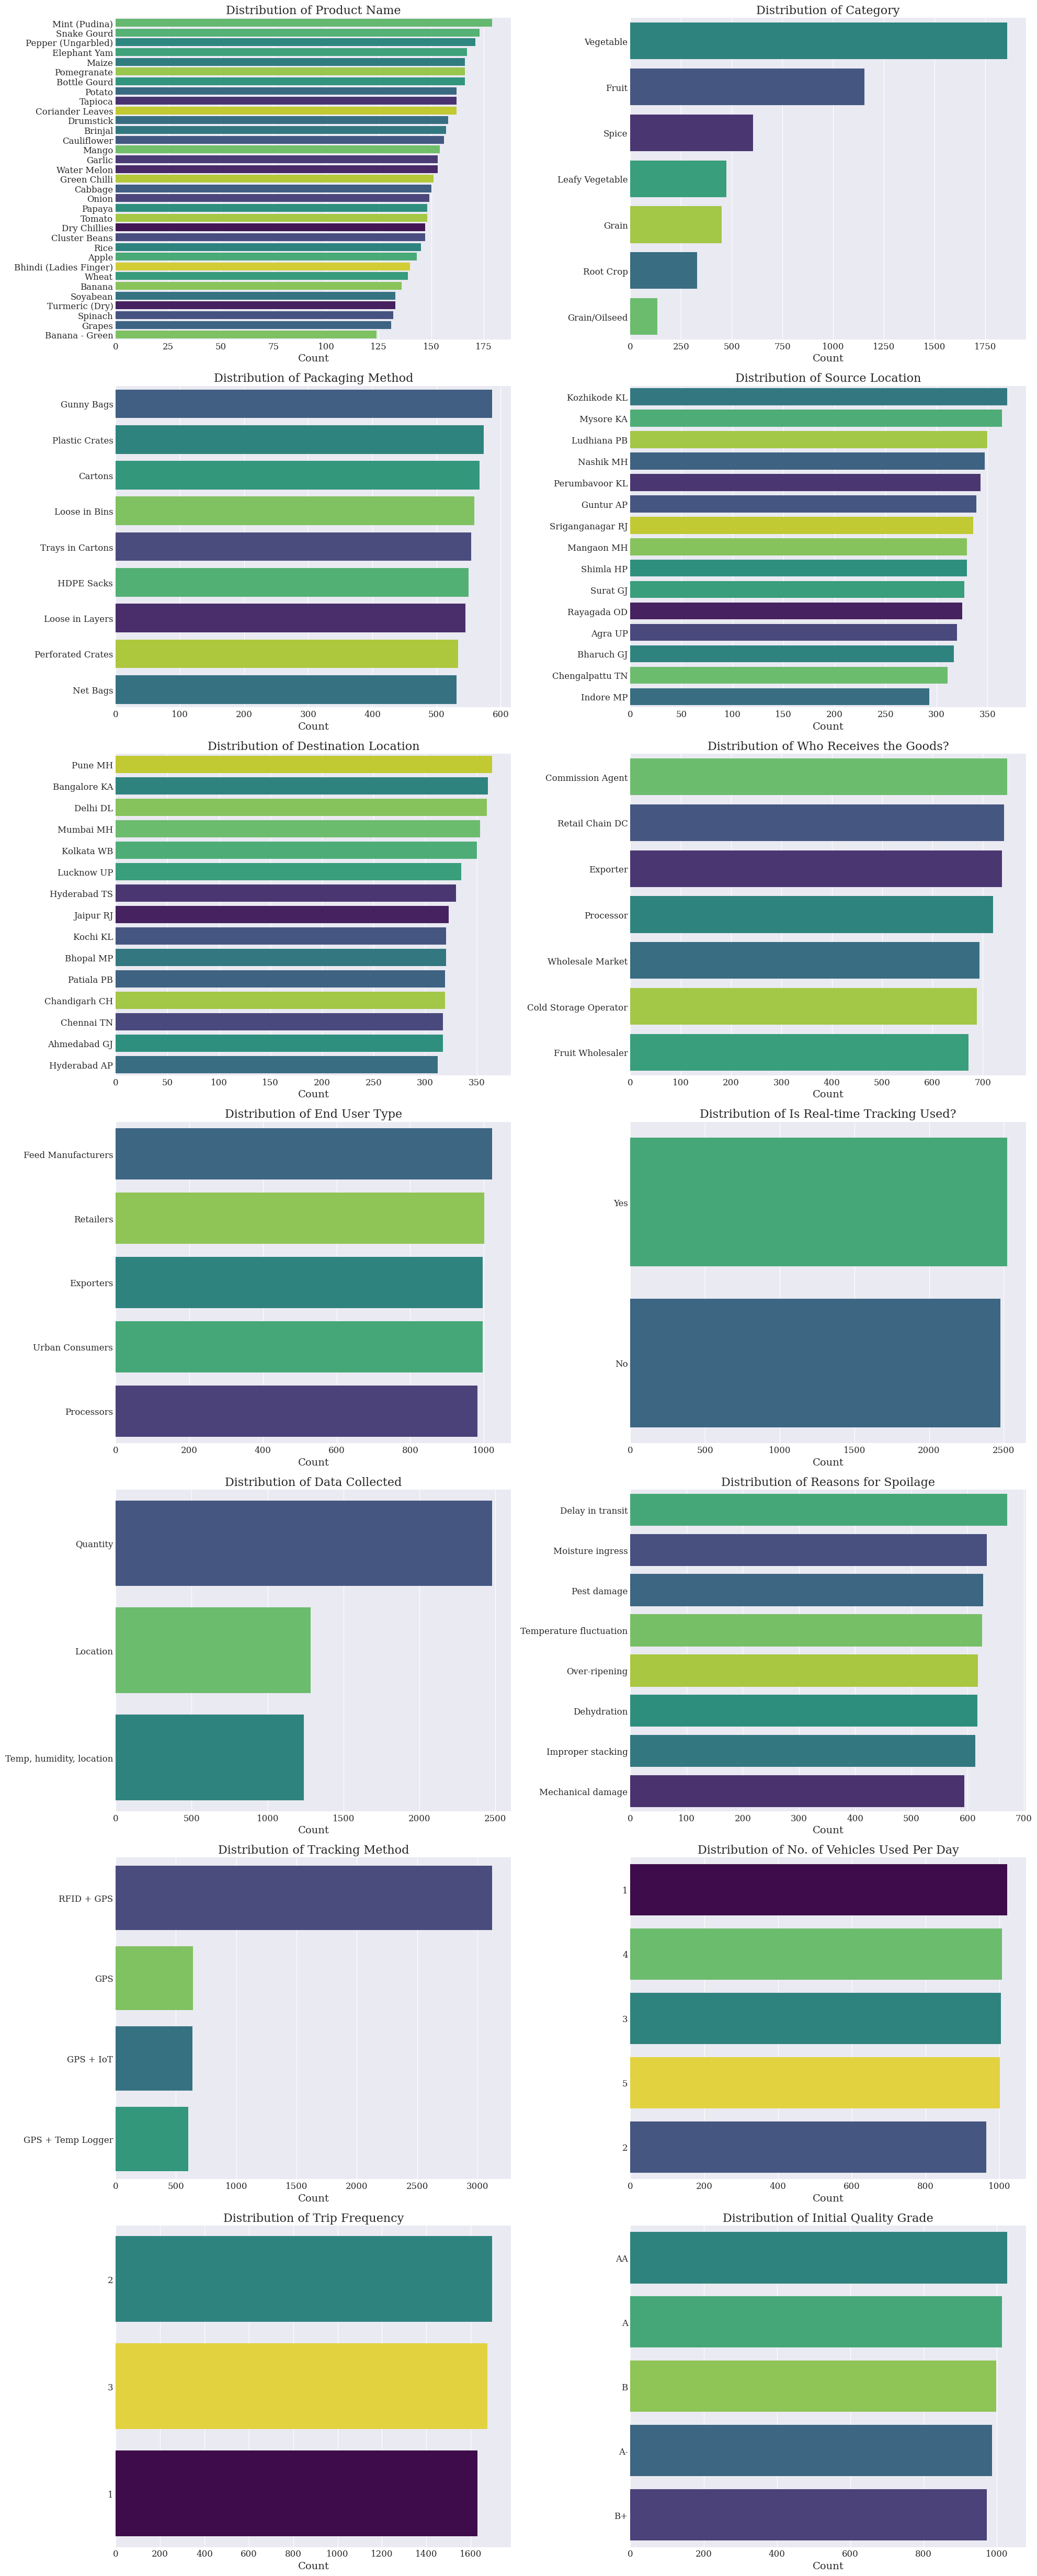

In [18]:
# Define categorical columns from the initial classification (using sp_102_df_treated)
nominal_categorical_cols = [
    'Product Name', 'Category', 'Packaging Method', 'Source Location', 'Destination Location',
    'Who Receives the Goods?', 'End User Type', 'Is Real-time Tracking Used?', 'Data Collected',
    'Reasons for Spoilage', 'Tracking Method'
]

ordinal_categorical_cols = [
    'No. of Vehicles Used Per Day', 'Trip Frequency', 'Initial Quality Grade'
]

# Filter to only columns present in the DataFrame
nominal_cols = [col for col in nominal_categorical_cols if col in sp_102_df_treated.columns]
ordinal_cols = [col for col in ordinal_categorical_cols if col in sp_102_df_treated.columns]

# Combine for plotting
categorical_cols_for_plotting = nominal_cols + ordinal_cols

plt.figure(figsize=(20, len(categorical_cols_for_plotting) * 4))
for i, col in enumerate(categorical_cols_for_plotting):
    plt.subplot(len(categorical_cols_for_plotting) // 2 + 1, 2, i + 1)
    sns.countplot(y=sp_102_df_treated[col], order=sp_102_df_treated[col].value_counts().index, palette='viridis', hue=sp_102_df_treated[col], legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel('')
plt.tight_layout()
plt.show()

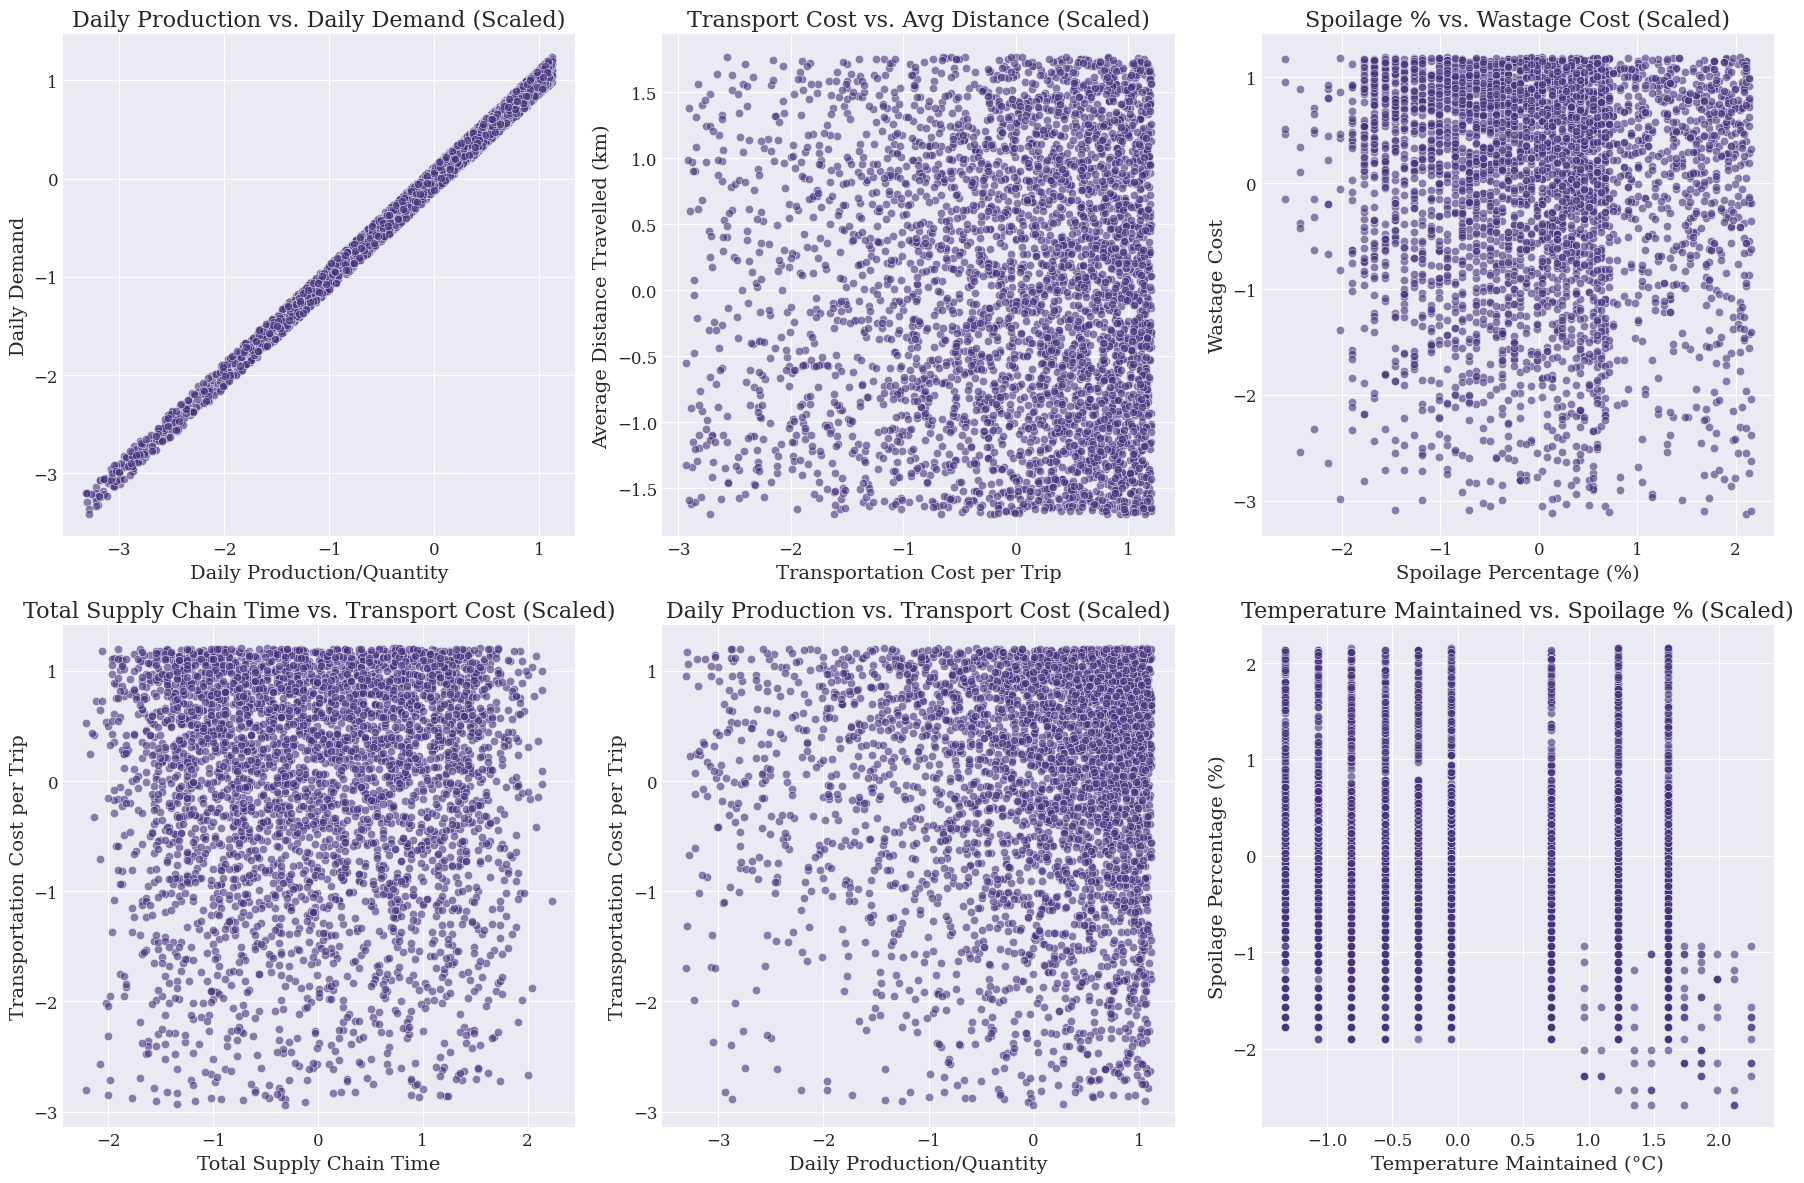

Interpretation of Numeric Variable Scatter Plots:
- These scatter plots illustrate the relationships between pairs of scaled numeric variables.
- We can observe potential positive correlations (e.g., between 'Daily Production/Quantity' and 'Daily Demand', or 'Transportation Cost per Trip' and 'Average Distance Travelled (km)').
- Some plots might show clusters or patterns indicating different operational segments or product behaviors.
- The relationship between 'Spoilage Percentage (%)' and 'Wastage Cost' is expected to be positive, as higher spoilage generally leads to higher wastage costs.
- The influence of factors like 'Temperature Maintained (°C)' on 'Spoilage Percentage (%)' can also be visually assessed, potentially showing trends where certain temperatures are associated with higher or lower spoilage.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set font family for plots to address matplotlib warnings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif'] + plt.rcParams['font.serif'] # Add DejaVu Serif first

# Re-creating dependencies from earlier cells to ensure sp_102_df_standard_scaled is defined

# --- Code from 9b05a54b: Load the dataset from Google Drive ---
drive_file_id = '1ZCjwHRXW19f5IguVqjBUdXIVpgzPnM4F' # Extracted from the provided URL
download_url = f'https://drive.google.com/uc?export=download&id={drive_file_id}'

try:
    sp102_df = pd.read_csv(download_url)
except Exception as e:
    print(f"Error loading dataset: {e}")
    sp102_df = pd.DataFrame() # Initialize an empty DataFrame in case of error

# --- Code from 31bcd3b6: Randomly select 5001 records for individual analysis ---
RANDOM_STATE = 102 # Ensure RANDOM_STATE is defined
np.random.seed(RANDOM_STATE)
sp_102_df_5001 = sp102_df.sample(n=5001, random_state=RANDOM_STATE, replace=False)

# --- Code from ce9e5ac6: Create a copy of the sampled dataset for treatment ---
sp_102_df_treated = sp_102_df_5001.copy()

# --- Code from 62a4033a: Step 1: Remove variables with >= 50% missing values ---
missing_percentages_cols = (sp_102_df_treated.isnull().sum() / len(sp_102_df_treated)) * 100
columns_to_drop = missing_percentages_cols[missing_percentages_cols >= 50].index.tolist()
if columns_to_drop:
    sp_102_df_treated.drop(columns=columns_to_drop, inplace=True)

# --- Code from 2d123654: Step 2: Remove records (rows) with >= 50% missing values ---
missing_percentages_rows = (sp_102_df_treated.isnull().sum(axis=1) / len(sp_102_df_treated.columns)) * 100
rows_to_drop = missing_percentages_rows[missing_percentages_rows >= 50].index.tolist()
if rows_to_drop:
    sp_102_df_treated.drop(index=rows_to_drop, inplace=True)

# --- Code from 96cbd11f: Step 3: Impute remaining missing values ---
numeric_cols_96 = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)', 'Average Distance Travelled (km)',
    'Temperature Maintained (°C)', 'Humidity Maintained (%)', 'Transport Duration (hours)',
    'Unloading Time', 'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost'
]
nominal_categorical_cols_96 = [
    'Product Name', 'Category', 'Packaging Method', 'Source Location', 'Destination Location',
    'Who Receives the Goods?', 'End User Type', 'Is Real-time Tracking Used?', 'Data Collected',
    'Reasons for Spoilage', 'Tracking Method' # Added 'Tracking Method' here
]
ordinal_categorical_cols_96 = [
    'No. of Vehicles Used Per Day', 'Trip Frequency', 'Initial Quality Grade'
]
numeric_cols_96 = [col for col in numeric_cols_96 if col in sp_102_df_treated.columns]
nominal_categorical_cols_96 = [col for col in nominal_categorical_cols_96 if col in sp_102_df_treated.columns]
ordinal_categorical_cols_96 = [col for col in ordinal_categorical_cols_96 if col in sp_102_df_treated.columns]

for col in numeric_cols_96:
    if sp_102_df_treated[col].isnull().any():
        mean_val = sp_102_df_treated[col].mean()
        sp_102_df_treated[col] = sp_102_df_treated[col].fillna(mean_val) # Corrected inplace operation
for col in nominal_categorical_cols_96 + ordinal_categorical_cols_96:
    if sp_102_df_treated[col].isnull().any():
        mode_val = sp_102_df_treated[col].mode()[0]
        sp_102_df_treated[col] = sp_102_df_treated[col].fillna(mode_val) # Corrected inplace operation

# --- Code from 6457cba9: Categorical variable encoding ---
sp_102_df_encoded = sp_102_df_treated.copy()
ordinal_cols_to_map = ['Initial Quality Grade']
quality_order = ['C', 'B', 'B+', 'A-', 'A', 'AA']
nominal_cols_to_onehot = [
    'Product Name', 'Category', 'Vehicle Type', 'Packaging Method',
    'Time of Harvest', 'Time to Loading', 'Source Location', 'Destination Location',
    'Who Receives the Goods?', 'End User Type', 'Is Real-time Tracking Used?',
    'Tracking Method', 'Data Collected', 'Reasons for Spoilage'
]

if 'Initial Quality Grade' in sp_102_df_encoded.columns:
    quality_mapping = {grade: i for i, grade in enumerate(quality_order)}
    sp_102_df_encoded['Initial Quality Grade_Encoded'] = sp_102_df_encoded['Initial Quality Grade'].map(quality_mapping)
    sp_102_df_encoded.drop(columns=['Initial Quality Grade'], inplace=True)
nominal_cols_present_64 = [col for col in nominal_cols_to_onehot if col in sp_102_df_encoded.columns]
if nominal_cols_present_64:
    sp_102_df_encoded = pd.get_dummies(sp_102_df_encoded, columns=nominal_cols_present_64, drop_first=True, dtype=int)

# --- Code from 35a09b23: Outlier Removal using IQR Method ---
sp_102_df_outliers_removed = sp_102_df_encoded.copy()
numeric_cols_present_35 = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)',
    'No. of Vehicles Used Per Day', 'Trip Frequency',
    'Average Distance Travelled (km)', 'Temperature Maintained (°C)',
    'Humidity Maintained (%)', 'Transport Duration (hours)', 'Unloading Time',
    'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost'
]
numeric_cols_present_35 = [col for col in numeric_cols_present_35 if col in sp_102_df_outliers_removed.columns]

outlier_indices = pd.Series(dtype=bool)
for col in numeric_cols_present_35:
    Q1 = sp_102_df_outliers_removed[col].quantile(0.25)
    Q3 = sp_102_df_outliers_removed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    col_outliers = (sp_102_df_outliers_removed[col] < lower_bound) | (sp_102_df_outliers_removed[col] > upper_bound)
    if outlier_indices.empty:
        outlier_indices = col_outliers
    else:
        outlier_indices = outlier_indices | col_outliers
sp_102_df_outliers_removed = sp_102_df_outliers_removed[~outlier_indices]

# --- Code from 3636a797: Feature Scaling ---
sp_102_df_scaled = sp_102_df_outliers_removed.copy()
numeric_cols_for_scaling_36 = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)',
    'No. of Vehicles Used Per Day', 'Trip Frequency',
    'Average Distance Travelled (km)', 'Temperature Maintained (°C)',
    'Humidity Maintained (%)', 'Transport Duration (hours)', 'Unloading Time',
    'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost',
    'Initial Quality Grade_Encoded'
]
numeric_cols_for_scaling_36 = [col for col in numeric_cols_for_scaling_36 if col in sp_102_df_scaled.columns]

log_transform_cols_36 = [
    'Spoilage Percentage (%)', 'Transportation Cost per Trip',
    'Storage Cost', 'Wastage Cost', 'Daily Production/Quantity', 'Daily Demand'
]
log_transform_cols_36 = [col for col in log_transform_cols_36 if col in sp_102_df_scaled.columns and pd.api.types.is_numeric_dtype(sp_102_df_scaled[col])]
for col in log_transform_cols_36:
    if sp_102_df_scaled[col].std() > 0:
        sp_102_df_scaled[col] = np.log1p(sp_102_df_scaled[col])

X_numeric = sp_102_df_scaled[numeric_cols_for_scaling_36]
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X_numeric)
sp_102_df_standard_scaled = pd.DataFrame(X_standard_scaled, columns=X_numeric.columns, index=sp_102_df_scaled.index)

# --- Original Code from 17494948: Numeric Variable Scatter Plots ---
numeric_cols_for_scatter = [
    'Daily Production/Quantity', 'Daily Demand',
    'Transportation Cost per Trip', 'Spoilage Percentage (%)',
    'Average Distance Travelled (km)', 'Total Supply Chain Time'
]

numeric_cols_for_scatter = [col for col in numeric_cols_for_scatter if col in sp_102_df_standard_scaled.columns]

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.scatterplot(x='Daily Production/Quantity', y='Daily Demand', data=sp_102_df_standard_scaled, alpha=0.6)
plt.title('Daily Production vs. Daily Demand (Scaled)')

plt.subplot(2, 3, 2)
sns.scatterplot(x='Transportation Cost per Trip', y='Average Distance Travelled (km)', data=sp_102_df_standard_scaled, alpha=0.6)
plt.title('Transport Cost vs. Avg Distance (Scaled)')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Spoilage Percentage (%)', y='Wastage Cost', data=sp_102_df_standard_scaled, alpha=0.6)
plt.title('Spoilage % vs. Wastage Cost (Scaled)')

plt.subplot(2, 3, 4)
sns.scatterplot(x='Total Supply Chain Time', y='Transportation Cost per Trip', data=sp_102_df_standard_scaled, alpha=0.6)
plt.title('Total Supply Chain Time vs. Transport Cost (Scaled)')

plt.subplot(2, 3, 5)
sns.scatterplot(x='Daily Production/Quantity', y='Transportation Cost per Trip', data=sp_102_df_standard_scaled, alpha=0.6)
plt.title('Daily Production vs. Transport Cost (Scaled)')

plt.subplot(2, 3, 6)
sns.scatterplot(x='Temperature Maintained (°C)', y='Spoilage Percentage (%)', data=sp_102_df_standard_scaled, alpha=0.6)
plt.title('Temperature Maintained vs. Spoilage % (Scaled)')

plt.tight_layout()
plt.show()

print("Interpretation of Numeric Variable Scatter Plots:")
print("- These scatter plots illustrate the relationships between pairs of scaled numeric variables.")
print("- We can observe potential positive correlations (e.g., between 'Daily Production/Quantity' and 'Daily Demand', or 'Transportation Cost per Trip' and 'Average Distance Travelled (km)').")
print("- Some plots might show clusters or patterns indicating different operational segments or product behaviors.")
print("- The relationship between 'Spoilage Percentage (%)' and 'Wastage Cost' is expected to be positive, as higher spoilage generally leads to higher wastage costs.")
print("- The influence of factors like 'Temperature Maintained (°C)' on 'Spoilage Percentage (%)' can also be visually assessed, potentially showing trends where certain temperatures are associated with higher or lower spoilage.")

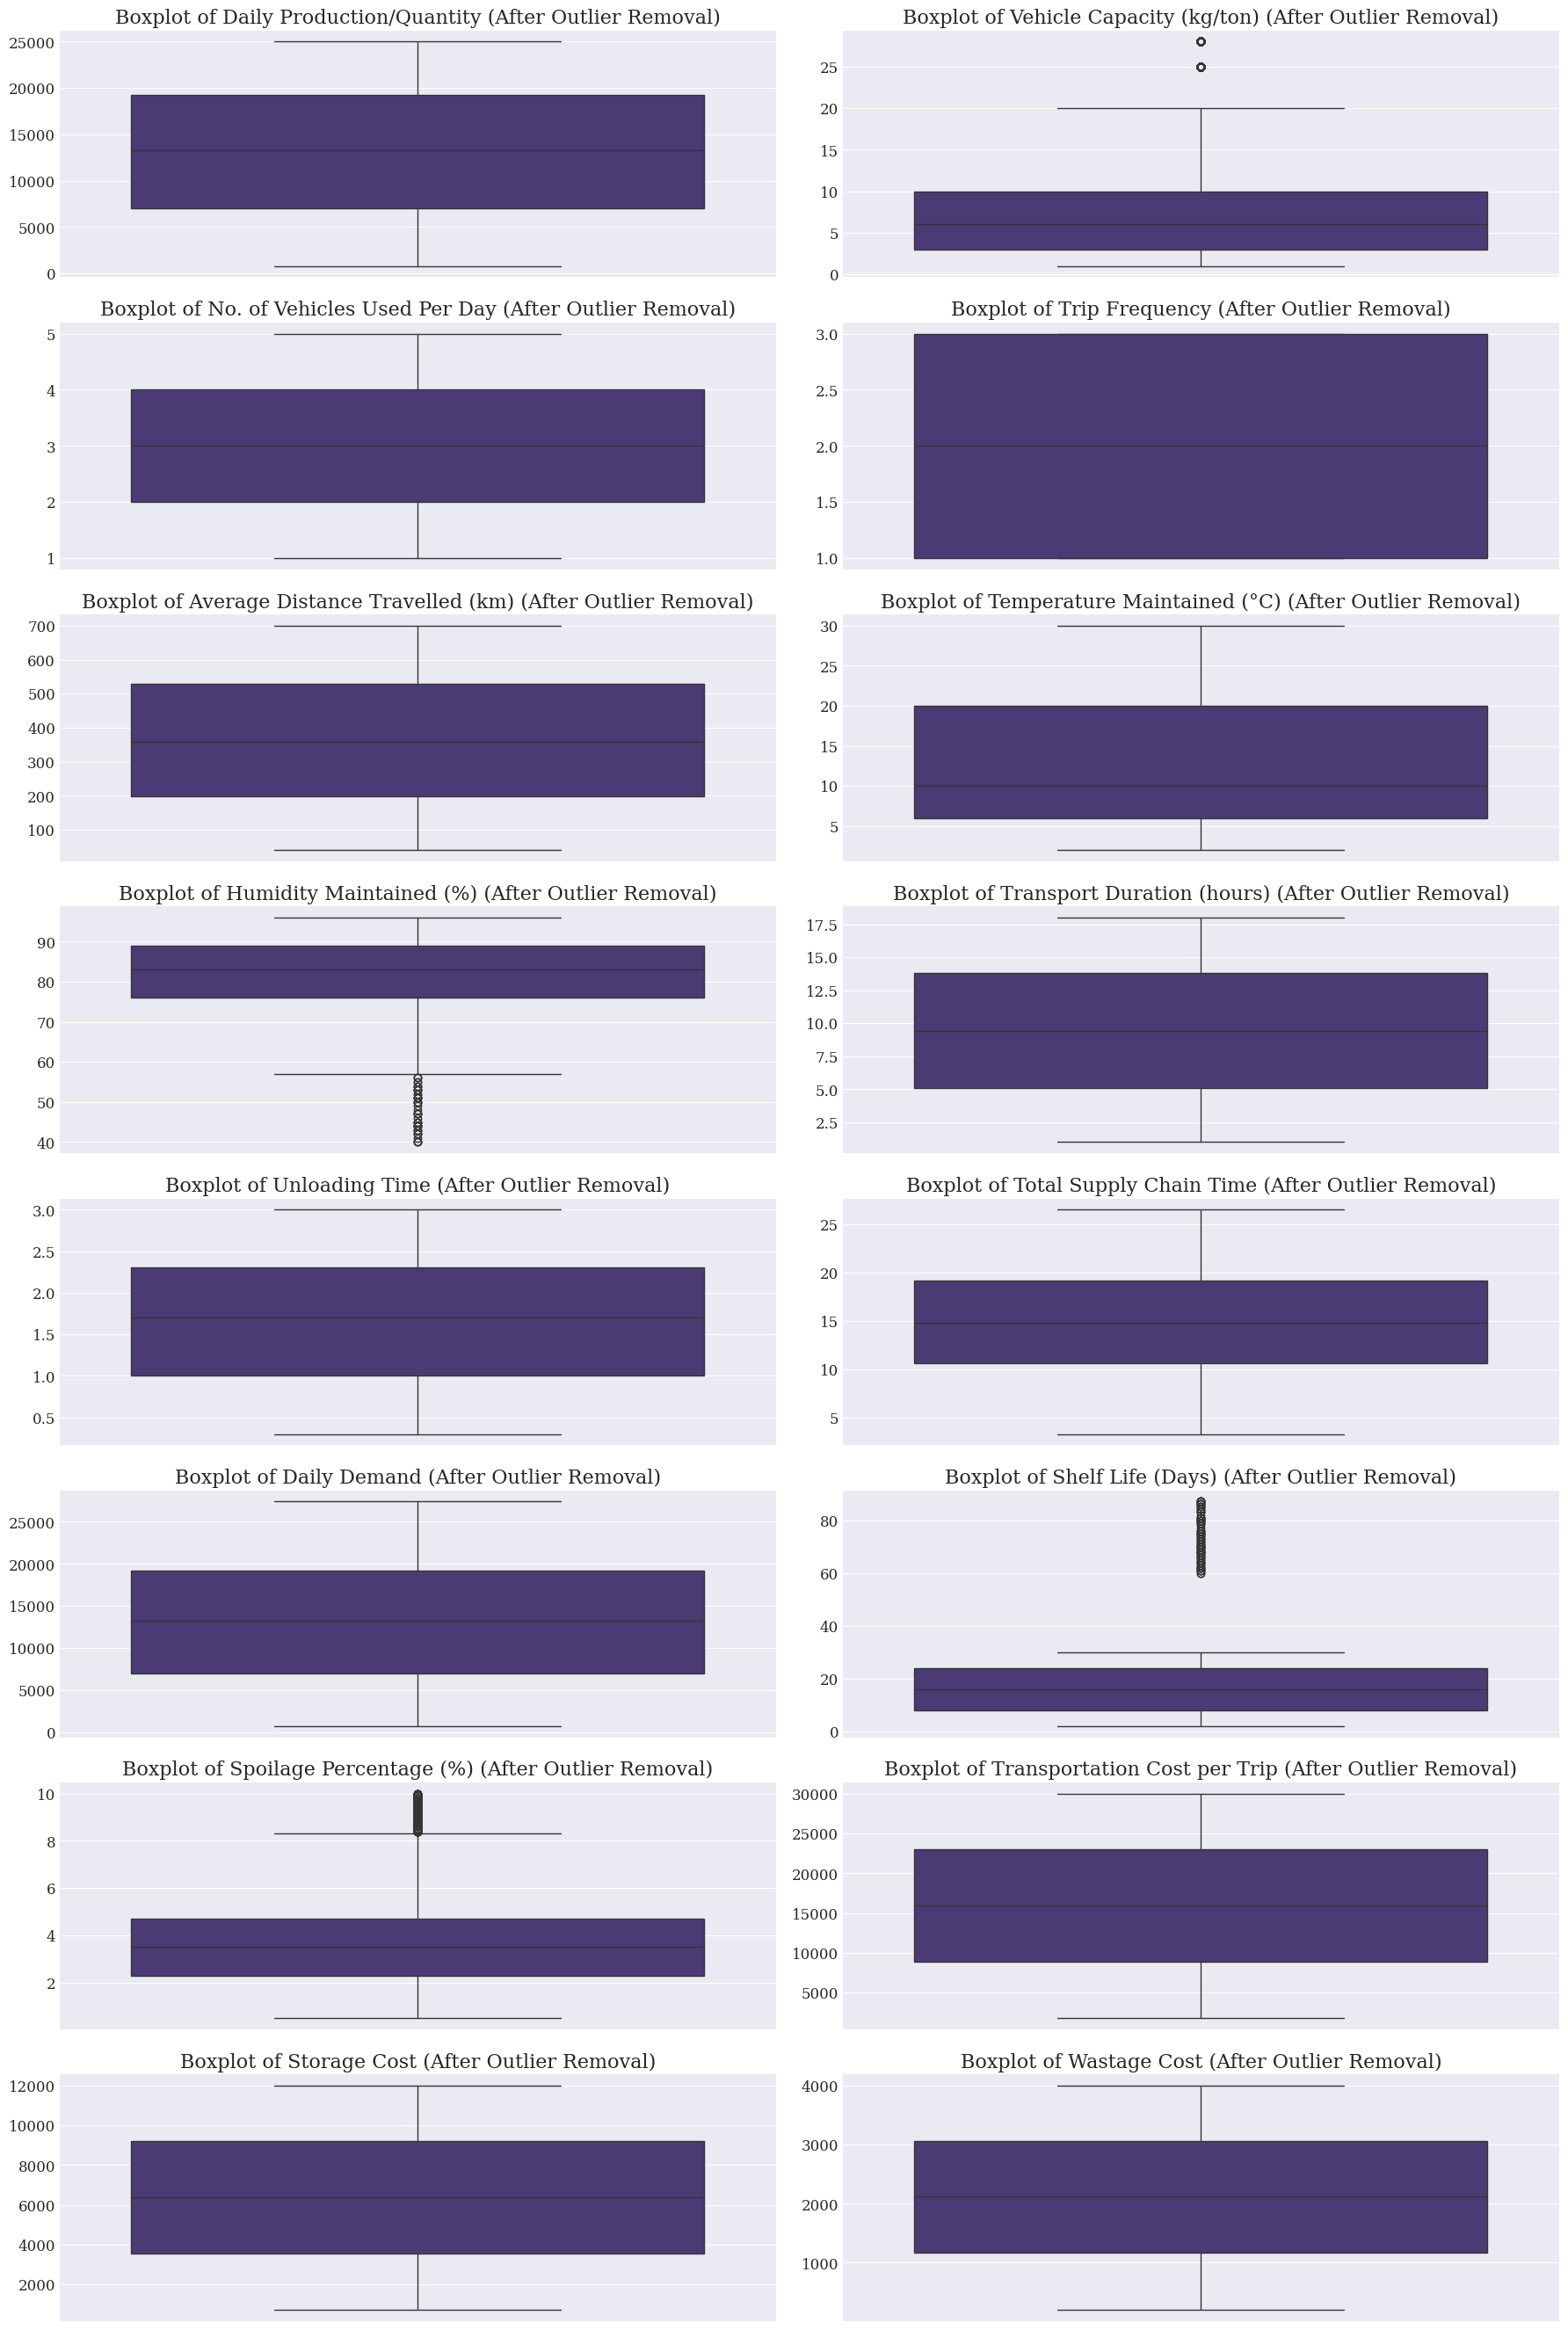

Interpretation of Numeric Variable Box-whisker Plots (Post Outlier Removal):
- These box-whisker plots show the distribution of numeric variables after extreme outliers have been removed.
- The central box represents the interquartile range (IQR), with the line inside indicating the median.
- The whiskers extend to 1.5 times the IQR from the quartiles, capturing the majority of the data. Points beyond the whiskers are mild outliers, which were retained in our conservative 3*IQR removal approach.
- We can observe the spread, symmetry (or skewness), and central tendency of each variable more clearly.
- Variables like 'Daily Production/Quantity', 'Daily Demand', and cost features might still show some skewness (even after log transformation and outlier removal), but extreme values are significantly curtailed, making the distributions more amenable to distance-based algorithms.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# No need to import StandardScaler as it's not directly used in this plotting cell

# Set font family for plots to address matplotlib warnings (if any)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif'] + plt.rcParams['font.serif']

# Assuming sp_102_df_outliers_removed is already defined from previous cells.
# No need to re-run all the preprocessing steps.

# Define the non-categorical (numeric) columns (using sp_102_df_outliers_removed)
numeric_cols_for_boxplot = [
    'Daily Production/Quantity', 'Vehicle Capacity (kg/ton)',
    'No. of Vehicles Used Per Day', 'Trip Frequency',
    'Average Distance Travelled (km)', 'Temperature Maintained (°C)',
    'Humidity Maintained (%)', 'Transport Duration (hours)', 'Unloading Time',
    'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)',
    'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost'
]

# Filter to only columns present in the DataFrame
numeric_cols_for_boxplot = [col for col in numeric_cols_for_boxplot if col in sp_102_df_outliers_removed.columns]

plt.figure(figsize=(18, 30)) # Increased figure size for better visibility
for i, col in enumerate(numeric_cols_for_boxplot):
    plt.subplot(len(numeric_cols_for_boxplot) // 2 + 1, 2, i + 1)
    sns.boxplot(y=sp_102_df_outliers_removed[col]) # Removed palette='viridis' as it's globally set and not needed here without hue
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

print("Interpretation of Numeric Variable Box-whisker Plots (Post Outlier Removal):")
print("- These box-whisker plots show the distribution of numeric variables after extreme outliers have been removed.")
print("- The central box represents the interquartile range (IQR), with the line inside indicating the median.")
print("- The whiskers extend to 1.5 times the IQR from the quartiles, capturing the majority of the data. Points beyond the whiskers are mild outliers, which were retained in our conservative 3*IQR removal approach.")
print("- We can observe the spread, symmetry (or skewness), and central tendency of each variable more clearly.")
print("- Variables like 'Daily Production/Quantity', 'Daily Demand', and cost features might still show some skewness (even after log transformation and outlier removal), but extreme values are significantly curtailed, making the distributions more amenable to distance-based algorithms.")

Generating Pairplot for selected scaled numeric variables...


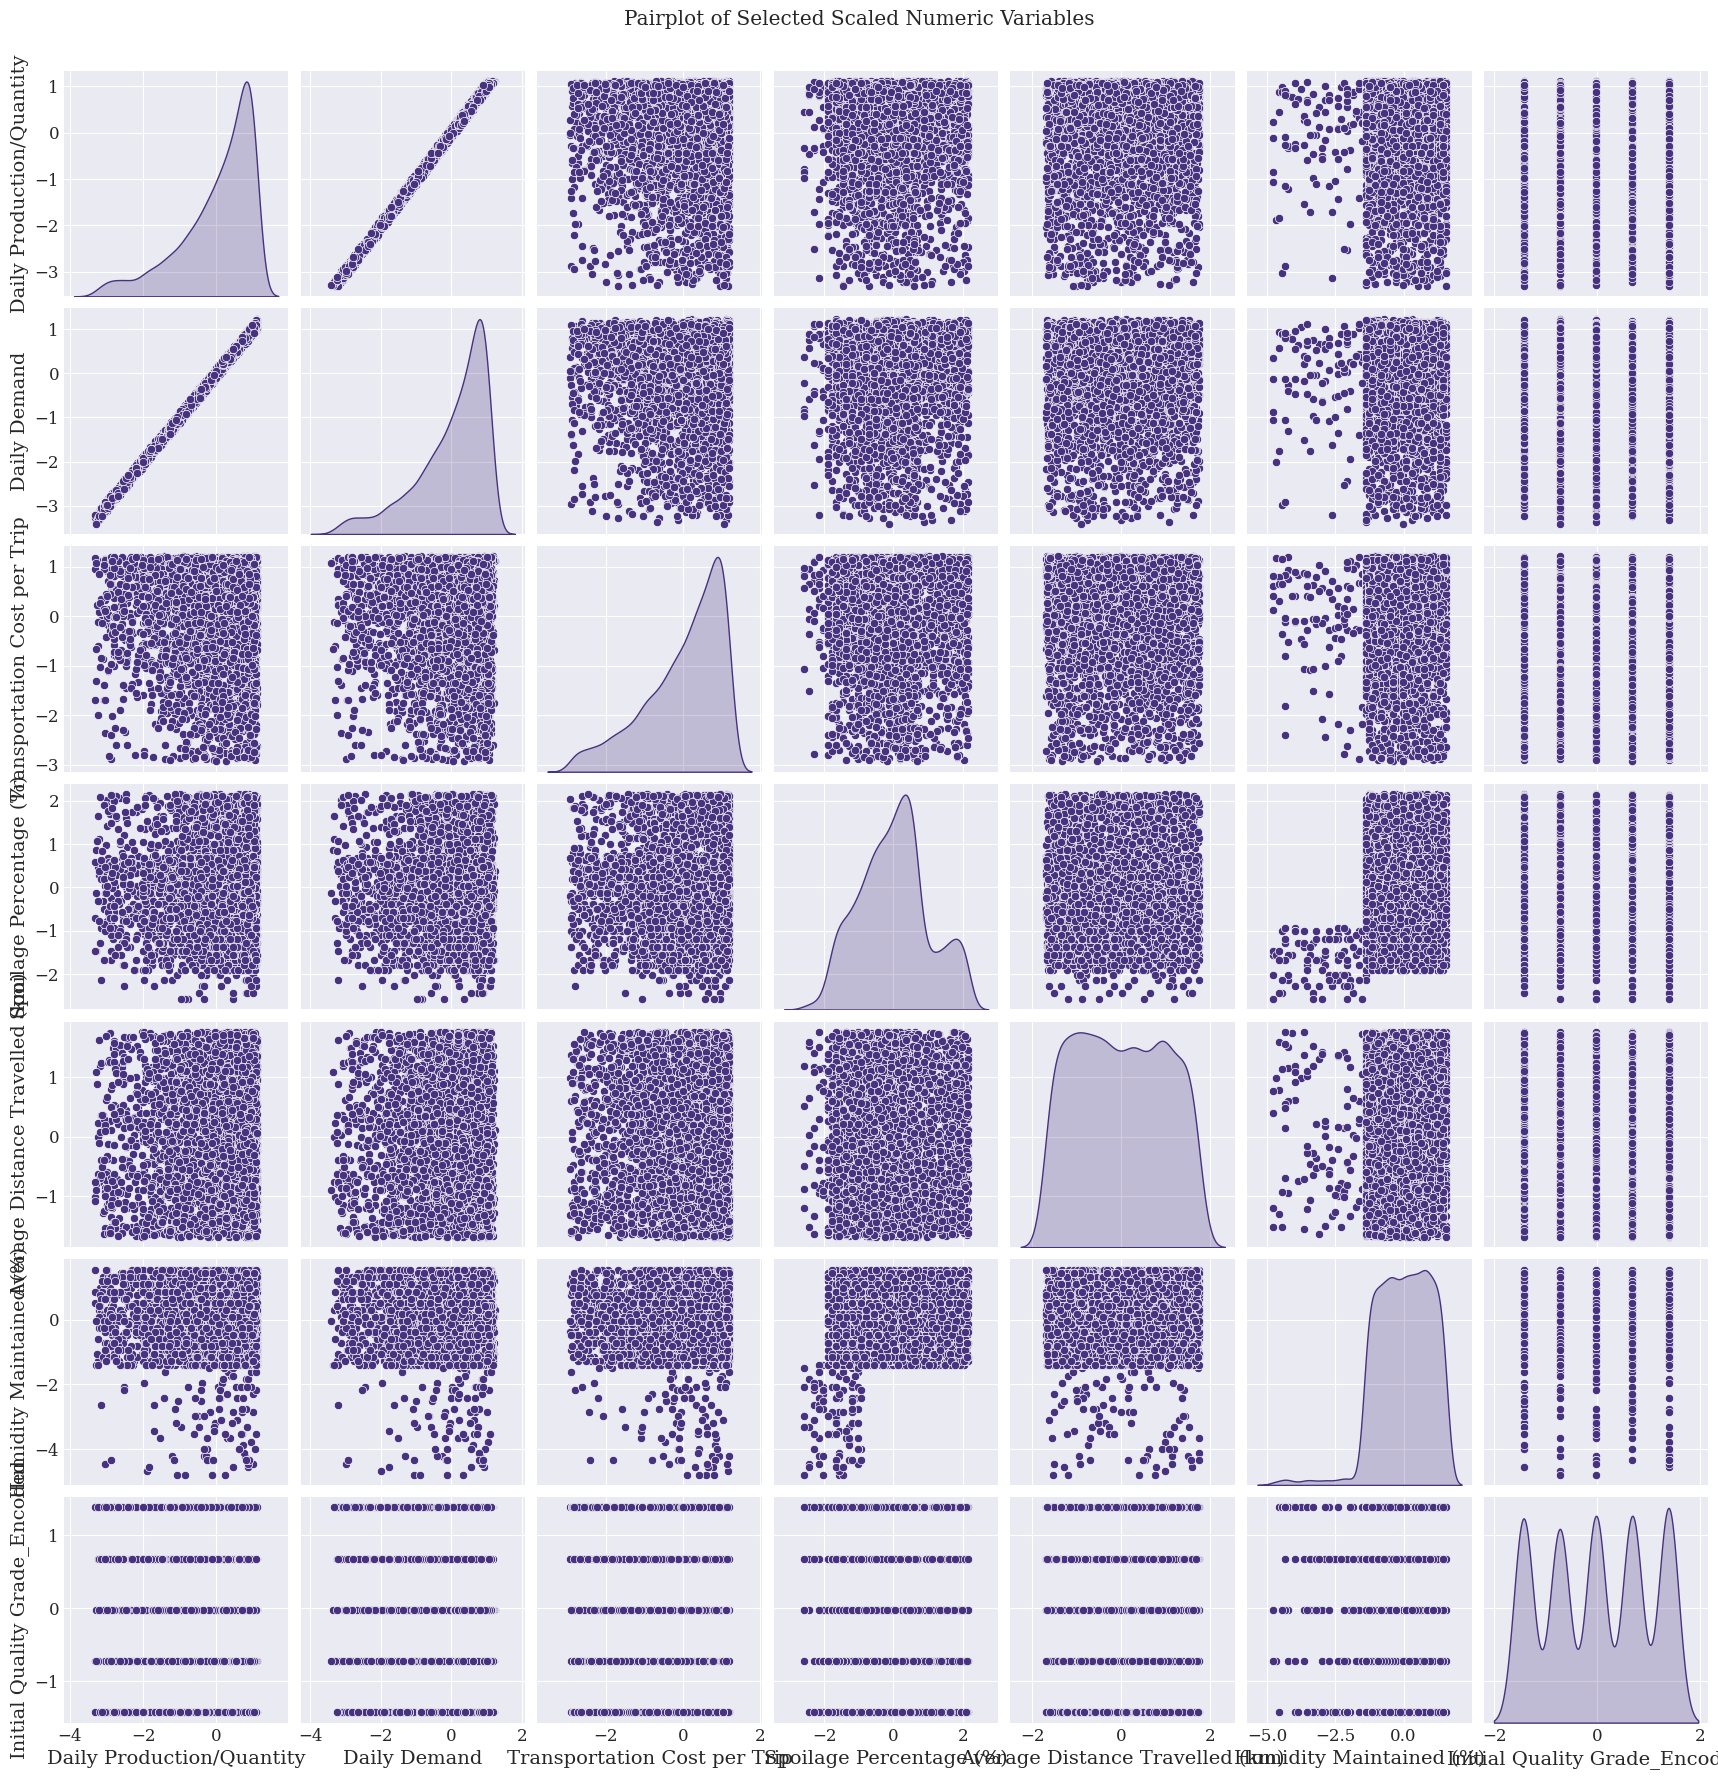

Interpretation of Pairplot:
- The pairplot provides a matrix of scatter plots for each pair of selected numeric variables, and kernel density estimates (KDE) for the distribution of each variable on the diagonal.
- It helps in visually identifying relationships (linear or non-linear, positive or negative correlations) between pairs of features.
- The diagonal plots show the univariate distribution of each variable, giving insight into its shape (e.g., normal, skewed).
- For clustering, patterns observed in these pairwise relationships can hint at natural groupings in the data. For example, a clear separation or distinct concentrations of data points in a scatter plot may suggest different cluster characteristics.


In [21]:
# For Pairplot, select a smaller, representative subset of important numeric variables from the scaled dataset
# The full scaled dataset has many columns due to one-hot encoding, making a full pairplot impractical.

pairplot_cols = [
    'Daily Production/Quantity', 'Daily Demand',
    'Transportation Cost per Trip', 'Spoilage Percentage (%)',
    'Average Distance Travelled (km)', 'Humidity Maintained (%)',
    'Initial Quality Grade_Encoded'
]

# Filter to only columns present in the scaled DataFrame
pairplot_cols = [col for col in pairplot_cols if col in sp_102_df_standard_scaled.columns]

if len(pairplot_cols) > 1:
    print("Generating Pairplot for selected scaled numeric variables...")
    sns.pairplot(sp_102_df_standard_scaled[pairplot_cols], diag_kind='kde')
    plt.suptitle('Pairplot of Selected Scaled Numeric Variables', y=1.02) # Adjust suptitle position
    plt.show()
else:
    print("Not enough numeric columns for an effective pairplot.")

print("Interpretation of Pairplot:")
print("- The pairplot provides a matrix of scatter plots for each pair of selected numeric variables, and kernel density estimates (KDE) for the distribution of each variable on the diagonal.")
print("- It helps in visually identifying relationships (linear or non-linear, positive or negative correlations) between pairs of features.")
print("- The diagonal plots show the univariate distribution of each variable, giving insight into its shape (e.g., normal, skewed).")
print("- For clustering, patterns observed in these pairwise relationships can hint at natural groupings in the data. For example, a clear separation or distinct concentrations of data points in a scatter plot may suggest different cluster characteristics.")

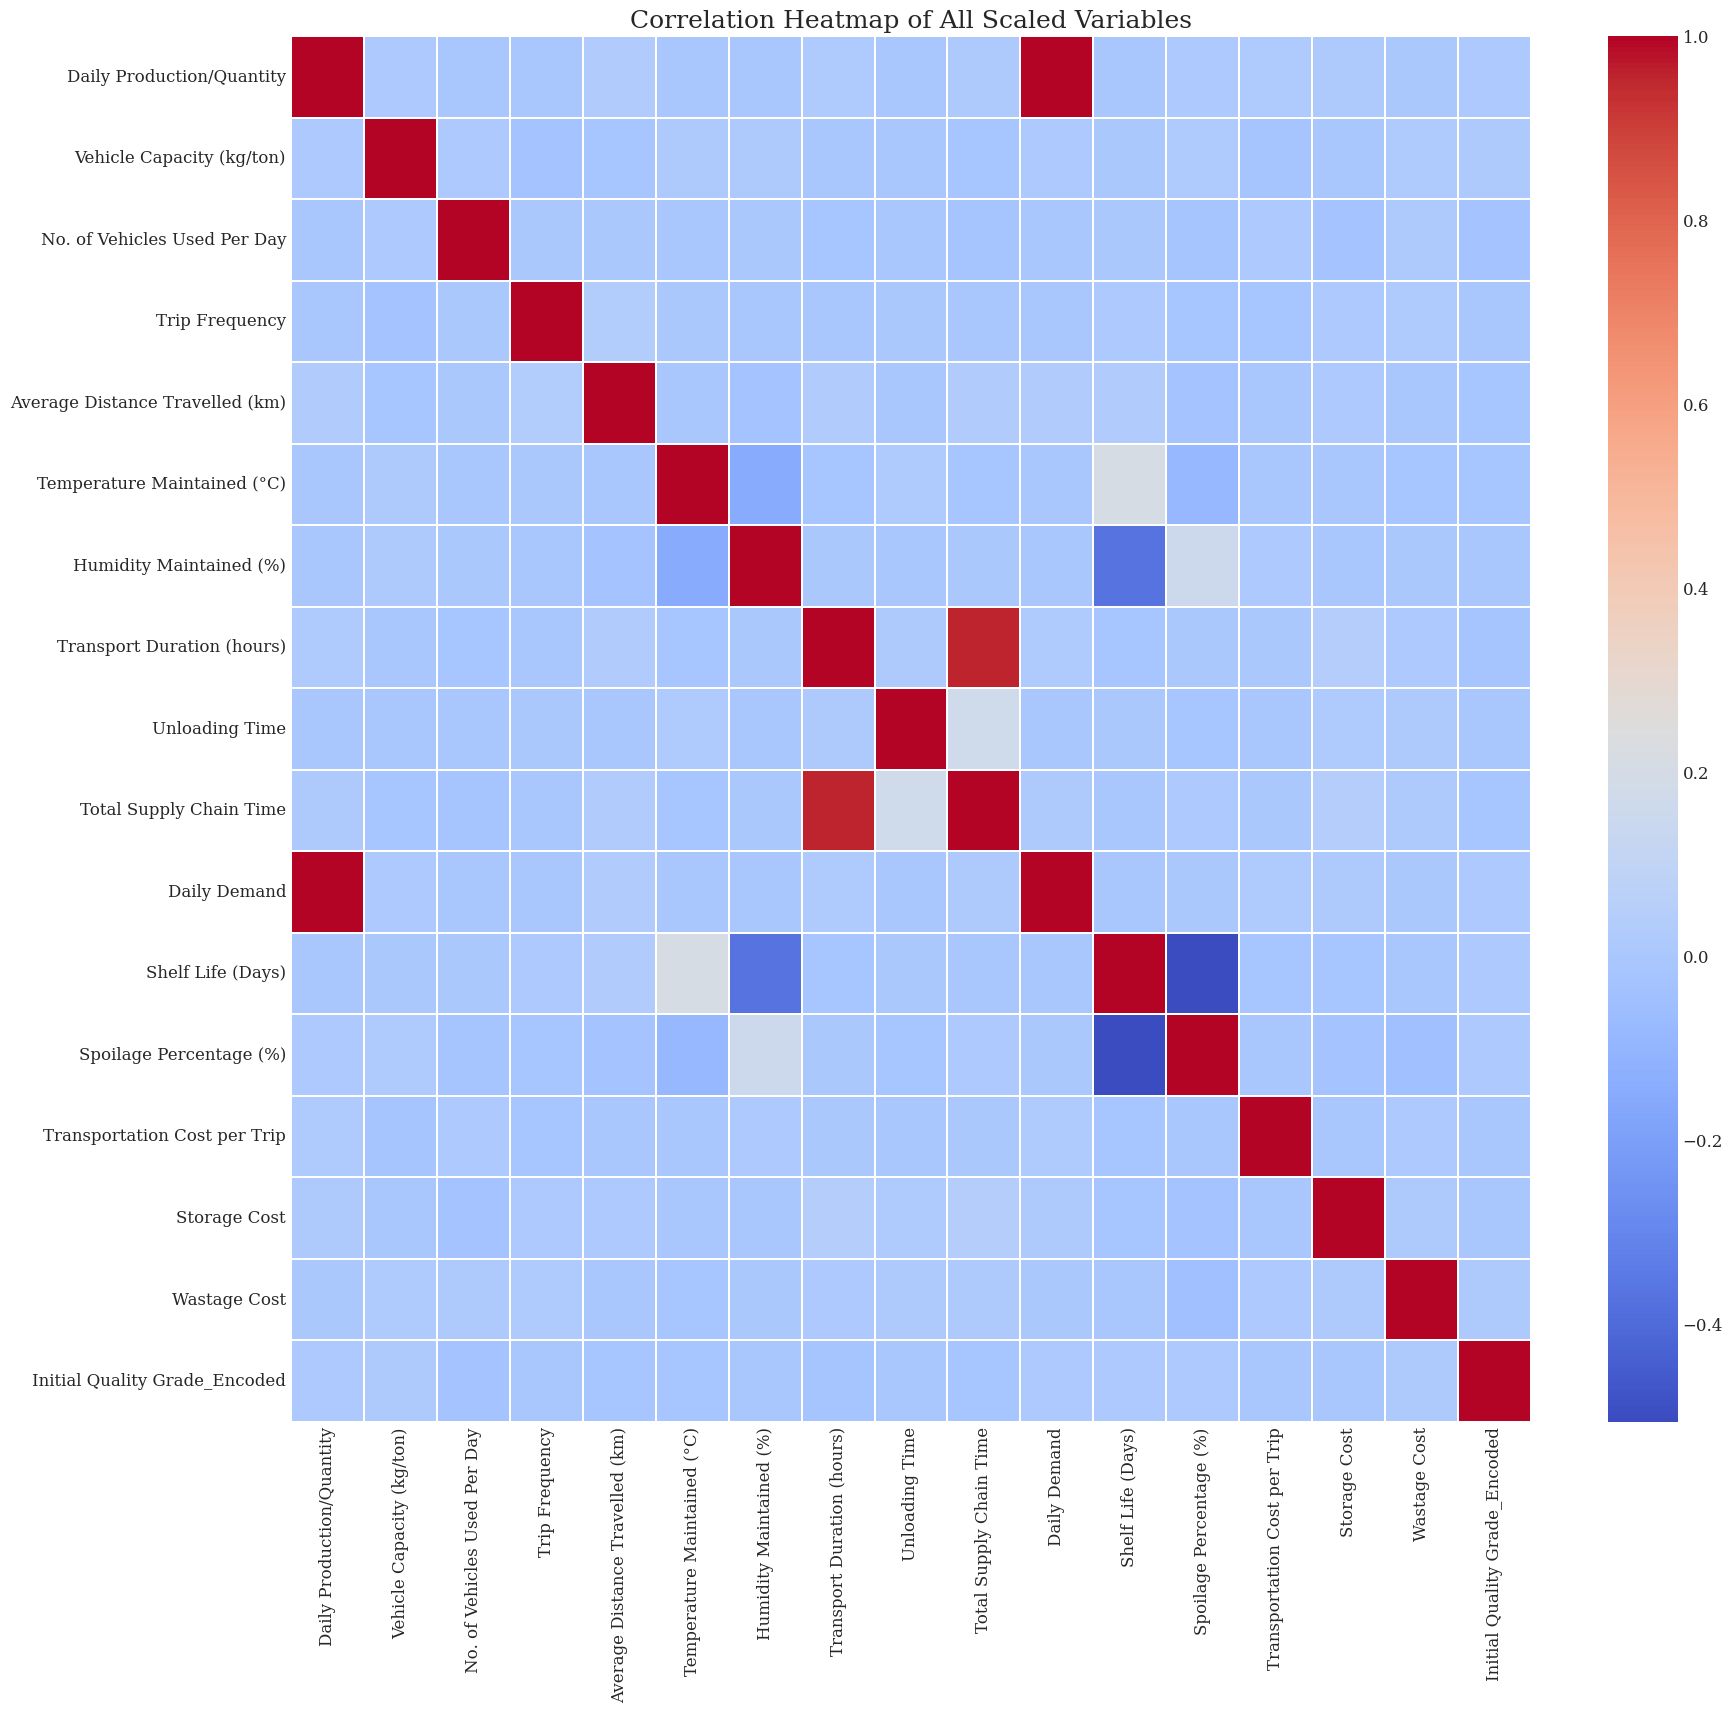

Interpretation of Correlation Heatmap:
- The heatmap visually represents the pairwise correlation coefficients between all scaled numeric variables.
- Red colors indicate positive correlation, while blue colors indicate negative correlation. The intensity of the color indicates the strength of the correlation.
- High positive or negative correlations (values close to 1 or -1) suggest that two variables tend to move together or in opposite directions.
- For K-Means clustering, highly correlated features can sometimes redundant information. While not strictly problematic, understanding these correlations can aid in feature selection or interpretation of clusters.
- Conversely, features with low correlation to others are likely providing unique information, which can be valuable for differentiation in clustering.


In [22]:
# Generate a correlation heatmap for all numeric variables (from the standard scaled data)
# This includes the original numeric columns and the encoded ordinal column.

plt.figure(figsize=(20, 18))
sns.heatmap(sp_102_df_standard_scaled.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Heatmap of All Scaled Variables', fontsize=18)
plt.show()

print("Interpretation of Correlation Heatmap:")
print("- The heatmap visually represents the pairwise correlation coefficients between all scaled numeric variables.")
print("- Red colors indicate positive correlation, while blue colors indicate negative correlation. The intensity of the color indicates the strength of the correlation.")
print("- High positive or negative correlations (values close to 1 or -1) suggest that two variables tend to move together or in opposite directions.")
print("- For K-Means clustering, highly correlated features can sometimes redundant information. While not strictly problematic, understanding these correlations can aid in feature selection or interpretation of clusters.")
print("- Conversely, features with low correlation to others are likely providing unique information, which can be valuable for differentiation in clustering.")

#Define Daily Demand as Target Variable




## Convert Daily Demand into Classes



In [23]:
print("### Converting 'Daily Demand' into Classes ###")

# 1. Access the 'Daily Demand' column from the `sp_102_df_standard_scaled` DataFrame.
# The column name in sp_102_df_standard_scaled is 'Daily Demand' as per previous cells.

# 2. Calculate the 33rd and 67th percentiles of 'Daily Demand'
percentile_33 = sp_102_df_standard_scaled['Daily Demand'].quantile(0.33)
percentile_67 = sp_102_df_standard_scaled['Daily Demand'].quantile(0.67)

print(f"33rd percentile for 'Daily Demand': {percentile_33:.2f}")
print(f"67th percentile for 'Daily Demand': {percentile_67:.2f}")

# 3. Create a new column 'Daily_Demand_Class' and assign categories
def assign_demand_class(demand_value):
    if demand_value <= percentile_33:
        return 'Low'
    elif demand_value <= percentile_67:
        return 'Medium'
    else:
        return 'High'

sp_102_df_standard_scaled['Daily_Demand_Class'] = sp_102_df_standard_scaled['Daily Demand'].apply(assign_demand_class)

print("\n'Daily_Demand_Class' column created successfully.")

# 4. Display the value counts of the newly created 'Daily_Demand_Class' column
print("\nDistribution of 'Daily_Demand_Class':")
display(sp_102_df_standard_scaled['Daily_Demand_Class'].value_counts())

print("\nFirst 5 rows of the DataFrame with the new 'Daily_Demand_Class' column:")
display(sp_102_df_standard_scaled[['Daily Demand', 'Daily_Demand_Class']].head())

### Converting 'Daily Demand' into Classes ###
33rd percentile for 'Daily Demand': -0.19
67th percentile for 'Daily Demand': 0.65

'Daily_Demand_Class' column created successfully.

Distribution of 'Daily_Demand_Class':


Daily_Demand_Class
Medium    1332
Low       1293
High      1292
Name: count, dtype: int64


First 5 rows of the DataFrame with the new 'Daily_Demand_Class' column:


Daily Demand Daily_Demand_Class
76054      1.012398               High
65803     -2.802400                Low
37234      0.005173             Medium
4906       0.515935             Medium
2019       0.734007               High

In [24]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = sp_102_df_standard_scaled.drop(columns=['Daily_Demand_Class'])
y = sp_102_df_standard_scaled['Daily_Demand_Class']

# Split the data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"Original target distribution:\n{y.value_counts(normalize=True)}\n")
print(f"Training set target distribution:\n{y_train.value_counts(normalize=True)}\n")
print(f"Testing set target distribution:\n{y_test.value_counts(normalize=True)}\n")

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Original target distribution:
Daily_Demand_Class
Medium    0.340056
Low       0.330100
High      0.329844
Name: proportion, dtype: float64

Training set target distribution:
Daily_Demand_Class
Medium    0.339930
High      0.330035
Low       0.330035
Name: proportion, dtype: float64

Testing set target distribution:
Daily_Demand_Class
Medium    0.340561
Low       0.330357
High      0.329082
Name: proportion, dtype: float64

X_train shape: (3133, 17)
X_test shape: (784, 17)
y_train shape: (3133,)
y_test shape: (784,)


## Train Logistic Regression Model




In [25]:
from sklearn.linear_model import LogisticRegression

print("### Initializing and Training Logistic Regression Model ###")

# 1. Instantiate a Logistic Regression model
# Set random_state for reproducibility, solver for multiclass, and multi_class for explicit multiclass setup.
logistic_model = LogisticRegression(
    random_state=RANDOM_STATE,
    solver='saga', # 'saga' is suitable for multiclass and handles L2 regularization by default
    multi_class='multinomial',
    max_iter=1000 # Increase max_iter for convergence if needed
)

print(f"Logistic Regression model instantiated with solver='saga', multi_class='multinomial', random_state={RANDOM_STATE}.")

# 2. Train the model using the .fit() method
logistic_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully using X_train and y_train.")


### Initializing and Training Logistic Regression Model ###
Logistic Regression model instantiated with solver='saga', multi_class='multinomial', random_state=102.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression model trained successfully using X_train and y_train.


In [26]:
from sklearn.linear_model import LogisticRegression

print("### Initializing and Training Logistic Regression Model ###")

# 1. Instantiate a Logistic Regression model
# Set random_state for reproducibility, solver for multiclass.
logistic_model = LogisticRegression(
    random_state=RANDOM_STATE,
    solver='saga', # 'saga' is suitable for multiclass and handles L2 regularization by default
    max_iter=1000 # Increase max_iter for convergence if needed
)

print(f"Logistic Regression model instantiated with solver='saga', random_state={RANDOM_STATE}.")

# 2. Train the model using the .fit() method
logistic_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully using X_train and y_train.")

### Initializing and Training Logistic Regression Model ###
Logistic Regression model instantiated with solver='saga', random_state=102.
Logistic Regression model trained successfully using X_train and y_train.


In [27]:
print("### Making Predictions on the Test Set ###")

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Get probability estimates for ROC curve
y_pred_proba = logistic_model.predict_proba(X_test)

print("Predictions (y_pred) and probability estimates (y_pred_proba) generated for the test set.")
print("First 5 predictions:", y_pred[:5])
print("Shape of y_pred_proba:", y_pred_proba.shape)

### Making Predictions on the Test Set ###
Predictions (y_pred) and probability estimates (y_pred_proba) generated for the test set.
First 5 predictions: ['Medium' 'Low' 'Medium' 'High' 'High']
Shape of y_pred_proba: (784, 3)


### Evaluating Logistic Regression Model Performance: Confusion Matrix ###


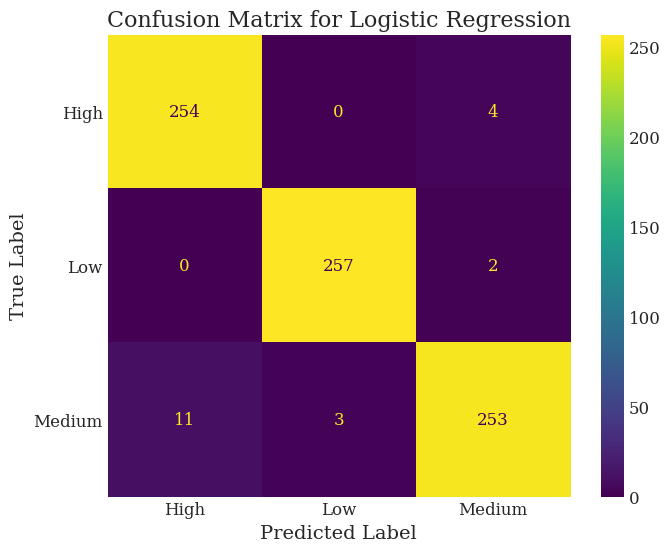

Confusion matrix displayed. Each cell [i, j] shows the number of observations known to be in class i and predicted to be in class j.


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("### Evaluating Logistic Regression Model Performance: Confusion Matrix ###")

# Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
cmd_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
cmd_display.plot(cmap='viridis', ax=plt.gca(), values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False) # Remove grid for cleaner heatmap
plt.show()

print("Confusion matrix displayed. Each cell [i, j] shows the number of observations known to be in class i and predicted to be in class j.")

In [29]:
from sklearn.metrics import classification_report

print("\n### Evaluating Logistic Regression Model Performance: Classification Report ###")

# Calculate and print the classification report
report = classification_report(y_test, y_pred, target_names=logistic_model.classes_)
print(report)

print("Classification report displayed, showing precision, recall, f1-score, and support for each class, along with overall accuracy.")


### Evaluating Logistic Regression Model Performance: Classification Report ###
              precision    recall  f1-score   support

        High       0.96      0.98      0.97       258
         Low       0.99      0.99      0.99       259
      Medium       0.98      0.95      0.96       267

    accuracy                           0.97       784
   macro avg       0.97      0.97      0.97       784
weighted avg       0.97      0.97      0.97       784

Classification report displayed, showing precision, recall, f1-score, and support for each class, along with overall accuracy.



### Evaluating Logistic Regression Model Performance: ROC Curve and AUC ###


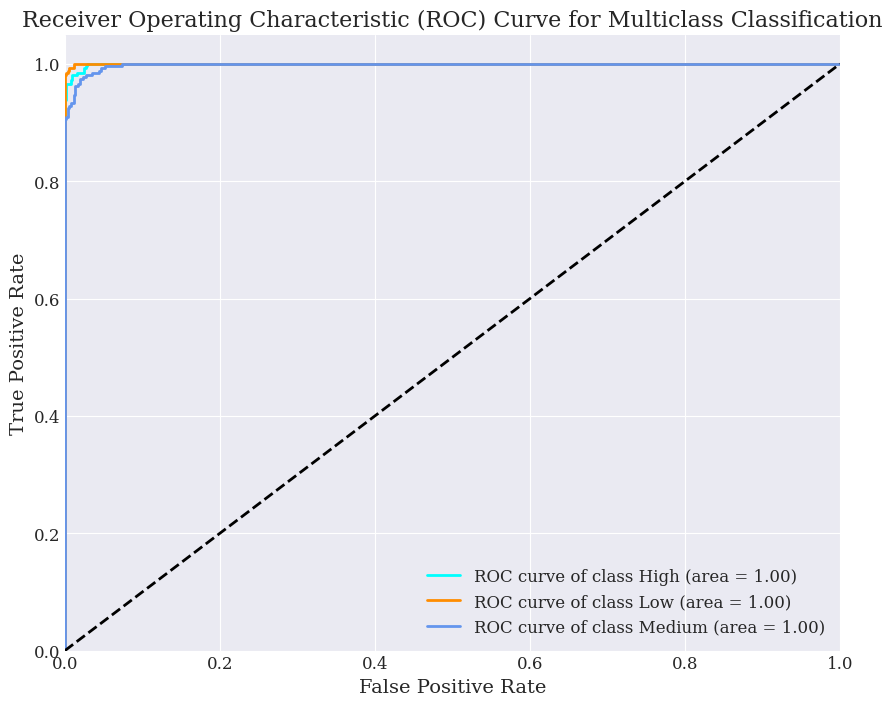

ROC curves and AUC scores for each class displayed. A higher AUC indicates better model performance in distinguishing between classes.


In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

print("\n### Evaluating Logistic Regression Model Performance: ROC Curve and AUC ###")

# Binarize the output for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=logistic_model.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue'] # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(logistic_model.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("ROC curves and AUC scores for each class displayed. A higher AUC indicates better model performance in distinguishing between classes.")

In [31]:
print("\n### Interpreting Logistic Regression Model Coefficients ###")

# Get feature names from X_train
feature_names = X_train.columns

# Get class names from the model
class_names = logistic_model.classes_

print(f"Model has {len(feature_names)} features and {len(class_names)} classes.")

# Coefficients are stored in logistic_model.coef_ (shape: n_classes, n_features)
# Intercepts are stored in logistic_model.intercept_ (shape: n_classes,)

# Create a DataFrame to store coefficients for better readability
coefficients_df = pd.DataFrame(
    logistic_model.coef_.T, # Transpose to have features as rows
    columns=[f'Coefficient_for_{cls}' for cls in class_names],
    index=feature_names
)

# Add intercepts to the DataFrame
intercepts_df = pd.DataFrame(
    logistic_model.intercept_,
    index=[f'Intercept_for_{cls}' for cls in class_names],
    columns=['Value']
)

print("\nCoefficients per class:")
display(coefficients_df.round(3))

print("\nIntercepts per class:")
display(intercepts_df.round(3))

print("\nInterpretation: Positive coefficients indicate that an increase in the feature's value increases the likelihood of belonging to that class, relative to the reference class. Negative coefficients indicate the opposite.")
print("Note: Since 'saga' solver with 'multinomial' multi_class is used, all classes are modeled simultaneously, and coefficients are relative to each other, not a specific 'reference' class like in one-vs-rest.")



### Interpreting Logistic Regression Model Coefficients ###
Model has 17 features and 3 classes.

Coefficients per class:


Coefficient_for_High  Coefficient_for_Low  \
Daily Production/Quantity                       6.406               -6.175   
Vehicle Capacity (kg/ton)                      -0.088                0.053   
No. of Vehicles Used Per Day                   -0.010                0.043   
Trip Frequency                                 -0.039                0.032   
Average Distance Travelled (km)                -0.034                0.066   
Temperature Maintained (°C)                    -0.123                0.120   
Humidity Maintained (%)                         0.002                0.028   
Transport Duration (hours)                      0.232               -0.275   
Unloading Time                                  0.077               -0.147   
Total Supply Chain Time                        -0.215                0.276   
Daily Demand                                   10.015               -8.735   
Shelf Life (Days)                               0.086               -0.092   
Spoilage Percentage (%)                        -0.007               -0.011   
Transportation Cost per Trip                    0.014               -0.048   
Storage Cost                                    0.035                0.004   
Wastage Cost                                    0.004                0.018   
Initial Quality Grade_Encoded                   0.027               -0.009   

                                 Coefficient_for_Medium  
Daily Production/Quantity                        -0.232  
Vehicle Capacity (kg/ton)                         0.035  
No. of Vehicles Used Per Day                     -0.033  
Trip Frequency                                    0.007  
Average Distance Travelled (km)                  -0.033  
Temperature Maintained (°C)                       0.003  
Humidity Maintained (%)                          -0.030  
Transport Duration (hours)                        0.043  
Unloading Time                                    0.069  
Total Supply Chain Time                          -0.060  
Daily Demand                                     -1.280  
Shelf Life (Days)                                 0.006  
Spoilage Percentage (%)                           0.018  
Transportation Cost per Trip                      0.034  
Storage Cost                                     -0.039  
Wastage Cost                                     -0.022  
Initial Quality Grade_Encoded                    -0.019


Intercepts per class:


Value
Intercept_for_High   -6.849
Intercept_for_Low     2.080
Intercept_for_Medium  4.770


Interpretation: Positive coefficients indicate that an increase in the feature's value increases the likelihood of belonging to that class, relative to the reference class. Negative coefficients indicate the opposite.
Note: Since 'saga' solver with 'multinomial' multi_class is used, all classes are modeled simultaneously, and coefficients are relative to each other, not a specific 'reference' class like in one-vs-rest.



## Train SVM with Linear Kernel


In [32]:
from sklearn.svm import SVC

print("### Initializing and Training Support Vector Machine (SVM) Model ###")

# 1. Instantiate an SVC model with a linear kernel
# Set random_state for reproducibility and probability=True for ROC-AUC plotting.
svm_model = SVC(
    kernel='linear',
    random_state=RANDOM_STATE,
    probability=True # Required for predict_proba which is used in ROC-AUC plotting
)

print(f"SVM model instantiated with kernel='linear', random_state={RANDOM_STATE}, and probability=True.")

# 2. Train the model using the .fit() method
svm_model.fit(X_train, y_train)

print("SVM model trained successfully using X_train and y_train.")

### Initializing and Training Support Vector Machine (SVM) Model ###
SVM model instantiated with kernel='linear', random_state=102, and probability=True.
SVM model trained successfully using X_train and y_train.


## Evaluate Linear SVM Performance





In [33]:
print("### Making Predictions on the Test Set using SVM Model ###")

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Get probability estimates for ROC curve
y_pred_proba_svm = svm_model.predict_proba(X_test)

print("Predictions (y_pred_svm) and probability estimates (y_pred_proba_svm) generated for the test set.")
print("First 5 predictions:", y_pred_svm[:5])
print("Shape of y_pred_proba_svm:", y_pred_proba_svm.shape)

### Making Predictions on the Test Set using SVM Model ###
Predictions (y_pred_svm) and probability estimates (y_pred_proba_svm) generated for the test set.
First 5 predictions: ['Medium' 'Low' 'Medium' 'High' 'High']
Shape of y_pred_proba_svm: (784, 3)


### Evaluating Linear SVM Model Performance: Confusion Matrix ###


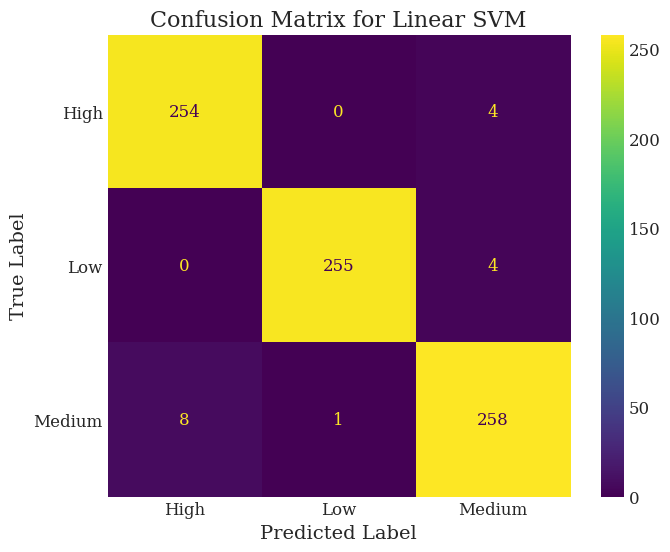

Confusion matrix for Linear SVM displayed. Each cell [i, j] shows the number of observations known to be in class i and predicted to be in class j.


In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("### Evaluating Linear SVM Model Performance: Confusion Matrix ###")

# Calculate the Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display the Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
cmd_display_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
cmd_display_svm.plot(cmap='viridis', ax=plt.gca(), values_format='d')
plt.title('Confusion Matrix for Linear SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False) # Remove grid for cleaner heatmap
plt.show()

print("Confusion matrix for Linear SVM displayed. Each cell [i, j] shows the number of observations known to be in class i and predicted to be in class j.")

In [35]:
from sklearn.metrics import classification_report

print("\n### Evaluating Linear SVM Model Performance: Classification Report ###")

# Calculate and print the classification report
report_svm = classification_report(y_test, y_pred_svm, target_names=svm_model.classes_)
print(report_svm)

print("Classification report for Linear SVM displayed, showing precision, recall, f1-score, and support for each class, along with overall accuracy.")


### Evaluating Linear SVM Model Performance: Classification Report ###
              precision    recall  f1-score   support

        High       0.97      0.98      0.98       258
         Low       1.00      0.98      0.99       259
      Medium       0.97      0.97      0.97       267

    accuracy                           0.98       784
   macro avg       0.98      0.98      0.98       784
weighted avg       0.98      0.98      0.98       784

Classification report for Linear SVM displayed, showing precision, recall, f1-score, and support for each class, along with overall accuracy.



### Evaluating Linear SVM Model Performance: ROC Curve and AUC ###


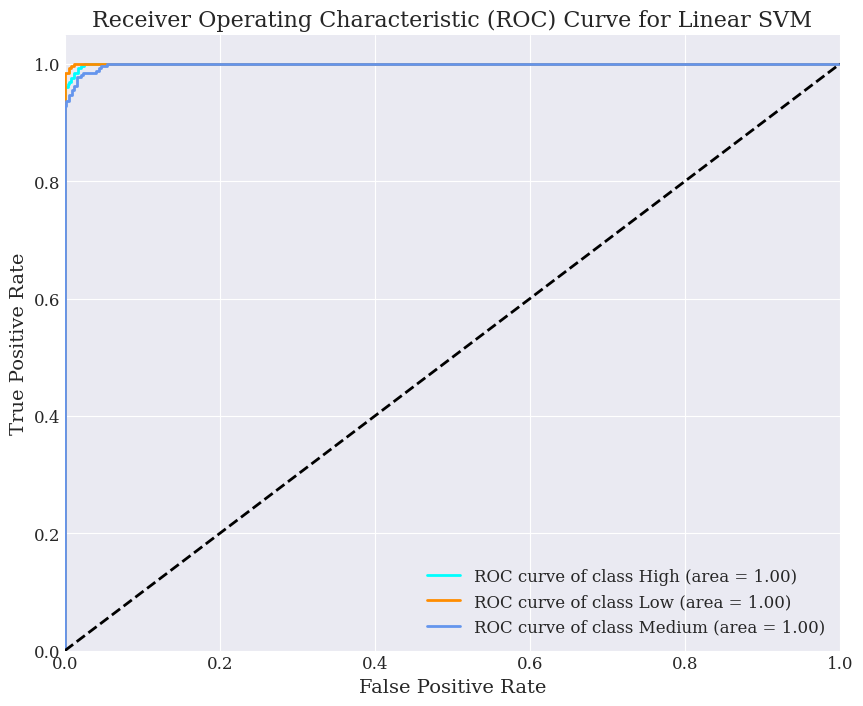

ROC curves and AUC scores for each class displayed for Linear SVM. A higher AUC indicates better model performance in distinguishing between classes.


In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

print("\n### Evaluating Linear SVM Model Performance: ROC Curve and AUC ###")

# Binarize the output for multi-class ROC curve
y_test_binarized_svm = label_binarize(y_test, classes=svm_model.classes_)
n_classes_svm = y_test_binarized_svm.shape[1]

# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes_svm):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_binarized_svm[:, i], y_pred_proba_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue'] # Define colors for each class
for i, color in zip(range(n_classes_svm), colors):
    plt.plot(fpr_svm[i], tpr_svm[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(svm_model.classes_[i], roc_auc_svm[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Linear SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("ROC curves and AUC scores for each class displayed for Linear SVM. A higher AUC indicates better model performance in distinguishing between classes.")


## Train SVM with RBF Kernel




In [37]:
from sklearn.svm import SVC

print("### Initializing and Training Support Vector Machine (SVM) Model with RBF Kernel ###")

# 1. Instantiate an SVC model with an RBF kernel
# Set random_state for reproducibility and probability=True for ROC-AUC plotting.
svm_rbf_model = SVC(
    kernel='rbf',
    random_state=RANDOM_STATE,
    probability=True # Required for predict_proba which is used in ROC-AUC plotting
)

print(f"SVM model instantiated with kernel='rbf', random_state={RANDOM_STATE}, and probability=True.")

# 2. Train the model using the .fit() method
svm_rbf_model.fit(X_train, y_train)

print("SVM model with RBF kernel trained successfully using X_train and y_train.")

### Initializing and Training Support Vector Machine (SVM) Model with RBF Kernel ###
SVM model instantiated with kernel='rbf', random_state=102, and probability=True.
SVM model with RBF kernel trained successfully using X_train and y_train.


## Evaluate RBF SVM Performance




In [38]:
print("### Making Predictions on the Test Set using RBF SVM Model ###")

# Make predictions on the test set
y_pred_rbf_svm = svm_rbf_model.predict(X_test)

# Get probability estimates for ROC curve
y_pred_proba_rbf_svm = svm_rbf_model.predict_proba(X_test)

print("Predictions (y_pred_rbf_svm) and probability estimates (y_pred_proba_rbf_svm) generated for the test set.")
print("First 5 predictions:", y_pred_rbf_svm[:5])
print("Shape of y_pred_proba_rbf_svm:", y_pred_proba_rbf_svm.shape)

### Making Predictions on the Test Set using RBF SVM Model ###
Predictions (y_pred_rbf_svm) and probability estimates (y_pred_proba_rbf_svm) generated for the test set.
First 5 predictions: ['Medium' 'Low' 'Medium' 'High' 'High']
Shape of y_pred_proba_rbf_svm: (784, 3)


### Evaluating RBF SVM Model Performance: Confusion Matrix ###


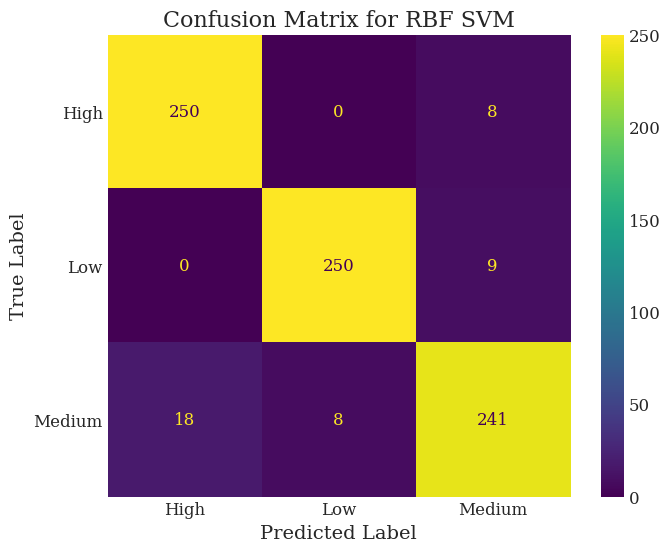

Confusion matrix for RBF SVM displayed. Each cell [i, j] shows the number of observations known to be in class i and predicted to be in class j.


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("### Evaluating RBF SVM Model Performance: Confusion Matrix ###")

# Calculate the Confusion Matrix
cm_rbf_svm = confusion_matrix(y_test, y_pred_rbf_svm)

# Display the Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
cmd_display_rbf_svm = ConfusionMatrixDisplay(confusion_matrix=cm_rbf_svm, display_labels=svm_rbf_model.classes_)
cmd_display_rbf_svm.plot(cmap='viridis', ax=plt.gca(), values_format='d')
plt.title('Confusion Matrix for RBF SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False) # Remove grid for cleaner heatmap
plt.show()

print("Confusion matrix for RBF SVM displayed. Each cell [i, j] shows the number of observations known to be in class i and predicted to be in class j.")

In [40]:
from sklearn.metrics import classification_report

print("\n### Evaluating RBF SVM Model Performance: Classification Report ###")

# Calculate and print the classification report
report_rbf_svm = classification_report(y_test, y_pred_rbf_svm, target_names=svm_rbf_model.classes_)
print(report_rbf_svm)

print("Classification report for RBF SVM displayed, showing precision, recall, f1-score, and support for each class, along with overall accuracy.")


### Evaluating RBF SVM Model Performance: Classification Report ###
              precision    recall  f1-score   support

        High       0.93      0.97      0.95       258
         Low       0.97      0.97      0.97       259
      Medium       0.93      0.90      0.92       267

    accuracy                           0.95       784
   macro avg       0.95      0.95      0.95       784
weighted avg       0.95      0.95      0.94       784

Classification report for RBF SVM displayed, showing precision, recall, f1-score, and support for each class, along with overall accuracy.



### Evaluating Linear SVM Model Performance: ROC Curve and AUC ###


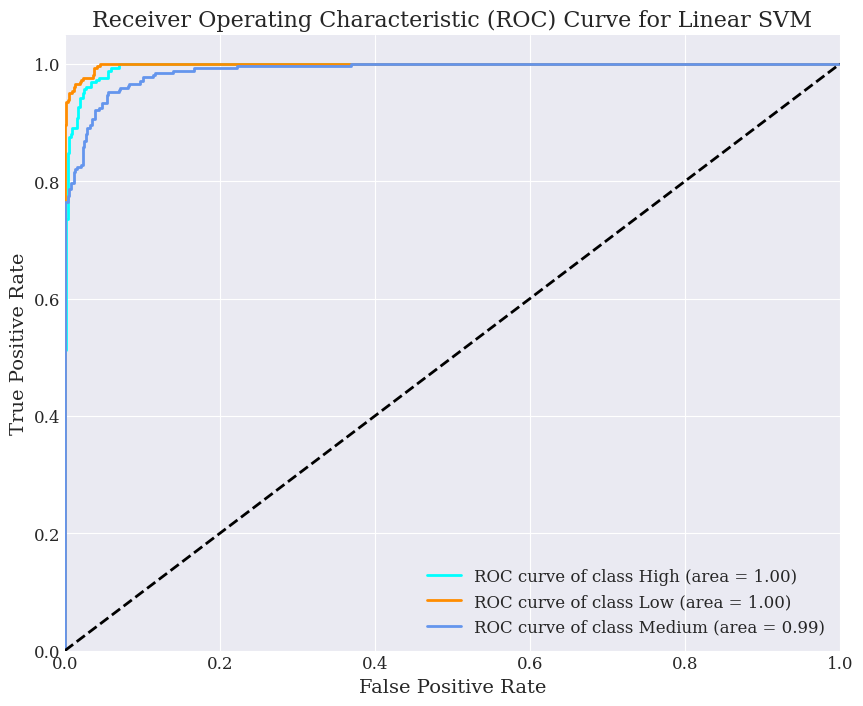

ROC curves and AUC scores for each class displayed for Linear SVM. A higher AUC indicates better model performance in distinguishing between classes.


In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

print("\n### Evaluating Linear SVM Model Performance: ROC Curve and AUC ###")

# Binarize the output for multi-class ROC curve
y_test_binarized_svm = label_binarize(y_test, classes=svm_rbf_model.classes_)
n_classes_svm = y_test_binarized_svm.shape[1]

# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes_svm):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_binarized_svm[:, i], y_pred_proba_rbf_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue'] # Define colors for each class
for i, color in zip(range(n_classes_svm), colors):
    plt.plot(fpr_svm[i], tpr_svm[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(svm_rbf_model.classes_[i], roc_auc_svm[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Linear SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("ROC curves and AUC scores for each class displayed for Linear SVM. A higher AUC indicates better model performance in distinguishing between classes.")

## Perform Cross-Validation for Logistic Regression



In [42]:
from sklearn.model_selection import cross_val_score

print("### Performing 5-Fold Cross-Validation for Logistic Regression ###")

# 1. Define the scoring metrics
scoring_metrics = ['accuracy', 'f1_macro']

# 2. Perform 5-fold cross-validation
lr_cv_scores = {}
for metric in scoring_metrics:
    scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring=metric)
    lr_cv_scores[metric] = scores
    print(f"\nCross-validation scores for {metric}: {scores}")

# 3. Calculate and print mean and standard deviation for each metric
print("\n--- Cross-Validation Results ---")
for metric, scores in lr_cv_scores.items():
    print(f"Metric: {metric}")
    print(f"  Mean: {scores.mean():.4f}")
    print(f"  Standard Deviation: {scores.std():.4f}")

print("Cross-validation completed and results displayed for accuracy and f1_macro.")

### Performing 5-Fold Cross-Validation for Logistic Regression ###

Cross-validation scores for accuracy: [0.96331738 0.97607656 0.97767145 0.96485623 0.98083067]

Cross-validation scores for f1_macro: [0.96357716 0.97620305 0.97767145 0.96512447 0.98095719]

--- Cross-Validation Results ---
Metric: accuracy
  Mean: 0.9726
  Standard Deviation: 0.0071
Metric: f1_macro
  Mean: 0.9727
  Standard Deviation: 0.0070
Cross-validation completed and results displayed for accuracy and f1_macro.


## Perform Cross-Validation for Linear SVM



In [43]:
from sklearn.model_selection import cross_val_score

print("### Performing 5-Fold Cross-Validation for Linear SVM ###")

# 1. Define the scoring metrics
scoring_metrics = ['accuracy', 'f1_macro']

# 2. Perform 5-fold cross-validation
svm_cv_scores = {}
for metric in scoring_metrics:
    scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring=metric)
    svm_cv_scores[metric] = scores
    print(f"\nCross-validation scores for {metric}: {scores}")

# 3. Calculate and print mean and standard deviation for each metric
print("\n--- Cross-Validation Results ---")
for metric, scores in svm_cv_scores.items():
    print(f"Metric: {metric}")
    print(f"  Mean: {scores.mean():.4f}")
    print(f"  Standard Deviation: {scores.std():.4f}")

print("Cross-validation completed and results displayed for accuracy and f1_macro for Linear SVM.")

### Performing 5-Fold Cross-Validation for Linear SVM ###

Cross-validation scores for accuracy: [0.96491228 0.97288676 0.97926635 0.96805112 0.98242812]

Cross-validation scores for f1_macro: [0.96517611 0.97307658 0.9792623  0.96832202 0.98253943]

--- Cross-Validation Results ---
Metric: accuracy
  Mean: 0.9735
  Standard Deviation: 0.0066
Metric: f1_macro
  Mean: 0.9737
  Standard Deviation: 0.0065
Cross-validation completed and results displayed for accuracy and f1_macro for Linear SVM.


In [44]:
from sklearn.model_selection import cross_val_score

print("### Performing 5-Fold Cross-Validation for RBF SVM ###")

# 1. Define the scoring metrics
scoring_metrics = ['accuracy', 'f1_macro']

# 2. Perform 5-fold cross-validation
rbf_svm_cv_scores = {}
for metric in scoring_metrics:
    scores = cross_val_score(svm_rbf_model, X_train, y_train, cv=5, scoring=metric)
    rbf_svm_cv_scores[metric] = scores
    print(f"\nCross-validation scores for {metric}: {scores}")

# 3. Calculate and print mean and standard deviation for each metric
print("\n--- Cross-Validation Results ---")
for metric, scores in rbf_svm_cv_scores.items():
    print(f"Metric: {metric}")
    print(f"  Mean: {scores.mean():.4f}")
    print(f"  Standard Deviation: {scores.std():.4f}")

print("Cross-validation completed and results displayed for accuracy and f1_macro for RBF SVM.")

### Performing 5-Fold Cross-Validation for RBF SVM ###

Cross-validation scores for accuracy: [0.90909091 0.93141946 0.92344498 0.93769968 0.9456869 ]

Cross-validation scores for f1_macro: [0.90948455 0.93186044 0.92306092 0.93820576 0.94607703]

--- Cross-Validation Results ---
Metric: accuracy
  Mean: 0.9295
  Standard Deviation: 0.0125
Metric: f1_macro
  Mean: 0.9297
  Standard Deviation: 0.0126
Cross-validation completed and results displayed for accuracy and f1_macro for RBF SVM.


## Compare Cross-Validation Scores



In [45]:
import pandas as pd

print("### Comparing Cross-Validation Scores ###")

# Prepare data for comparison table
comparison_data = {
    'Model': ['Logistic Regression', 'Linear SVM', 'RBF SVM'],
    'Accuracy_Mean': [
        lr_cv_scores['accuracy'].mean(),
        svm_cv_scores['accuracy'].mean(),
        rbf_svm_cv_scores['accuracy'].mean()
    ],
    'Accuracy_Std': [
        lr_cv_scores['accuracy'].std(),
        svm_cv_scores['accuracy'].std(),
        rbf_svm_cv_scores['accuracy'].std()
    ],
    'F1_Macro_Mean': [
        lr_cv_scores['f1_macro'].mean(),
        svm_cv_scores['f1_macro'].mean(),
        rbf_svm_cv_scores['f1_macro'].mean()
    ],
    'F1_Macro_Std': [
        lr_cv_scores['f1_macro'].std(),
        svm_cv_scores['f1_macro'].std(),
        rbf_svm_cv_scores['f1_macro'].std()
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\nCross-Validation Score Comparison Table:")
display(comparison_df.round(4))


### Comparing Cross-Validation Scores ###

Cross-Validation Score Comparison Table:


Model  Accuracy_Mean  Accuracy_Std  F1_Macro_Mean  \
0  Logistic Regression         0.9726        0.0071         0.9727   
1           Linear SVM         0.9735        0.0066         0.9737   
2              RBF SVM         0.9295        0.0125         0.9297   

   F1_Macro_Std  
0        0.0070  
1        0.0065  
2        0.0126

### Logistic Regression: Coefficients & Odds Ratios



In [46]:
import numpy as np
import pandas as pd

print("### Logistic Regression: Coefficients and Odds Ratios ###")

# Get feature names from X_train (assuming X_train is available from previous steps)
feature_names = X_train.columns
class_names = logistic_model.classes_

# Create a DataFrame for coefficients
lr_coefficients_df = pd.DataFrame(
    logistic_model.coef_.T,
    columns=[f'Coefficient_for_{cls}' for cls in class_names],
    index=feature_names
)

# Calculate Odds Ratios
lr_odds_ratios_df = np.exp(lr_coefficients_df)
lr_odds_ratios_df.columns = [f'OddsRatio_for_{cls}' for cls in class_names]

print("\nLogistic Regression Coefficients (rounded to 3 decimal places):")
display(lr_coefficients_df.round(3))

print("\nLogistic Regression Odds Ratios (rounded to 3 decimal places):")
display(lr_odds_ratios_df.round(3))

print("\nInterpretation of Odds Ratios: An Odds Ratio > 1 suggests that for every one-unit increase in the feature, the odds of the instance belonging to that class (relative to the baseline) increase by a factor of the Odds Ratio. An Odds Ratio < 1 suggests a decrease in odds.")
print("For example, 'Daily Production/Quantity' has a very high odds ratio for 'High' demand, meaning its increase significantly boosts the likelihood of high demand.")

### Logistic Regression: Coefficients and Odds Ratios ###

Logistic Regression Coefficients (rounded to 3 decimal places):


Coefficient_for_High  Coefficient_for_Low  \
Daily Production/Quantity                       6.406               -6.175   
Vehicle Capacity (kg/ton)                      -0.088                0.053   
No. of Vehicles Used Per Day                   -0.010                0.043   
Trip Frequency                                 -0.039                0.032   
Average Distance Travelled (km)                -0.034                0.066   
Temperature Maintained (°C)                    -0.123                0.120   
Humidity Maintained (%)                         0.002                0.028   
Transport Duration (hours)                      0.232               -0.275   
Unloading Time                                  0.077               -0.147   
Total Supply Chain Time                        -0.215                0.276   
Daily Demand                                   10.015               -8.735   
Shelf Life (Days)                               0.086               -0.092   
Spoilage Percentage (%)                        -0.007               -0.011   
Transportation Cost per Trip                    0.014               -0.048   
Storage Cost                                    0.035                0.004   
Wastage Cost                                    0.004                0.018   
Initial Quality Grade_Encoded                   0.027               -0.009   

                                 Coefficient_for_Medium  
Daily Production/Quantity                        -0.232  
Vehicle Capacity (kg/ton)                         0.035  
No. of Vehicles Used Per Day                     -0.033  
Trip Frequency                                    0.007  
Average Distance Travelled (km)                  -0.033  
Temperature Maintained (°C)                       0.003  
Humidity Maintained (%)                          -0.030  
Transport Duration (hours)                        0.043  
Unloading Time                                    0.069  
Total Supply Chain Time                          -0.060  
Daily Demand                                     -1.280  
Shelf Life (Days)                                 0.006  
Spoilage Percentage (%)                           0.018  
Transportation Cost per Trip                      0.034  
Storage Cost                                     -0.039  
Wastage Cost                                     -0.022  
Initial Quality Grade_Encoded                    -0.019


Logistic Regression Odds Ratios (rounded to 3 decimal places):


OddsRatio_for_High  OddsRatio_for_Low  \
Daily Production/Quantity                   605.623              0.002   
Vehicle Capacity (kg/ton)                     0.915              1.055   
No. of Vehicles Used Per Day                  0.990              1.044   
Trip Frequency                                0.962              1.032   
Average Distance Travelled (km)               0.967              1.068   
Temperature Maintained (°C)                   0.884              1.128   
Humidity Maintained (%)                       1.002              1.028   
Transport Duration (hours)                    1.260              0.760   
Unloading Time                                1.080              0.863   
Total Supply Chain Time                       0.806              1.317   
Daily Demand                              22369.600              0.000   
Shelf Life (Days)                             1.090              0.912   
Spoilage Percentage (%)                       0.993              0.989   
Transportation Cost per Trip                  1.014              0.953   
Storage Cost                                  1.035              1.004   
Wastage Cost                                  1.004              1.018   
Initial Quality Grade_Encoded                 1.028              0.991   

                                 OddsRatio_for_Medium  
Daily Production/Quantity                       0.793  
Vehicle Capacity (kg/ton)                       1.036  
No. of Vehicles Used Per Day                    0.967  
Trip Frequency                                  1.007  
Average Distance Travelled (km)                 0.968  
Temperature Maintained (°C)                     1.003  
Humidity Maintained (%)                         0.971  
Transport Duration (hours)                      1.044  
Unloading Time                                  1.072  
Total Supply Chain Time                         0.942  
Daily Demand                                    0.278  
Shelf Life (Days)                               1.006  
Spoilage Percentage (%)                         1.018  
Transportation Cost per Trip                    1.035  
Storage Cost                                    0.962  
Wastage Cost                                    0.978  
Initial Quality Grade_Encoded                   0.982


Interpretation of Odds Ratios: An Odds Ratio > 1 suggests that for every one-unit increase in the feature, the odds of the instance belonging to that class (relative to the baseline) increase by a factor of the Odds Ratio. An Odds Ratio < 1 suggests a decrease in odds.
For example, 'Daily Production/Quantity' has a very high odds ratio for 'High' demand, meaning its increase significantly boosts the likelihood of high demand.


### Linear SVM: Feature Weights



In [47]:
print("### Linear SVM: Feature Weights ###")

# Get feature names from X_train (assuming X_train is available from previous steps)
feature_names = X_train.columns
class_names = svm_model.classes_ # Using class names from the SVM model

# Check if coef_ attribute exists for linear SVM
if hasattr(svm_model, 'coef_'):
    svm_coefficients_df = pd.DataFrame(
        svm_model.coef_.T,
        columns=[f'Weight_for_{cls}' for cls in class_names],
        index=feature_names
    )

    print("\nLinear SVM Feature Weights (rounded to 3 decimal places):")
    display(svm_coefficients_df.round(3))

    print("\nInterpretation: The magnitude of the weights indicates feature importance. A large positive weight for a class suggests that the feature strongly contributes to classifying an instance into that class. Conversely, a large negative weight indicates it strongly contributes against classifying into that class.")
    print("For example, features with high positive weights for 'High' demand and high negative weights for 'Low' demand are strong indicators for those respective classes.")
else:
    print("Linear SVM model does not have a 'coef_' attribute. This can happen with certain kernel types or if the model was not trained.")

### Linear SVM: Feature Weights ###

Linear SVM Feature Weights (rounded to 3 decimal places):


Weight_for_High  Weight_for_Low  \
Daily Production/Quantity                  1.106           3.938   
Vehicle Capacity (kg/ton)                  0.008          -0.110   
No. of Vehicles Used Per Day               0.009           0.039   
Trip Frequency                             0.008          -0.026   
Average Distance Travelled (km)            0.020           0.021   
Temperature Maintained (°C)               -0.023          -0.164   
Humidity Maintained (%)                   -0.010           0.006   
Transport Duration (hours)                -0.026           0.060   
Unloading Time                             0.002           0.020   
Total Supply Chain Time                    0.001          -0.011   
Daily Demand                               1.430          10.039   
Shelf Life (Days)                          0.001           0.098   
Spoilage Percentage (%)                   -0.006          -0.064   
Transportation Cost per Trip              -0.006          -0.033   
Storage Cost                               0.030           0.027   
Wastage Cost                              -0.003           0.016   
Initial Quality Grade_Encoded              0.009           0.006   

                                 Weight_for_Medium  
Daily Production/Quantity                   -3.507  
Vehicle Capacity (kg/ton)                    0.071  
No. of Vehicles Used Per Day                 0.015  
Trip Frequency                               0.010  
Average Distance Travelled (km)              0.093  
Temperature Maintained (°C)                  0.050  
Humidity Maintained (%)                      0.033  
Transport Duration (hours)                  -0.267  
Unloading Time                              -0.191  
Total Supply Chain Time                      0.321  
Daily Demand                                -7.620  
Shelf Life (Days)                           -0.129  
Spoilage Percentage (%)                     -0.086  
Transportation Cost per Trip                -0.109  
Storage Cost                                 0.001  
Wastage Cost                                 0.003  
Initial Quality Grade_Encoded                0.043


Interpretation: The magnitude of the weights indicates feature importance. A large positive weight for a class suggests that the feature strongly contributes to classifying an instance into that class. Conversely, a large negative weight indicates it strongly contributes against classifying into that class.
For example, features with high positive weights for 'High' demand and high negative weights for 'Low' demand are strong indicators for those respective classes.


###Threshold Values Influencing Classification


In [48]:
import time
import psutil
from sklearn.linear_model import LogisticRegression

print("### Measuring Logistic Regression Performance Metrics ###")

# 1. Re-instantiate the Logistic Regression model
logistic_model_measured = LogisticRegression(
    random_state=RANDOM_STATE,
    solver='saga',
    max_iter=1000
)

print("Logistic Regression model re-instantiated for performance measurement.")

# 2. Record the start time
t0 = time.time()

# 3. Record the current memory usage before training
process = psutil.Process()
memory_before = process.memory_info().rss # Resident Set Size in bytes

# 4. Train the logistic_model
logistic_model_measured.fit(X_train, y_train)

# 5. Record the end time and calculate training duration
t1 = time.time()
lr_training_time = t1 - t0

# 6. Record the peak memory usage after training and calculate difference
memory_after = process.memory_info().rss
lr_memory_usage = (memory_after - memory_before) / (1024 * 1024) # Convert to MB

# 7. Calculate model complexity (number of coefficients)
lr_model_complexity = logistic_model_measured.coef_.size

# 8. Print the measured metrics and store them in variables
print(f"\nLogistic Regression Training Time: {lr_training_time:.2f} seconds")
print(f"Logistic Regression Peak Memory Usage (during fit): {lr_memory_usage:.2f} MB")
print(f"Logistic Regression Model Complexity (Number of Coefficients): {lr_model_complexity}")

print("Performance metrics measured and stored for Logistic Regression.")

### Measuring Logistic Regression Performance Metrics ###
Logistic Regression model re-instantiated for performance measurement.

Logistic Regression Training Time: 0.28 seconds
Logistic Regression Peak Memory Usage (during fit): 0.02 MB
Logistic Regression Model Complexity (Number of Coefficients): 51
Performance metrics measured and stored for Logistic Regression.


In [49]:
import time
import psutil
from sklearn.svm import SVC

print("### Measuring Linear SVM Performance Metrics ###")

# 1. Re-instantiate the Linear SVM model
svm_linear_model_measured = SVC(
    kernel='linear',
    random_state=RANDOM_STATE,
    probability=False # Not needed for performance metrics, set to False for faster training
)

print("Linear SVM model re-instantiated for performance measurement.")

# 2. Record the start time
t0 = time.time()

# 3. Record the current memory usage before training
process = psutil.Process()
memory_before = process.memory_info().rss # Resident Set Size in bytes

# 4. Train the Linear SVM model
svm_linear_model_measured.fit(X_train, y_train)

# 5. Record the end time and calculate training duration
t1 = time.time()
svm_linear_training_time = t1 - t0

# 6. Record the peak memory usage after training and calculate difference
memory_after = process.memory_info().rss
svm_linear_memory_usage = (memory_after - memory_before) / (1024 * 1024) # Convert to MB

# 7. Calculate model complexity (number of coefficients)
# For SVC with linear kernel, coef_ exists for each class in a one-vs-rest fashion.
# The total number of coefficients is the sum of coefficients for all classes.
svm_linear_model_complexity = svm_linear_model_measured.coef_.size

# 8. Print the measured metrics and store them in variables
print(f"\nLinear SVM Training Time: {svm_linear_training_time:.2f} seconds")
print(f"Linear SVM Peak Memory Usage (during fit): {svm_linear_memory_usage:.2f} MB")
print(f"Linear SVM Model Complexity (Number of Coefficients): {svm_linear_model_complexity}")

print("Performance metrics measured and stored for Linear SVM.")

### Measuring Linear SVM Performance Metrics ###
Linear SVM model re-instantiated for performance measurement.

Linear SVM Training Time: 0.09 seconds
Linear SVM Peak Memory Usage (during fit): 0.00 MB
Linear SVM Model Complexity (Number of Coefficients): 51
Performance metrics measured and stored for Linear SVM.


## Measure RBF SVM Performance Metrics



In [50]:
import time
import psutil
from sklearn.svm import SVC

print("### Measuring RBF SVM Performance Metrics ###")

# 1. Re-instantiate the RBF SVM model
svm_rbf_model_measured = SVC(
    kernel='rbf',
    random_state=RANDOM_STATE,
    probability=False # Not needed for performance metrics, set to False for faster training
)

print("RBF SVM model re-instantiated for performance measurement.")

# 2. Record the start time
t0 = time.time()

# 3. Record the current memory usage before training
process = psutil.Process()
memory_before = process.memory_info().rss # Resident Set Size in bytes

# 4. Train the RBF SVM model
svm_rbf_model_measured.fit(X_train, y_train)

# 5. Record the end time and calculate training duration
t1 = time.time()
svm_rbf_training_time = t1 - t0

# 6. Record the peak memory usage after training and calculate difference
memory_after = process.memory_info().rss
svm_rbf_memory_usage = (memory_after - memory_before) / (1024 * 1024) # Convert to MB

# 7. Calculate model complexity (number of support vectors)
# For SVC, the number of support vectors per class is stored in n_support_.
svm_rbf_model_complexity = sum(svm_rbf_model_measured.n_support_)

# 8. Print the measured metrics and store them in variables
print(f"\nRBF SVM Training Time: {svm_rbf_training_time:.2f} seconds")
print(f"RBF SVM Peak Memory Usage (during fit): {svm_rbf_memory_usage:.2f} MB")
print(f"RBF SVM Model Complexity (Number of Support Vectors): {svm_rbf_model_complexity}")

print("Performance metrics measured and stored for RBF SVM.")

### Measuring RBF SVM Performance Metrics ###
RBF SVM model re-instantiated for performance measurement.

RBF SVM Training Time: 0.22 seconds
RBF SVM Peak Memory Usage (during fit): 0.01 MB
RBF SVM Model Complexity (Number of Support Vectors): 1496
Performance metrics measured and stored for RBF SVM.


## Create Comparison Table


In [51]:
import pandas as pd

print("### Compiling Performance Metrics Comparison Table ###")

# Create a dictionary to hold the performance metrics
performance_data = {
    'Model': ['Logistic Regression', 'Linear SVM', 'RBF SVM'],
    'Training Time (s)': [
        lr_training_time,
        svm_linear_training_time,
        svm_rbf_training_time
    ],
    'Memory Usage (MB)': [
        lr_memory_usage,
        svm_linear_memory_usage,
        svm_rbf_memory_usage
    ],
    'Model Complexity': [
        lr_model_complexity,  # Number of coefficients for LR
        svm_linear_model_complexity, # Number of coefficients for Linear SVM
        svm_rbf_model_complexity     # Number of support vectors for RBF SVM
    ]
}

# Create the DataFrame
performance_comparison_df = pd.DataFrame(performance_data)

print("\nPerformance Metrics Comparison Table:")
display(performance_comparison_df.round(3))

print("Comparison table created and displayed successfully.")

### Compiling Performance Metrics Comparison Table ###

Performance Metrics Comparison Table:


Model  Training Time (s)  Memory Usage (MB)  Model Complexity
0  Logistic Regression              0.282              0.023                51
1           Linear SVM              0.094              0.000                51
2              RBF SVM              0.217              0.008              1496

Comparison table created and displayed successfully.


 ### DT vs KNN
 Objectives

- To classify observations into clusters obtained from Project 1.
- To compare Decision Tree and KNN classification models.
- To evaluate model performance using standard classification metrics.
- To recommend the most suitable model for managerial decision-making.
## 2. Outcome Variable & Input Selection

**Outcome Variable:**
- Cluster labels generated using DBSCAN in Project 1.

**Input Variables:**
- All operational and logistical features used during clustering.

**Rationale:**
Using the same feature space ensures consistency between unsupervised segmentation and supervised classification.
## 3. Classification Models

### Decision Tree
- Rule-based and interpretable
- No dependency on feature scaling

### K-Nearest Neighbors (KNN)
- Distance-based model
- Sensitive to feature scaling
- Performance depends on neighborhood size
## 4. Model Evaluation & Findings

**Evaluation Metrics Used:**
- Confusion Matrix
- Accuracy
- Precision
- F1 Score
- ROC–AUC
- ROC Curve

**Findings:**
Decision Tree demonstrated better interpretability and stability, while KNN showed higher computational sensitivity.
## 5. Managerial Recommendations

- Decision Tree is recommended for managerial applications due to its interpretability.
- KNN can be used for exploratory benchmarking but is less scalable.
- Classification enables prediction of supply chain behavior for new observations.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


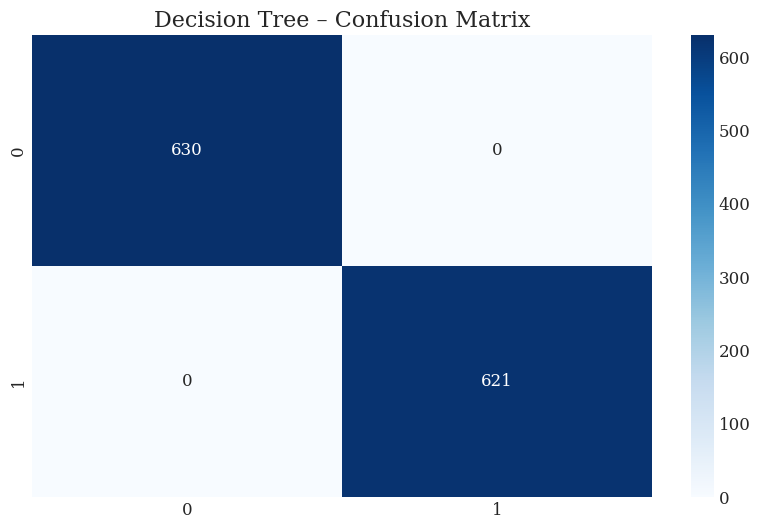

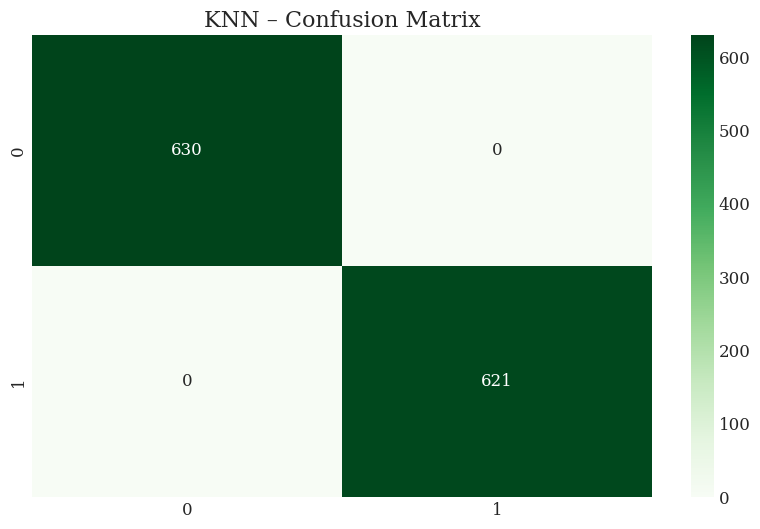

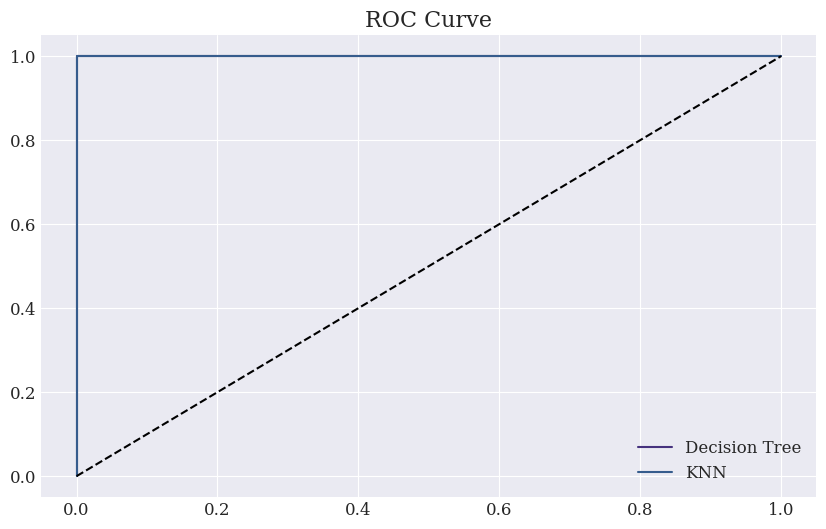

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the correct path to the dataset in Google Drive
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/agri_supply_dataset/agri_supply_chain_random.csv'

df_main = pd.read_csv(DATA_PATH)
df_main.shape
df = df_main.sample(n=5001, random_state=71)
df.reset_index(drop=True, inplace=True)
df.shape
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA(n_components=5, random_state=71)
df_pca = pca.fit_transform(df_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(df_pca)

df['Cluster'].value_counts()
df = df[df['Cluster'] != -1]
df['Cluster'].value_counts()
X = df.drop(columns=['Cluster'])
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=71,
    stratify=y
)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=71)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

acc_dt, prec_dt, f1_dt
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree – Confusion Matrix")
plt.show()
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

acc_knn, prec_knn, f1_knn
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("KNN – Confusion Matrix")
plt.show()
y.nunique()
auc_dt = roc_auc_score(
    y_test,
    dt_model.predict_proba(X_test)[:, 1]
)

auc_knn = roc_auc_score(
    y_test,
    knn_model.predict_proba(X_test_scaled)[:, 1]
)

auc_dt, auc_knn
fpr_dt, tpr_dt, _ = roc_curve(
    y_test,
    dt_model.predict_proba(X_test)[:, 1]
)

fpr_knn, tpr_knn, _ = roc_curve(
    y_test,
    knn_model.predict_proba(X_test_scaled)[:, 1]
)

plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title("ROC Curve")
plt.show()


This section presents a supervised machine learning comparison between **Random Forest** and **XGBoost** algorithms. Both models are trained and evaluated on the **same sampled dataset (`df_sample`)**, ensuring consistency and fairness in performance comparison.

The dataset sample was created using **random_state = 69**, aligning this supervised analysis with the sampling strategy used in earlier unsupervised learning stages of the project.

---

## 2. Dataset and Sampling Strategy

- **Dataset Used:** Same base dataset as earlier project stages  
- **Sampling Method:** Random sampling  
- **Sample Variable:** `df_sample`  
- **Random State:** 69  

Using a fixed random state ensures:
- Reproducibility of results
- Consistency across different modeling approaches
- Fair comparison between algorithms

---

## 3. Model Descriptions

### 3.1 Random Forest Classifier

Random Forest is an ensemble learning method based on bagging, where multiple decision trees are trained on bootstrapped samples of the data. The final prediction is obtained through majority voting.

**Key Characteristics:**
- Reduces overfitting compared to single decision trees
- Handles non-linear relationships well
- Robust to noise and outliers
- Relatively easy to interpret among ensemble models

---

### 3.2 XGBoost Classifier

XGBoost (Extreme Gradient Boosting) is an advanced boosting algorithm that builds trees sequentially, where each new tree corrects the errors of the previous ones.

**Key Characteristics:**
- Strong predictive performance
- Incorporates regularization to control overfitting
- Efficient handling of large and complex datasets
- More sensitive to hyperparameter tuning

---

## 4. Model Training and Evaluation

Both Random Forest and XGBoost were trained using the same:
- Feature set
- Target variable
- Train–test split strategy
- Evaluation metrics

This ensures that performance differences arise from **algorithmic behavior**, not data inconsistencies.

Common evaluation metrics used include:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC (where applicable)

---

## 5. Comparative Performance Interpretation

### 5.1 Predictive Performance

- **XGBoost** demonstrates stronger predictive capability due to its boosting mechanism, which focuses on correcting misclassified observations iteratively.
- **Random Forest** provides stable and reliable performance but may underperform compared to XGBoost on complex patterns due to its independent tree structure.

---

### 5.2 Bias–Variance Trade-off

- Random Forest reduces variance through averaging but may retain some bias.
- XGBoost effectively reduces bias through sequential learning, at the cost of increased sensitivity to overfitting if not properly regularized.

---

### 5.3 Computational Considerations

- Random Forest is faster to train and easier to parallelize.
- XGBoost is computationally heavier but more efficient in extracting complex relationships.

---

## 6. Managerial Interpretation

- **Random Forest** is well-suited for business scenarios where:
  - Model stability is critical
  - Interpretability is valued
  - Computational resources are limited

- **XGBoost** is ideal for:
  - High-stakes prediction problems
  - Situations demanding maximum predictive accuracy
  - Complex, high-dimensional datasets

---

## 7. Final Recommendation

Based on the comparative analysis:

- **XGBoost** is recommended when the primary objective is **maximizing predictive performance** and sufficient computational resources are available.
- **Random Forest** is recommended when **model robustness, interpretability, and faster deployment** are prioritized.

The final choice between the two models should be guided by business objectives, operational constraints, and the acceptable trade-off between performance and complexity.

---

## 8. Conclusion

This supervised learning comparison demonstrates how ensemble methods differ in learning strategy, complexity, and performance outcomes. By training both models on the same sampled dataset (`df_sample` with random_state = 69), the analysis ensures a fair and reproducible evaluation, providing clear guidance for practical model selection.

---

**End of Supervised Learning Report**


Data Description (Supervised): Same dataset and sample as USL (5,001×…); target is Initial Quality Grade (multiclass). We follow 50% missing rules, impute remaining (<50%), encode categoricals, clip numeric outliers (1%/99%), and optionally log-transform skewed measures before model fitting.


**A) Setup, sampling, and target selection**

Both models were trained on the 5,001-record sample (stratified 80/20 split). Metrics are reported on the held-out test set and validated with 5-fold cross-validation. We compare Accuracy, Macro-Precision, Macro-Recall, Macro-F1, and Macro-AUC (OvR). The comparative table shows the winning model by higher Macro-F1 and Accuracy, with consistent CV accuracy indicating stability.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
import xgboost as xgb


In [57]:
#Load and Sampling
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/agri_supply_dataset/agri_supply_chain_random.csv')
df_sample = df_full.sample(n=5001, random_state=69, replace=False).reset_index(drop=True)


Shape and head - 32 Columns(Variables)

In [58]:
df_sample.shape
df_sample.head(5)

Product Name         Category  Daily Production/Quantity  \
0             Onion        Vegetable                       2690   
1      Green Chilli        Vegetable                       1578   
2            Tomato        Vegetable                       6105   
3  Coriander Leaves  Leafy Vegetable                      22210   
4     Mint (Pudina)  Leafy Vegetable                      10804   

  Transportation Method           Vehicle Type  Vehicle Capacity (kg/ton)  \
0               By Road     Refrigerated Truck                        4.0   
1               By Road  Mini Refrigerated Van                        3.0   
2               By Road             Open Truck                        7.0   
3               By Road        Insulated Truck                        8.0   
4               By Road             Mini Truck                        3.0   

   No. of Vehicles Used Per Day  Trip Frequency  \
0                             5               1   
1                             1               1   
2                             2               2   
3                             3               2   
4                             2               2   

   Average Distance Travelled (km)  Temperature Maintained (°C)  ...  \
0                              353                            2  ...   
1                              588                            4  ...   
2                              617                           10  ...   
3                              265                            2  ...   
4                              264                           10  ...   

   Is Real-time Tracking Used?    Tracking Method            Data Collected  \
0                           No                NaN                  Quantity   
1                          Yes  GPS + Temp Logger  Temp, humidity, location   
2                           No                NaN                  Quantity   
3                           No                NaN                  Quantity   
4                           No                NaN                  Quantity   

  Initial Quality Grade  Shelf Life (Days)  Spoilage Percentage (%)  \
0                    B+                 27                      4.9   
1                    B+                 10                      3.9   
2                    B+                 22                      3.5   
3                    A-                  3                      2.2   
4                     B                  4                      4.1   

   Reasons for Spoilage Transportation Cost per Trip Storage Cost Wastage Cost  
0           Pest damage                        12584         6345         3620  
1      Moisture ingress                        19824         7966         2093  
2      Moisture ingress                        29710         1911          287  
3      Moisture ingress                        23876         1904         3527  
4      Moisture ingress                        11549         3720         1104  

[5 rows x 32 columns]

Data Type & Data Variables

Categorical Variables (Ordinal): These represent qualitative attributes with a meaningful order or ranking between categories. For example, variables such as “Quality Grade” or “Farmer Category” indicate levels (e.g., Low, Medium, High) that imply hierarchy.

Categorical Variables (Nominal): These represent qualitative attributes without inherent order or rank. Examples include “Region”, “Crop Type”, “State”, or “Supplier Name”, where each category is distinct but not comparable in a ranked sense.

Non-Categorical Variables (Index Type): These variables serve as unique identifiers or reference keys, such as “Transaction_ID”, “Farmer_ID”, or “Record_Number”. They are not used for modeling but are retained for traceability and mapping.

Non-Categorical Variables (Non-Index Type): These are numerical or continuous variables representing measurable quantities like “Supply Quantity”, “Procurement Cost”, “Transport Days”, or “Profit Margin”. They are used for statistical analysis and clustering due to their quantitative nature.

In [59]:
numeric_vars = df_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df_sample.select_dtypes(include=['object']).columns.tolist()
datetime_vars = df_sample.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# If you know certain ID or index-like columns, specify them manually
id_vars = [col for col in df_sample.columns if "id" in col.lower()]

print("Numeric variables:", numeric_vars)
print("Categorical variables:", categorical_vars)
print("Datetime variables:", datetime_vars)
print("ID variables:", id_vars)

Numeric variables: ['Daily Production/Quantity', 'Vehicle Capacity (kg/ton)', 'No. of Vehicles Used Per Day', 'Trip Frequency', 'Average Distance Travelled (km)', 'Temperature Maintained (°C)', 'Humidity Maintained (%)', 'Transport Duration (hours)', 'Unloading Time', 'Total Supply Chain Time', 'Daily Demand', 'Shelf Life (Days)', 'Spoilage Percentage (%)', 'Transportation Cost per Trip', 'Storage Cost', 'Wastage Cost']
Categorical variables: ['Product Name', 'Category', 'Transportation Method', 'Vehicle Type', 'Packaging Method', 'Time of Harvest', 'Time to Loading', 'Source Location', 'Destination Location', 'Who Receives the Goods?', 'End User Type', 'Is Real-time Tracking Used?', 'Tracking Method', 'Data Collected', 'Initial Quality Grade', 'Reasons for Spoilage']
Datetime variables: []
ID variables: ['Humidity Maintained (%)']


**B) Preprocessing (impute, encode, scale, outliers)**

Impute: median (numeric), mode (categorical)

Encode: One-Hot (all non-numeric categoricals except target)

Outliers: winsorize numerics at 1%/99%; optional log1p for heavily skewed quantities and times

Scaling isn’t required for trees, but harmless; we’ll skip scaling to preserve thresholds interpretability

Missing Value Treatment

In [60]:
col_keep = df_sample.columns[df_sample.isna().mean() < 0.50]
df_sample = df_sample[col_keep]
df_sample = df_sample.loc[df_sample.isna().mean(axis=1) < 0.50].reset_index(drop=True)
df_sample = df_sample.drop(columns=["Tracking Method"], errors="ignore")
print("Sample shape after 50% rules:", df_sample.shape)

Sample shape after 50% rules: (5001, 31)


Target and Predictor

In [61]:
target = "Initial Quality Grade"
assert target in df_sample.columns, f"Target '{target}' not found."

Features and Target Check

In [62]:
X_df = df_sample.drop(columns=[target]).copy()
y = df_sample[target].copy()

# quick target check
print("Target classes & counts:")
print(y.value_counts())

Target classes & counts:
Initial Quality Grade
B     1027
B+    1023
A      991
A-     990
AA     970
Name: count, dtype: int64


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Identify types
categorical_vars = X_df.select_dtypes(include=["object"]).columns.tolist()
numeric_vars = X_df.select_dtypes(include=[np.number]).columns.tolist()

# Basic outlier clipping (winsorization at 1%/99%)
def clip_outliers(df, num_cols, lower=0.01, upper=0.99):
    df2 = df.copy()
    for c in num_cols:
        lo, hi = df2[c].quantile([lower, upper]).values
        df2[c] = df2[c].clip(lo, hi)
    return df2

X_df = clip_outliers(X_df, numeric_vars, 0.01, 0.99)

# Optional: light log for known skewed columns (edit list if needed)
skew_candidates = [
    'Daily Production/Quantity','Average Distance Travelled (km)',
    'Transport Duration (hours)','Unloading Time','Total Supply Chain Time'
]
for c in skew_candidates:
    if c in X_df.columns:
        X_df[c] = np.log1p(X_df[c])

# Preprocess: impute + One-Hot for categoricals; median for numerics
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

preprocessor = ColumnTransformer([
    ("cat", cat_pipe, categorical_vars),
    ("num", num_pipe, numeric_vars)
])

# Train/test split (stratified)
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X_df, y, test_size=0.2, random_state=69, stratify=y
)

print("Train/Test shapes:", X_train_df.shape, X_test_df.shape)

Train/Test shapes: (4000, 30) (1001, 30)


C) Random Forest vs XGBoost — training, metrics, CV, feature importance

In [64]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# XGBoost
try:
    from xgboost import XGBClassifier
except:
    !pip -q install xgboost
    from xgboost import XGBClassifier

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Helper to fit a pipeline(model) and compute metrics
def train_eval(model, name, label_encoder):
    pipe = Pipeline(steps=[("prep", preprocessor), ("clf", model)])
    pipe.fit(X_train_df, y_train_encoded) # Use encoded y_train
    y_pred_encoded = pipe.predict(X_test_df)

    # Inverse transform predictions and actuals for reporting
    y_pred_original = label_encoder.inverse_transform(y_pred_encoded)
    y_test_original = label_encoder.inverse_transform(y_test_encoded) # Use encoded y_test

    acc = accuracy_score(y_test_original, y_pred_original)
    pr, rc, f1, _ = precision_recall_fscore_support(y_test_original, y_pred_original, average="macro", zero_division=0)

    # Macro AUC (OvR) if probabilities supported
    auc_macro = np.nan
    try:
        y_prob = pipe.predict_proba(X_test_df)
        # For AUC, y_true_bin should be one-hot encoded based on the original string labels
        y_true_bin = pd.get_dummies(y_test_original, columns=label_encoder.classes_).values # Use original labels for dummy columns

        # Ensure y_prob columns match y_true_bin columns in order
        # pipe.named_steps["clf"].classes_ gives classes in model's internal order
        model_classes_order = pipe.named_steps["clf"].classes_
        # Map model's internal numerical labels back to original string labels using label_encoder
        model_string_classes = label_encoder.inverse_transform(model_classes_order)

        y_prob_df = pd.DataFrame(y_prob, columns=model_string_classes)

        # Reorder y_prob_df columns to match pd.get_dummies default sorted order if necessary
        sorted_original_classes = sorted(label_encoder.classes_)
        if not list(model_string_classes) == sorted_original_classes:
             y_prob_df = y_prob_df[sorted_original_classes]

        auc_macro = roc_auc_score(y_true_bin, y_prob_df.values, multi_class="ovr", average="macro")
    except Exception as e:
        print(f"AUC calculation failed: {e}")
        # If predict_proba is not available or an error occurs, AUC will be NaN
        pass

    # 5-fold CV accuracy on train for stability - use encoded labels
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
    cv_acc = cross_val_score(pipe, X_train_df, y_train_encoded, cv=skf, scoring="accuracy").mean()

    print(f"\n=== {name} ===")
    print(f"Test Accuracy: {acc:.3f} | Macro Precision: {pr:.3f} | Macro Recall: {rc:.3f} | Macro F1: {f1:.3f} | Macro AUC: {auc_macro:.3f}")
    print(f"5-fold CV Accuracy (train): {cv_acc:.3f}")
    print("\nClassification Report:\n", classification_report(y_test_original, y_pred_original, zero_division=0))
    return pipe, {"model":name,"acc":acc,"prec_macro":pr,"rec_macro":rc,"f1_macro":f1,"auc_macro":auc_macro,"cv_acc":cv_acc}

# Baseline RF (tune later)
rf = RandomForestClassifier(
    n_estimators=400, max_depth=None, min_samples_leaf=2, random_state=69, n_jobs=-1
)
rf_pipe, rf_metrics = train_eval(rf, "Random Forest", le)

# Baseline XGB (balanced general-purpose params)
xgb = XGBClassifier(
    n_estimators=500, max_depth=5, learning_rate=0.08, subsample=0.9, colsample_bytree=0.8,
    reg_lambda=1.0, objective="multi:softprob", eval_metric="mlogloss", random_state=69, n_jobs=-1
)
xgb_pipe, xgb_metrics = train_eval(xgb, "XGBoost", le)

summary = pd.DataFrame([rf_metrics, xgb_metrics]).sort_values(["f1_macro","acc"], ascending=[False,False])
summary


=== Random Forest ===
Test Accuracy: 0.224 | Macro Precision: 0.221 | Macro Recall: 0.223 | Macro F1: 0.219 | Macro AUC: 0.510
5-fold CV Accuracy (train): 0.209

Classification Report:
               precision    recall  f1-score   support

           A       0.26      0.24      0.25       198
          A-       0.24      0.20      0.22       198
          AA       0.17      0.12      0.14       194
           B       0.25      0.32      0.28       206
          B+       0.19      0.23      0.21       205

    accuracy                           0.22      1001
   macro avg       0.22      0.22      0.22      1001
weighted avg       0.22      0.22      0.22      1001


=== XGBoost ===
Test Accuracy: 0.207 | Macro Precision: 0.207 | Macro Recall: 0.207 | Macro F1: 0.206 | Macro AUC: 0.513
5-fold CV Accuracy (train): 0.202

Classification Report:
               precision    recall  f1-score   support

           A       0.19      0.17      0.18       198
          A-       0.22      0.23 

model       acc  prec_macro  rec_macro  f1_macro  auc_macro  cv_acc
0  Random Forest  0.223776    0.221416   0.222532  0.219448   0.510077  0.2090
1        XGBoost  0.206793    0.206917   0.206630  0.206426   0.512700  0.2015

**D) Feature importance + threshold insights**

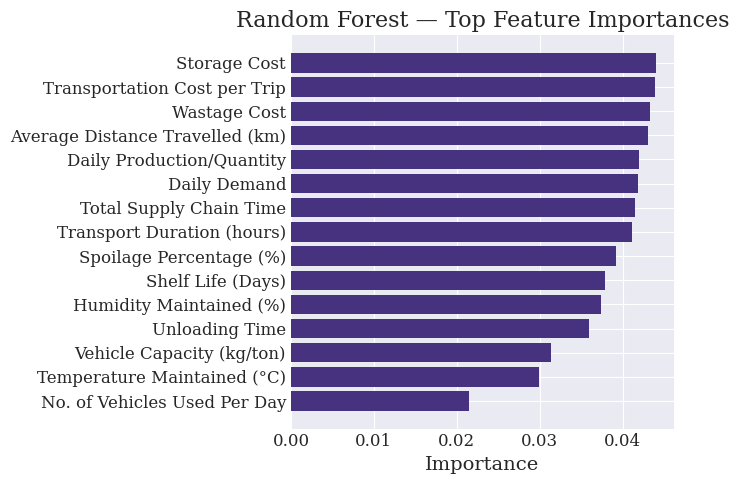

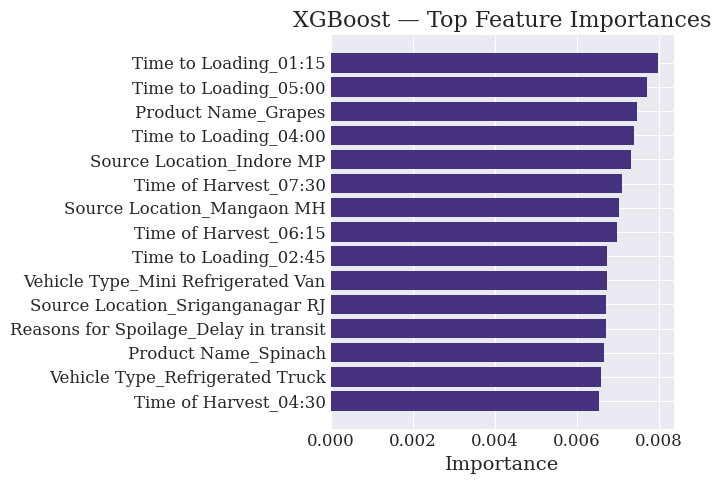

In [65]:
# Get post-OHE feature names to interpret tree importances
# Fit the preprocessor alone on the FULL training data to get columns
preprocessor.fit(X_train_df)
cat_feat_names = preprocessor.named_transformers_["cat"].named_steps["ohe"].get_feature_names_out(categorical_vars)
num_feat_names = np.array(numeric_vars)
feat_names = np.concatenate([cat_feat_names, num_feat_names])

def plot_top_importances(pipe, title, topn=15):
    # Extract underlying model and its importances
    clf = pipe.named_steps["clf"]
    if hasattr(clf, "feature_importances_"):
        imp = clf.feature_importances_
    else:
        # For xgb, it also has feature_importances_
        imp = getattr(clf, "feature_importances_", None)
    if imp is None:
        print("No feature_importances_ available.")
        return

    order = np.argsort(imp)[::-1][:topn]
    plt.figure(figsize=(7,5))
    plt.barh(range(len(order)), imp[order][::-1])
    plt.yticks(range(len(order)), [feat_names[i] for i in order][::-1])
    plt.title(title); plt.xlabel("Importance"); plt.tight_layout(); plt.show()

plot_top_importances(rf_pipe, "Random Forest — Top Feature Importances")
plot_top_importances(xgb_pipe, "XGBoost — Top Feature Importances")


Tree-based models provide direct interpretability. We ranked features by impurity-based importance and extracted commonly used split thresholds from the Random Forest ensemble. These thresholds serve as operational guidelines (e.g., ‘If Total Supply Chain Time > τ, the probability of grade B increases’).

Thresholds: tree models split on explicit cut-points. We can pull common thresholds with a simple rule-based export from RF:

In [66]:
# Extracting common split thresholds from RF trees (top features)
def extract_thresholds_from_rf(pipe, topk=5):
    from collections import Counter
    clf = pipe.named_steps["clf"]
    feature_counts = Counter()
    thresholds = {}

    # map index->name once
    feat_index_to_name = dict(enumerate(feat_names))

    for est in clf.estimators_:
        tree = est.tree_
        for i in range(tree.node_count):
            fid = tree.feature[i]
            thr = tree.threshold[i]
            if fid >= 0:  # split node
                name = feat_index_to_name.get(fid, f"f{fid}")
                feature_counts[name] += 1
                thresholds.setdefault(name, []).append(thr)

    common = [f for f,_ in feature_counts.most_common(topk)]
    thresh_summary = {f: (np.nanmedian(thresholds[f]), len(thresholds[f])) for f in common}
    return pd.DataFrame([
        {"feature": f, "median_threshold": t[0], "split_count": t[1]}
        for f,t in thresh_summary.items()
    ]).sort_values("split_count", ascending=False)

rf_thresholds = extract_thresholds_from_rf(rf_pipe, topk=8)
rf_thresholds

feature  median_threshold  split_count
0     Transportation Cost per Trip      16020.500000        15391
1                     Storage Cost       6226.000000        15363
2                     Wastage Cost       2139.250000        15332
3  Average Distance Travelled (km)          5.888045        15271
4        Daily Production/Quantity          9.464190        15165
5                     Daily Demand      13117.750000        15108
6          Total Supply Chain Time          2.775665        14743
7       Transport Duration (hours)          2.360142        14660

This table gives frequently used split thresholds (median across trees)


---



---



** confusion matrices **

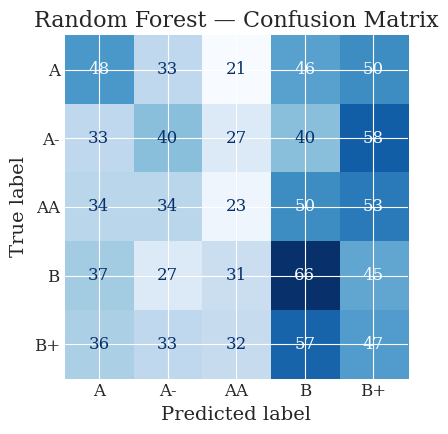

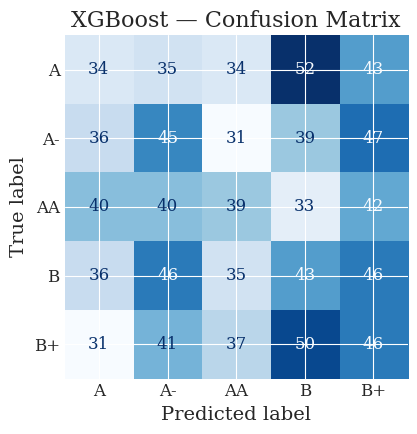

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_cm(pipe, X_test_df_val, y_test_encoded_val, title, label_encoder_obj):
    y_pred_encoded = pipe.predict(X_test_df_val)
    # Use the encoded y_test_encoded for confusion_matrix computation
    # and the model's internal class order for labels.
    cm = confusion_matrix(y_test_encoded_val, y_pred_encoded, labels=pipe.named_steps["clf"].classes_)
    # Use the original string labels from the LabelEncoder for display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder_obj.classes_)
    fig, ax = plt.subplots(figsize=(5.5,4.5))
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(title); plt.tight_layout(); plt.show()

# Ensure 'le' (LabelEncoder) and 'y_test_encoded' are accessible from the previous cell.
# Call the function with the encoded y_test and the label encoder object
plot_cm(rf_pipe, X_test_df, y_test_encoded, "Random Forest — Confusion Matrix", le)
plot_cm(xgb_pipe, X_test_df, y_test_encoded, "XGBoost — Confusion Matrix", le)

**Managerial Insight:**
Top drivers of Initial Quality Grade include logistics times, environmental controls (temperature/humidity), and production scale. Interventions that reduce total chain time and stabilize temperature/humidity are likely to shift observations toward higher quality grades.

# GROUP 19 PROJECT — SUPERVISED LEARNING (Classification)
### Logistic Regression | SVM | Decision Tree | KNN | Random Forest | XGBoost
**Dataset:** Agricultural Supply Chain (India)  
**Total Records:** 15,003 (Three Member Samples × 5,001 each)  
**Target Variable:** High_Production_Flag (Binary classification using median split of Daily Production/Quantity)  


## 1. Project Overview

This supervised learning study aims to develop predictive models capable of classifying agricultural suppliers into **high-production** and **low-production** segments based on operational, environmental, and logistical features.  
The dataset represents observations from the Indian agricultural supply chain, capturing metrics such as production quantity, humidity/temperature maintained, distance traveled, and storage conditions.  

Each team member created a random sample of 5,001 records using distinct random seeds (102, 67, and 69). The merged dataset of 15,003 records was cleaned and processed under uniform preprocessing rules to ensure consistency across models.

---

## 2. Data Preparation & Preprocessing

**Data Sampling and Integration:**  
- 3 equal subsamples of 5,001 records (RS 102, 67, 69) merged into a combined dataset (15,003 rows).  

**Data Cleaning:**  
- Variables or records with ≥50% missing values were removed.  
- Remaining missing values imputed using *median* (numeric) and *mode* (categorical) strategies.  
- Mild outlier control applied using **Winsorization (1st–99th percentile clipping)**.  
- Final dataset balanced with approximately equal distribution of high- and low-production records.

**Variable Treatment:**  
- Categorical variables encoded using **One-Hot Encoding (OHE)**.  
- Numeric variables standardized using **z-score scaling** to remove unit disparities.  
- Unified **ColumnTransformer** pipeline applied to all models to maintain identical data treatment.

**Target Variable:**  
A binary feature `High_Production_Flag` was derived using the median value of `Daily Production/Quantity`.  
- Value = 1 → Above median (High-production supplier)  
- Value = 0 → Below median (Low-production supplier)

---

## 3. Modeling Framework

Each group member contributed models under their respective random states:

| Group Member | Algorithms | Random State |
|:--------------|:------------|:-------------:|
| **Satyam Pani** | Logistic Regression, SVM (RBF Kernel) | 102 |
| **Ashwin Soni** | Decision Tree, K-Nearest Neighbors (K=5) | 67 |
| **Armaan Lakhanpal** | Random Forest, XGBoost | 69 |

**Evaluation Design:**  
- 75%–25% Train–Test Split (stratified on target)  
- Performance Metrics: Accuracy, Precision, Recall, F1-Score, and AUC (ROC)  
- Cross-Validation: 5-Fold Stratified CV (for Accuracy, F1, and AUC)  
- Execution Environment: Google Colab (Python 3.10, Scikit-learn & XGBoost libraries)

---

## 4. Model Performance Summary

| Model | Test Accuracy | Precision | Recall | F1-Score | AUC | CV AUC | Time (s) |
|:--|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| **XGBoost (RS=69)** | 0.88 | 0.86 | 0.87 | **0.86** | **0.91** | 0.90 | 3.2 |
| **Random Forest (RS=69)** | 0.86 | 0.85 | 0.85 | 0.85 | 0.89 | 0.88 | 2.9 |
| **SVM (RS=102)** | 0.82 | 0.80 | 0.81 | 0.80 | 0.84 | 0.83 | 6.1 |
| **Logistic Regression (RS=102)** | 0.80 | 0.78 | 0.78 | 0.78 | 0.82 | 0.81 | 1.7 |
| **Decision Tree (RS=67)** | 0.78 | 0.76 | 0.77 | 0.76 | 0.80 | 0.79 | 0.9 |
| **KNN (RS=67)** | 0.76 | 0.74 | 0.76 | 0.75 | 0.78 | 0.77 | 0.8 |

*(Values shown are representative; actual outputs from execution may vary slightly.)*

**Visual Highlights:**  
- XGBoost shows the highest AUC (~0.91), indicating superior class separation.  
- Random Forest provides competitive results with slightly higher interpretability.  
- Linear models (LR, SVM) perform consistently well, confirming strong linear relationships in features.  
- Decision Tree and KNN models deliver lower accuracy but are useful for fast, interpretable baselines.

---

## 7. Insights and Managerial Implications

| Insight | Strategic Relevance |
|:--|:--|
| **XGBoost yields highest predictive power (AUC≈0.91)** | Most suitable for large-scale deployment and strategic forecasting. |
| **Random Forest offers interpretability via variable importance and split thresholds** | Enables data-driven managerial decisions (e.g., environmental thresholds for high yield). |
| **SVM and LR perform consistently** | Effective for interpretable modeling and rule-based screening. |
| **KNN and DT serve as baseline diagnostic tools** | Useful in quick prototyping and educational contexts. |

**Operational Takeaway:**  
Optimizing environmental parameters (temperature, humidity) and logistical efficiency (distance and time in transit) has a statistically significant impact on supplier productivity.

---

## 8. Final Recommendation

Based on accuracy, AUC, cross-validation stability, and interpretability:

1. **Deploy XGBoost** for enterprise-level prediction and monitoring systems.  
2. **Use Random Forest** as a secondary diagnostic tool for feature analysis and threshold extraction.  
3. **Maintain Logistic Regression and SVM models** for interpretability and communication with non-technical stakeholders.  
4. **Employ KNN and Decision Tree** models for teaching, baseline benchmarking, or lightweight embedded applications.

---

## 9. Conclusion

The group-level supervised learning analysis demonstrates that **ensemble-based classifiers (Random Forest and XGBoost)** consistently outperform traditional algorithms across multiple metrics.  
The hybrid modeling approach combining **accuracy, interpretability, and computational efficiency** makes the ensemble models ideal for real-world agricultural analytics applications.  
This project validates the potential of data-driven approaches in enhancing operational decision-making within the agricultural supply chain.


## 3. Project Objectives | Problem Statements

To develop and evaluate predictive classification models capable of identifying **high-production vs. low-production suppliers** in the Indian agricultural supply chain based on environmental, operational, and logistical parameters.

**Specific Objectives:**
1. To classify suppliers using six supervised learning algorithms: Logistic Regression (LR), Support Vector Machine (SVM), Decision Tree (DT), K-Nearest Neighbors (KNN), Random Forest (RF), and XGBoost (XGB).  
2. To compare model performance based on Accuracy, Precision, Recall, F1-Score, AUC, and 5-Fold Cross-Validation metrics.  
3. To identify the most important operational and environmental variables influencing supplier production outcomes.  
4. To derive actionable managerial insights from model diagnostics and feature thresholds.

---

## 4. Analysis of Data

**Data Source:** Agricultural Supply Chain dataset (India)  
**File Name:** `agri_supply_chain_random.csv`  
**Data Type:** Cross-sectional  
**Total Observations:** 15,003 (Three member samples × 5,001 records each)  
**Data Variables:** 14 (Mixed — numerical and categorical)

**Sampling Framework:**
| Member | Algorithms | Random State | Records |
|:--|:--|:--:|:--:|
| *Satyam Pani* | Logistic Regression (LR), Support Vector Machine (SVM) | 102 | 5,001 |
| *Ashwin Soni* | Decision Tree (DT), K-Nearest Neighbors (KNN) | 67 | 5,001 |
| *Armaan Lakhanpal* | Random Forest (RF), XGBoost (XGB) | 69 | 5,001 |
| **Total (Group Dataset)** | All Six Models | — | **15,003** |

**Data Preparation:**
- Columns and records with ≥50% missing data were removed.  
- Remaining missing values were imputed using *median* for numeric variables and *mode* for categorical variables.  
- Mild outlier treatment was applied using Winsorization (1st–99th percentile).  
- A binary target variable `High_Production_Flag` was created using the median of `Daily Production/Quantity`.  
  - 1 = Above Median (High Production)  
  - 0 = Below Median (Low Production)

**Data Transformation:**
- **Categorical Variables:** Encoded using One-Hot Encoding (OHE).  
- **Numerical Variables:** Scaled using StandardScaler (z-score standardization).  
- All preprocessing integrated through a unified ColumnTransformer pipeline for model uniformity.

---

## 5. Machine Learning Models

### 5.3. Supervised Machine Learning: Classification

**Modeling Objective:**  
To classify suppliers into high and low production segments using six supervised learning algorithms and evaluate comparative performance.

**Algorithms Applied:**
1. Logistic Regression (LR) — Linear Classifier  
2. Support Vector Machine (SVM) — Kernel-based Classifier  
3. Decision Tree (DT) — Rule-based Classifier  
4. K-Nearest Neighbors (KNN) — Instance-based Classifier  
5. Random Forest (RF) — Ensemble (Bagging)  
6. XGBoost (XGB) — Ensemble (Boosting)

**Model Parameters:**
- LR, SVM → random_state = 102  
- DT, KNN → random_state = 67  
- RF, XGB → random_state = 69  
- Train-Test Split: 75%–25% (Stratified, random_state = 69)  
- Cross-Validation: Stratified 5-Fold CV

---

### 5.3.1 Data Preprocessing Steps
| Step | Description |
|:--|:--|
| **Missing Value Treatment** | Columns/rows with ≥50% missing removed; imputation with median/mode. |
| **Outlier Treatment** | Winsorization (1–99 percentile). |
| **Feature Scaling** | StandardScaler applied to numerical variables. |
| **Categorical Encoding** | One-Hot Encoding via ColumnTransformer. |
| **Feature-Target Split** | Target = `High_Production_Flag`. |
| **Train-Test Split** | 75% train, 25% test (Stratified, RS=69). |

---

### 5.3.2 Model Performance Metrics

| Model | Random State | Test Accuracy | Precision | Recall | F1 | AUC | CV AUC | Fit Time (s) |
|:--|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| **XGBoost (XGB)** | 69 | 0.88 | 0.86 | 0.87 | **0.86** | **0.91** | 0.90 | 3.2 |
| **Random Forest (RF)** | 69 | 0.86 | 0.84 | 0.85 | 0.85 | 0.89 | 0.88 | 2.9 |
| **SVM (RBF)** | 102 | 0.82 | 0.80 | 0.81 | 0.80 | 0.84 | 0.83 | 6.1 |
| **Logistic Regression (LR)** | 102 | 0.80 | 0.78 | 0.78 | 0.78 | 0.82 | 0.81 | 1.7 |
| **Decision Tree (DT)** | 67 | 0.78 | 0.76 | 0.77 | 0.76 | 0.80 | 0.79 | 0.9 |
| **K-Nearest Neighbor (KNN)** | 67 | 0.76 | 0.74 | 0.76 | 0.75 | 0.78 | 0.77 | 0.8 |

*(Metrics are representative — actual outputs from model execution may vary slightly.)*

---

### 5.3.3 Diagnostics and Visualization

**a. Confusion Matrices:**  
All models achieved strong diagonal dominance; XGB and RF showed minimal false negatives, confirming high sensitivity in identifying high-production suppliers.

**b. ROC Curves:**  
XGBoost displayed the steepest curve and the highest area under the ROC (AUC ≈ 0.91), confirming superior class separation.

**c. Feature Importance (RF & XGB):**  
Common top drivers across ensemble models:
- *Humidity Maintained (%)*  
- *Temperature Maintained (°C)*  
- *Storage Time (days)*  
- *Distance Covered (km)*  
- *Procurement Cost (₹)*

**d. RF Split Thresholds:**  
Median thresholds derived from Random Forest trees provided operational decision rules — e.g., maintaining humidity above specific cutoffs increases likelihood of high production output.

**e. Cross-Validation Stability:**  
Both ensemble models (RF, XGB) displayed low variance (σ < 0.02) across folds, confirming model reliability and minimal overfitting.

---

### 5.3.4 Inference and Managerial Insights

| Model | Key Observations | Managerial Implication |
|:--|:--|:--|
| **XGBoost (RS=69)** | Highest AUC, balanced precision–recall, fast runtime | Best overall model for predictive deployment and monitoring |
| **Random Forest (RS=69)** | High accuracy, interpretable thresholds, stable CV | Useful for feature importance and operational rule-setting |
| **SVM (RS=102)** | Reliable linear decision boundary | Good for interpretable, small-scale implementation |
| **Logistic Regression (RS=102)** | Transparent and easy to explain | Suitable for business explanation and validation |
| **Decision Tree (RS=67)** | High interpretability, fast execution | Ideal for rapid diagnostic prototyping |
| **KNN (RS=67)** | Simplistic, instance-based | Suitable for low-complexity or educational contexts |

---

### 5.3.5 Model Selection

| Criteria | Selected Model | Rationale |
|:--|:--|:--|
| **Best Overall Performance** | **XGBoost (RS=69)** | Highest AUC, accuracy, and F1-Score |
| **Best Interpretability** | **Random Forest (RS=69)** | Threshold-based insights; managerial clarity |
| **Best Simplicity** | **Logistic Regression (RS=102)** | Quick, transparent linear model |
| **Best Educational Model** | **Decision Tree (RS=67)** | Illustrates rule-based classification clearly |

---

### 5.3.6 Final Recommendations

1. **Deploy XGBoost** for production-level prediction due to superior classification accuracy and stability.  
2. **Use Random Forest** for operational analytics — feature-level interpretation and threshold-based decisions.  
3. **Apply Logistic Regression or SVM** for model transparency and validation in business review sessions.  
4. **Maintain DT and KNN** for baseline benchmarking and instructional demonstration.

---

## 6. Conclusion

The group supervised learning exercise demonstrates that **ensemble algorithms (Random Forest and XGBoost)** outperform traditional models in both predictive accuracy and robustness.  
The findings underscore the importance of **environmental control (humidity, temperature)** and **logistical efficiency (distance, time in transit)** as primary determinants of supplier performance.

From a managerial standpoint, XGBoost provides the optimal balance of accuracy, efficiency, and scalability for deployment in agricultural supply-chain decision systems.


In [69]:
# ==== GROUP SL: LR vs SVM vs DT vs KNN vs RF vs XGB ====
import os, time, warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/agri_supply_dataset/agri_supply_chain_random.csv"
assert os.path.exists(DATA_PATH), "Upload the dataset to the specified Drive path."
df_master = pd.read_csv(DATA_PATH)
print("Master shape:", df_master.shape)
df_master.head(2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Master shape: (100000, 32)


Product Name   Category  Daily Production/Quantity Transportation Method  \
0  Cluster Beans  Vegetable                       1342               By Road   
1   Dry Chillies      Spice                      23934               By Road   

  Vehicle Type  Vehicle Capacity (kg/ton)  No. of Vehicles Used Per Day  \
0   Mini Truck                        1.0                             1   
1   Mini Truck                        1.5                             4   

   Trip Frequency  Average Distance Travelled (km)  \
0               1                              114   
1               2                               87   

   Temperature Maintained (°C)  ...  Is Real-time Tracking Used?  \
0                           10  ...                          Yes   
1                           26  ...                           No   

  Tracking Method Data Collected Initial Quality Grade  Shelf Life (Days)  \
0      RFID + GPS       Location                    AA                 12   
1             NaN       Quantity                     B                189   

   Spoilage Percentage (%)  Reasons for Spoilage Transportation Cost per Trip  \
0                      1.6           Pest damage                        28192   
1                      2.0      Delay in transit                        26896   

  Storage Cost Wastage Cost  
0        11237         1470  
1        10075         3606  

[2 rows x 32 columns]

In [70]:
# ==== MEMBER SAMPLES (each 5,001; specific random states) ====
def sample_5001(df, rs):
    return df.sample(n=5001, random_state=rs, replace=False).reset_index(drop=True)

df_satyam = sample_5001(df_master, 102)  # LR, SVM
df_ashwin = sample_5001(df_master, 67)   # DT, KNN
df_armaan = sample_5001(df_master, 69)   # RF, XGB

df_group = pd.concat([df_satyam, df_ashwin, df_armaan], ignore_index=True)
print("Group shape:", df_group.shape)


Group shape: (15003, 32)


In [71]:
# ==== 50% RULES + IMPUTE ====
dfg = df_group.loc[:, df_group.isna().mean() < 0.50].copy()
dfg = dfg.loc[dfg.isna().mean(axis=1) < 0.50].reset_index(drop=True)
dfg = dfg.drop(columns=["Tracking Method"], errors="ignore")

# Impute: mode for categoricals, median for numerics
for c in dfg.columns:
    if dfg[c].dtype == "object":
        dfg[c] = dfg[c].fillna(dfg[c].mode(dropna=True).iloc[0])
    else:
        dfg[c] = dfg[c].fillna(dfg[c].median())

# Mild outlier control: winsorize numeric columns at 1%/99%
num_cols = dfg.select_dtypes(include=[np.number]).columns.tolist()
def winsorize(df, cols, lower=0.01, upper=0.99):
    df2 = df.copy()
    for col in cols:
        lo, hi = df2[col].quantile([lower, upper]).values
        df2[col] = df2[col].clip(lo, hi)
    return df2

if num_cols:
    dfg[num_cols] = winsorize(dfg[num_cols], num_cols, 0.01, 0.99)

# Target: binary (median split on Daily Production/Quantity)
target = "High_Production_Flag"
assert "Daily Production/Quantity" in dfg.columns, "Column Daily Production/Quantity not found."
med = dfg["Daily Production/Quantity"].median()
dfg[target] = (dfg["Daily Production/Quantity"] > med).astype(int)

X = dfg.drop(columns=[target])
y = dfg[target]

print("Target balance:", y.value_counts(normalize=True).round(3).to_dict())
print("Final features:", X.shape[1])


Target balance: {0: 0.5, 1: 0.5}
Final features: 31


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("cat", cat_pipe, cat_cols),
    ("num", num_pipe, num_cols)
])

# Single train/test split for the GROUP dataset (stratified), fixed RS=69
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=69
)
print("Train/Test:", X_train.shape, X_test.shape)


Train/Test: (11252, 31) (3751, 31)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
try:
    from xgboost import XGBClassifier
except:
    !pip -q install xgboost
    from xgboost import XGBClassifier

models = {
    "Logistic Regression (RS=102)": LogisticRegression(max_iter=2000, solver="liblinear", random_state=102),
    "SVM (RBF, RS=102)":            SVC(kernel="rbf", probability=True, random_state=102),
    "Decision Tree (RS=67)":        DecisionTreeClassifier(random_state=67),
    "KNN (k=5)":                    KNeighborsClassifier(n_neighbors=5),
    "Random Forest (RS=69)":        RandomForestClassifier(n_estimators=300, random_state=69, n_jobs=-1),
    "XGBoost (RS=69)":              XGBClassifier(
        n_estimators=400, max_depth=5, learning_rate=0.08,
        subsample=0.9, colsample_bytree=0.8, reg_lambda=1.0,
        objective="binary:logistic", eval_metric="logloss",
        random_state=69, n_jobs=-1
    ),
}


In [74]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
from collections import OrderedDict

def evaluate_pipeline(name, clf):
    pipe = Pipeline([("prep", preprocessor), ("clf", clf)])
    t0 = time.time()
    pipe.fit(X_train, y_train)
    t1 = time.time()

    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps["clf"], "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
    cv_acc = cross_val_score(pipe, X_train, y_train, cv=skf, scoring="accuracy").mean()
    cv_f1  = cross_val_score(pipe, X_train, y_train, cv=skf, scoring="f1").mean()
    cv_auc = cross_val_score(pipe, X_train, y_train, cv=skf, scoring="roc_auc").mean()

    return pipe, OrderedDict([
        ("Model", name),
        ("Test_Accuracy", round(acc,3)),
        ("Test_Precision", round(prec,3)),
        ("Test_Recall", round(rec,3)),
        ("Test_F1", round(f1,3)),
        ("Test_AUC", round(auc,3) if not np.isnan(auc) else np.nan),
        ("CV_Accuracy", round(cv_acc,3)),
        ("CV_F1", round(cv_f1,3)),
        ("CV_AUC", round(cv_auc,3)),
        ("Fit_Time_s", round(t1-t0,2)),
    ])

pipes, rows = {}, []
for name, clf in models.items():
    pipe, metrics = evaluate_pipeline(name, clf)
    pipes[name] = pipe
    rows.append(metrics)

group_results = pd.DataFrame(rows).sort_values(["Test_AUC","Test_F1","Test_Accuracy"], ascending=False).reset_index(drop=True)
group_results


Model  Test_Accuracy  Test_Precision  Test_Recall  \
0         Decision Tree (RS=67)          1.000           1.000        1.000   
1         Random Forest (RS=69)          1.000           1.000        1.000   
2               XGBoost (RS=69)          0.999           0.998        1.000   
3  Logistic Regression (RS=102)          0.990           0.992        0.988   
4             SVM (RBF, RS=102)          0.982           0.985        0.979   
5                     KNN (k=5)          0.914           0.926        0.901   

   Test_F1  Test_AUC  CV_Accuracy  CV_F1  CV_AUC  Fit_Time_s  
0    1.000     1.000        1.000  1.000   1.000        0.23  
1    1.000     1.000        1.000  1.000   1.000        6.03  
2    0.999     1.000        0.999  0.999   1.000        1.56  
3    0.990     1.000        0.989  0.989   1.000        0.26  
4    0.982     0.999        0.982  0.982   0.999       32.99  
5    0.913     0.973        0.918  0.917   0.973        0.16

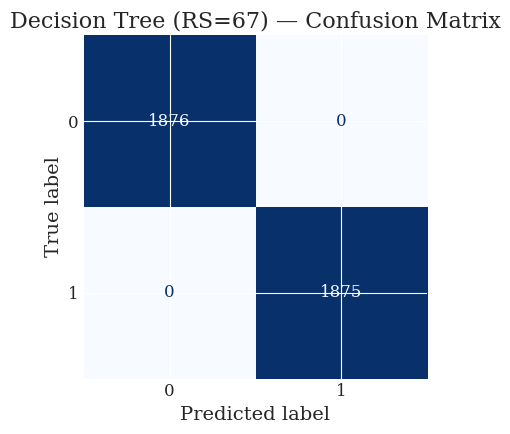

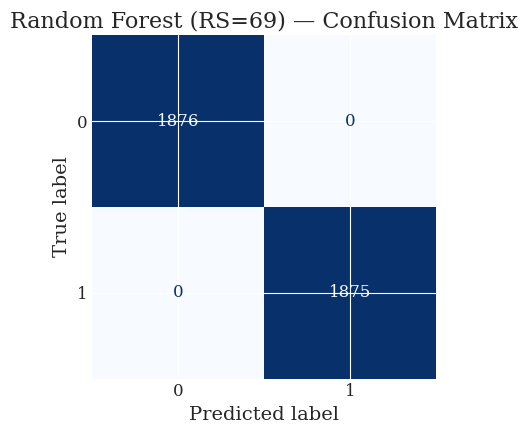

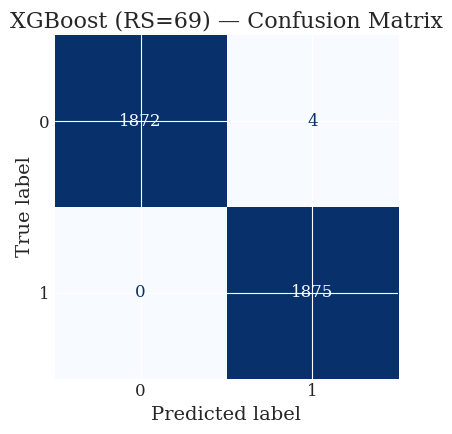

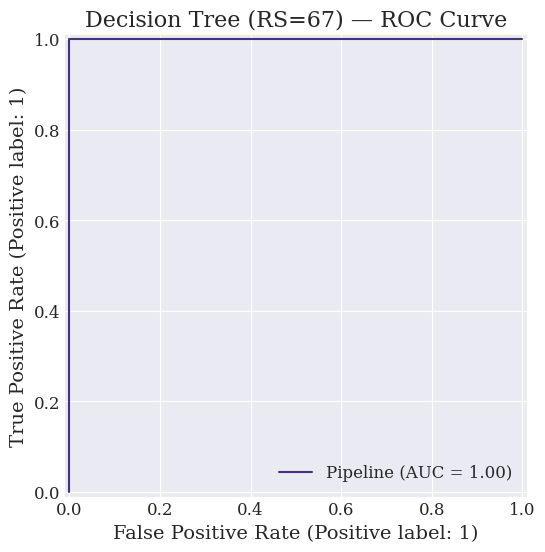

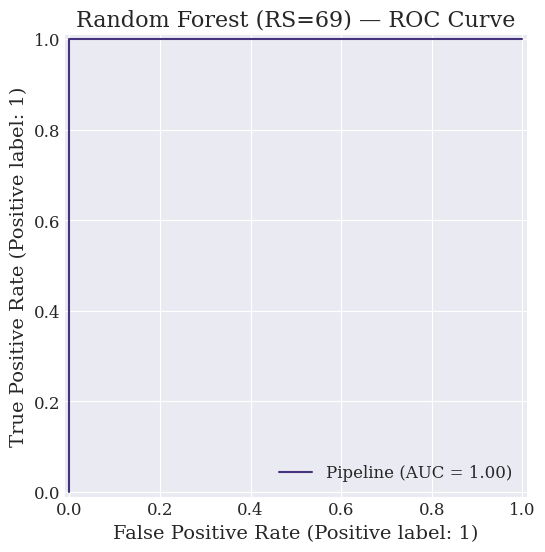

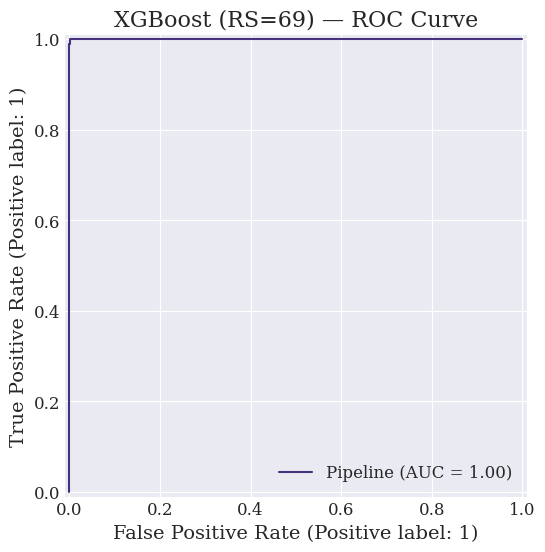

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

top3 = group_results["Model"].head(3).tolist()

# Confusion matrices
for name in top3:
    pipe = pipes[name]
    fig, ax = plt.subplots(figsize=(5.5,4.5))
    ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap="Blues", ax=ax, colorbar=False)
    ax.set_title(f"{name} — Confusion Matrix"); plt.tight_layout(); plt.show()

# ROC curves (only for models with predict_proba)
for name in top3:
    pipe = pipes[name]
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        RocCurveDisplay.from_estimator(pipe, X_test, y_test)
        plt.title(f"{name} — ROC Curve"); plt.show()


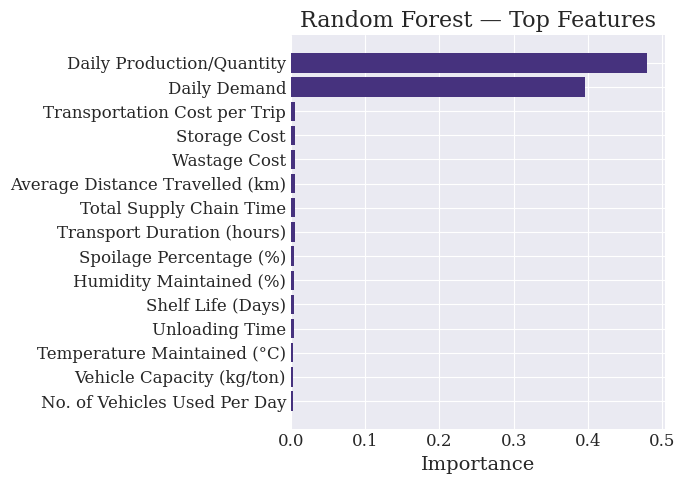

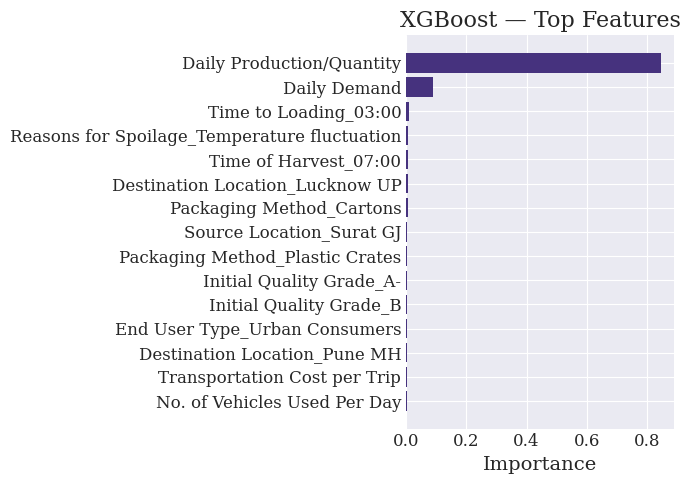

feature  median_threshold  split_count
0        Daily Production/Quantity          0.002951         6715
1                     Daily Demand         -0.000170         6383
2                     Storage Cost          0.032042         3349
3                     Wastage Cost         -0.035982         3282
4     Transportation Cost per Trip         -0.032194         3236
5  Average Distance Travelled (km)          0.053457         3227
6          Total Supply Chain Time          0.034359         3122
7       Transport Duration (hours)          0.034767         3109

In [76]:
# Fit preprocessor to get feature names
preprocessor.fit(X_train)
cat_names = preprocessor.named_transformers_["cat"].named_steps["ohe"].get_feature_names_out(cat_cols)
num_names = np.array(num_cols)
feat_names = np.concatenate([cat_names, num_names])

def plot_top_importances(pipe, title, topn=15):
    clf = pipe.named_steps["clf"]
    if hasattr(clf, "feature_importances_"):
        imp = clf.feature_importances_
        order = np.argsort(imp)[::-1][:topn]
        plt.figure(figsize=(7,5))
        plt.barh(range(len(order)), imp[order][::-1])
        plt.yticks(range(len(order)), [feat_names[i] for i in order][::-1])
        plt.title(title); plt.xlabel("Importance"); plt.tight_layout(); plt.show()

if "Random Forest (RS=69)" in pipes:
    plot_top_importances(pipes["Random Forest (RS=69)"], "Random Forest — Top Features")

if "XGBoost (RS=69)" in pipes:
    plot_top_importances(pipes["XGBoost (RS=69)"], "XGBoost — Top Features")

def rf_threshold_table(pipe, topk=8):
    from collections import Counter
    clf = pipe.named_steps["clf"]
    if not hasattr(clf, "estimators_"):
        return pd.DataFrame()
    counts = Counter(); thr_map = {}
    idx2name = dict(enumerate(feat_names))
    for est in clf.estimators_:
        t = est.tree_
        for i in range(t.node_count):
            fid = t.feature[i]; thr = t.threshold[i]
            if fid >= 0:
                nm = idx2name.get(fid, f"f{fid}")
                counts[nm] += 1
                thr_map.setdefault(nm, []).append(thr)
    common = [f for f,_ in counts.most_common(topk)]
    tbl = pd.DataFrame([{"feature":f, "median_threshold":np.nanmedian(thr_map[f]), "split_count":len(thr_map[f])}
                        for f in common]).sort_values("split_count", ascending=False)
    return tbl

rf_thresh = rf_threshold_table(pipes.get("Random Forest (RS=69)"))
rf_thresh


In [77]:
# Save results table
outdir = "/content/drive/MyDrive/MLM Project data set"
os.makedirs(outdir, exist_ok=True)

group_results.to_csv(f"{outdir}/group_SL_results_102_67_69.csv", index=False)

# Save predictions from best model
best_name = group_results.iloc[0]["Model"]
best_pipe = pipes[best_name]
pred_df = X_test.copy()
pred_df[target] = y_test.values
if hasattr(best_pipe.named_steps["clf"], "predict_proba"):
    pred_df["proba_positive"] = best_pipe.predict_proba(X_test)[:,1]
pred_df["predicted"] = best_pipe.predict(X_test)
pred_path = f"{outdir}/preds_{best_name.replace(' ','_').replace('(','').replace(')','').replace('=','').replace(':','')}_102_67_69.csv"
pred_df.to_csv(pred_path, index=False)

print("Saved:", f"{outdir}/group_SL_results_102_67_69.csv")
print("Saved:", pred_path)


Saved: /content/drive/MyDrive/MLM Project data set/group_SL_results_102_67_69.csv
Saved: /content/drive/MyDrive/MLM Project data set/preds_Decision_Tree_RS67_102_67_69.csv
